In [180]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from google.cloud import bigquery
import datetime
client = bigquery.Client()
import pandas as pd

In [181]:
sqlbigquery_data_app = """SELECT * FROM `infusionsoft-looker-poc.asu_msba_free_trial_conversion.CONFIDENTIAL_free_trail_apps_table` """
free_Trial_app_data= pd.read_gbq(sqlbigquery_data_app,
                    project_id='infusionsoft-looker-poc',
                    dialect='standard'
                    )

# head = free_Trial_app_data.head()

# print(free_Trial_app_data.describe())

# deleting test appnames
free_Trial_app_data = free_Trial_app_data[~free_Trial_app_data['app_name'].isin(['tl471', 'wd410', 'mw416', 'kw563', 'ov450'])]

In [182]:
free_Trial_app_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32918 entries, 0 to 33201
Data columns (total 46 columns):
app_name                                  32918 non-null object
account_id                                32918 non-null object
opportunity_id                            3386 non-null object
opportunity_stage_name                    3386 non-null object
opportunity_owner_name                    3386 non-null object
opportunity_demo_date                     308 non-null datetime64[ns]
is_free_trial_initiated                   32918 non-null bool
trial_date                                32918 non-null datetime64[ns]
contact_id                                32918 non-null object
contact_lead_source                       31870 non-null object
contact_phase                             7438 non-null object
lead_lead_source                          27775 non-null object
lead_converted_date                       31863 non-null datetime64[ns]
count_of_active_users_in_last_6_months    3

In [183]:
free_Trial_app_data.drop_duplicates(keep="first", inplace=True)

In [184]:
print("number of unique apps in free trial app data", free_Trial_app_data['app_name'].nunique())

number of unique apps in free trial app data 28833


In [185]:
appnamebytrialdate = free_Trial_app_data.groupby(['app_name']).size().to_frame('size').reset_index().sort_values(['size'], ascending=[False])

print("number of apps ", appnamebytrialdate['app_name'].nunique())

# getting the list of appnames that have more than one occurance on a day

appnamebytrialdate_size2 =appnamebytrialdate[appnamebytrialdate['size'] == 2]
print("number of apps with size 2", appnamebytrialdate_size2['app_name'].nunique())
appnamebytrialdate_size2_new =free_Trial_app_data[free_Trial_app_data['app_name'].isin(appnamebytrialdate_size2['app_name'])].sort_values(by=['app_name', 'trial_date'])
print("---------------------------------")
appnamebytrialdate_size3 = appnamebytrialdate[appnamebytrialdate['size'] == 3]
print("number of apps with size 3", appnamebytrialdate_size3['app_name'].nunique())
appnamebytrialdate_size3_new =free_Trial_app_data[free_Trial_app_data['app_name'].isin(appnamebytrialdate_size3['app_name'])].sort_values(by=['app_name', 'trial_date'])

        

number of apps  28833
number of apps with size 2 3396
---------------------------------
number of apps with size 3 3


In [186]:

appnamebytrialdate_size1 =appnamebytrialdate[appnamebytrialdate['size'] == 1]
print("number of apps with size 1", appnamebytrialdate_size1['app_name'].nunique())
appnamebytrialdate_size1_new =free_Trial_app_data[free_Trial_app_data['app_name'].isin(appnamebytrialdate_size1['app_name'])].sort_values(by=['app_name', 'trial_date'])
print("---------------------------------")

number of apps with size 1 25221
---------------------------------


In [187]:
appnamebytrialdate_size2_new.columns

Index(['app_name', 'account_id', 'opportunity_id', 'opportunity_stage_name',
       'opportunity_owner_name', 'opportunity_demo_date',
       'is_free_trial_initiated', 'trial_date', 'contact_id',
       'contact_lead_source', 'contact_phase', 'lead_lead_source',
       'lead_converted_date', 'count_of_active_users_in_last_6_months',
       'initial_mrr_post_promo', 'current_mrr', 'initial_mrr',
       'initial_edition', 'current_edition_type', 'new_customer_date',
       'start_date', 'kickstart_owner_name', 'kickstart_owner_role',
       'kickstart_type', 'cancel_eligible', 'sales_cohort_date',
       'paying_customer_date', 'contract_status', 'edition_category',
       'promo_customer', 'lost_revenue_date', 'in_trial_first_email_date',
       'in_trial_last_email_date', 'in_trial_total_emails_sent',
       'in_trial_count_of_logins', 'first_login_on', 'second_login',
       'in_trial_count_of_contacts_added', 'first_contact_on',
       'last_contact_on', 'in_trial_first_campaign_pub

In [188]:
columnsubset=['app_name', 'account_id', 'opportunity_id', 'opportunity_stage_name',
       'opportunity_owner_name', 'opportunity_demo_date',
       'is_free_trial_initiated', 'trial_date', 'contact_id',
       'contact_lead_source', 'contact_phase', 'lead_lead_source',
       'lead_converted_date', 'count_of_active_users_in_last_6_months',
       'initial_mrr_post_promo', 'current_mrr', 'initial_mrr',
       'initial_edition', 'current_edition_type', 'new_customer_date',
       'start_date', 'kickstart_owner_name', 'kickstart_owner_role',
       'kickstart_type', 'cancel_eligible', 'sales_cohort_date',
       'paying_customer_date', 'contract_status', 'edition_category',
       'promo_customer']

In [189]:
free_Trial_app_data_csubset=free_Trial_app_data[columnsubset]

In [190]:
print("number of unique apps in free trial app data", free_Trial_app_data_csubset['app_name'].nunique())

number of unique apps in free trial app data 28833


In [191]:
appnamebytrialdate_csubset = free_Trial_app_data_csubset.groupby(['app_name']).size().to_frame('size').reset_index().sort_values(['size'], ascending=[False])

print("number of apps ", appnamebytrialdate_csubset['app_name'].nunique())

# getting the list of appnames that have more than one occurance on a day

appnamebytrialdate_csubset_size2 =appnamebytrialdate_csubset[appnamebytrialdate_csubset['size'] == 2]
print("number of apps with size 2", appnamebytrialdate_csubset_size2['app_name'].nunique())
appnamebytrialdate_csubset_size2_new =free_Trial_app_data_csubset[free_Trial_app_data_csubset['app_name'].isin(appnamebytrialdate_csubset_size2['app_name'])].sort_values(by=['app_name', 'trial_date'])
print("---------------------------------")
appnamebytrialdate_csubset_size3 = appnamebytrialdate_csubset[appnamebytrialdate_csubset['size'] == 3]
print("number of apps with size 3", appnamebytrialdate_csubset_size3['app_name'].nunique())
appnamebytrialdate_csubset_size3_new =free_Trial_app_data_csubset[free_Trial_app_data_csubset['app_name'].isin(appnamebytrialdate_csubset_size3['app_name'])].sort_values(by=['app_name', 'trial_date'])

        

number of apps  28833
number of apps with size 2 3396
---------------------------------
number of apps with size 3 3


In [192]:
appnamebytrialdate_csubset_size1 =appnamebytrialdate_csubset[appnamebytrialdate_csubset['size'] == 1]
print("number of apps with size 1", appnamebytrialdate_csubset_size1['app_name'].nunique())
appnamebytrialdate_csubset_size1_new =free_Trial_app_data_csubset[free_Trial_app_data_csubset['app_name'].isin(appnamebytrialdate_csubset_size1['app_name'])].sort_values(by=['app_name', 'trial_date'])
print("---------------------------------")

number of apps with size 1 25221
---------------------------------


In [193]:
appnamebytrialdate_size2_new_dd=appnamebytrialdate_csubset_size2_new.drop_duplicates(keep="first")

In [194]:
appnamebytrialdate_size2_new_dd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3543 entries, 18902 to 8111
Data columns (total 30 columns):
app_name                                  3543 non-null object
account_id                                3543 non-null object
opportunity_id                            1410 non-null object
opportunity_stage_name                    1410 non-null object
opportunity_owner_name                    1410 non-null object
opportunity_demo_date                     130 non-null datetime64[ns]
is_free_trial_initiated                   3543 non-null bool
trial_date                                3543 non-null datetime64[ns]
contact_id                                3543 non-null object
contact_lead_source                       3258 non-null object
contact_phase                             828 non-null object
lead_lead_source                          2710 non-null object
lead_converted_date                       3224 non-null datetime64[ns]
count_of_active_users_in_last_6_months    3416 non

In [195]:
appnamebytrialdate_size2_new_dd_size = appnamebytrialdate_size2_new_dd.groupby(['app_name']).size().to_frame('size2').reset_index().sort_values(['size2'], ascending=[False])

print("number of apps ", appnamebytrialdate_size2_new_dd_size['app_name'].nunique())

# getting the list of appnames that have more than one occurance on a day

appnamebytrialdate_size2_new_dd_size_2 =appnamebytrialdate_size2_new_dd_size[appnamebytrialdate_size2_new_dd_size['size2'] == 2]
print("number of apps with size 2", appnamebytrialdate_size2_new_dd_size_2['app_name'].nunique())
appnamebytrialdate_size2_new_dd_size_2_new =appnamebytrialdate_size2_new_dd[appnamebytrialdate_size2_new_dd['app_name'].isin(appnamebytrialdate_size2_new_dd_size_2['app_name'])].sort_values(by=['app_name', 'trial_date'])


appnamebytrialdate_size2_new_dd_size_1 =appnamebytrialdate_size2_new_dd_size[appnamebytrialdate_size2_new_dd_size['size2'] == 1]
print("number of apps with size 1", appnamebytrialdate_size2_new_dd_size_1['app_name'].nunique())
appnamebytrialdate_size2_new_dd_size_1_new =appnamebytrialdate_size2_new_dd[appnamebytrialdate_size2_new_dd['app_name'].isin(appnamebytrialdate_size2_new_dd_size_1['app_name'])].sort_values(by=['app_name', 'trial_date'])

        
        

number of apps  3396
number of apps with size 2 147
number of apps with size 1 3249


In [196]:
appnamebytrialdate_size2_new_dd_size_2_new['app_name'].value_counts()

kj518    2
ei369    2
yn384    2
mp550    2
id386    2
qi384    2
kl518    2
pn388    2
un384    2
kq538    2
vl384    2
jj223    2
sa384    2
iv384    2
zy448    2
go559    2
uy490    2
xu468    2
fr585    2
le336    2
ql546    2
lj384    2
xf384    2
vt499    2
me601    2
ll573    2
mg384    2
yn509    2
cn397    2
wp526    2
        ..
vk543    2
ak565    2
fw384    2
en237    2
qm425    2
ad384    2
rt521    2
pd581    2
jp384    2
cz503    2
mh563    2
kc501    2
go384    2
zh558    2
jl514    2
ll417    2
eu501    2
vw456    2
by395    2
ic589    2
ka384    2
pg652    2
kt503    2
xz593    2
lm384    2
eo384    2
kj384    2
tk384    2
zc384    2
fz384    2
Name: app_name, Length: 147, dtype: int64

In [197]:
for i in range(0,len(appnamebytrialdate_size2_new_dd_size_2_new)):
    j=i+1
    if (appnamebytrialdate_size2_new_dd_size_2_new.iloc[i]['app_name']==appnamebytrialdate_size2_new_dd_size_2_new.iloc[j]['app_name']):
        for each in appnamebytrialdate_size2_new_dd_size_2_new.columns:
            if (appnamebytrialdate_size2_new_dd_size_2_new.iloc[i][each] !=appnamebytrialdate_size2_new_dd_size_2_new.iloc[j][each]):
                print(appnamebytrialdate_size2_new_dd_size_2_new.iloc[i]['app_name'],"--")
                print(each,"---",appnamebytrialdate_size2_new_dd_size_2_new.iloc[i][each],"--",appnamebytrialdate_size2_new_dd_size_2_new.iloc[j][each])

ab460 --
opportunity_demo_date --- NaT -- NaT
ab460 --
lead_lead_source --- Marketo Campaign -- freetrial.infusionsoft.com
ab460 --
lead_converted_date --- 2018-05-04 00:00:00 -- 2018-07-11 00:00:00
ab460 --
initial_mrr_post_promo --- nan -- nan
ab460 --
current_mrr --- nan -- nan
ab460 --
initial_mrr --- nan -- nan
ab460 --
new_customer_date --- NaT -- NaT
ab460 --
start_date --- NaT -- NaT
ab460 --
sales_cohort_date --- NaT -- NaT
ab460 --
paying_customer_date --- NaT -- NaT
ad384 --
opportunity_demo_date --- NaT -- NaT
ad384 --
trial_date --- 2017-08-11 23:26:43 -- 2017-08-12 06:15:53
ad384 --
count_of_active_users_in_last_6_months --- nan -- nan
ad384 --
initial_mrr_post_promo --- nan -- nan
ad384 --
current_mrr --- nan -- nan
ad384 --
initial_mrr --- nan -- nan
ad384 --
new_customer_date --- NaT -- NaT
ad384 --
start_date --- NaT -- NaT
ad384 --
sales_cohort_date --- NaT -- NaT
ad384 --
paying_customer_date --- NaT -- NaT
ad390 --
opportunity_demo_date --- NaT -- NaT
ad390 --
is_f

fr498 --
new_customer_date --- NaT -- NaT
fr498 --
start_date --- NaT -- NaT
fr498 --
sales_cohort_date --- NaT -- NaT
fr498 --
paying_customer_date --- NaT -- NaT
fr585 --
opportunity_demo_date --- NaT -- NaT
fr585 --
lead_lead_source --- freetrial.infusionsoft.com -- None
fr585 --
initial_mrr_post_promo --- nan -- nan
fr585 --
current_mrr --- nan -- nan
fr585 --
initial_mrr --- nan -- nan
fr585 --
new_customer_date --- NaT -- NaT
fr585 --
start_date --- NaT -- NaT
fr585 --
sales_cohort_date --- NaT -- NaT
fr585 --
paying_customer_date --- NaT -- NaT
fu384 --
opportunity_demo_date --- NaT -- NaT
fu384 --
trial_date --- 2017-08-09 20:08:17 -- 2017-08-10 02:15:38
fu384 --
count_of_active_users_in_last_6_months --- nan -- nan
fu384 --
initial_mrr_post_promo --- nan -- nan
fu384 --
current_mrr --- nan -- nan
fu384 --
initial_mrr --- nan -- nan
fu384 --
new_customer_date --- NaT -- NaT
fu384 --
start_date --- NaT -- NaT
fu384 --
sales_cohort_date --- NaT -- NaT
fu384 --
paying_customer_dat

jn417 --
opportunity_demo_date --- NaT -- NaT
jn417 --
is_free_trial_initiated --- True -- False
jn417 --
lead_lead_source --- cpc_google_demo~search-google-brand-exact-dtm-ca~2017-11-01_brand-evergreen_exact-infusionsoft -- purchased-lead_softwareadvice_buyis~purchase-lead~2014-06-02__
jn417 --
lead_converted_date --- 2018-01-03 00:00:00 -- 2015-10-12 00:00:00
jn417 --
initial_mrr_post_promo --- nan -- nan
jn417 --
current_mrr --- nan -- nan
jn417 --
initial_mrr --- nan -- nan
jn417 --
new_customer_date --- NaT -- NaT
jn417 --
start_date --- NaT -- NaT
jn417 --
sales_cohort_date --- NaT -- NaT
jn417 --
paying_customer_date --- NaT -- NaT
jp384 --
opportunity_demo_date --- NaT -- NaT
jp384 --
trial_date --- 2017-08-11 08:33:43 -- 2017-08-12 03:51:40
jp384 --
count_of_active_users_in_last_6_months --- nan -- nan
jp384 --
initial_mrr_post_promo --- nan -- nan
jp384 --
current_mrr --- nan -- nan
jp384 --
initial_mrr --- nan -- nan
jp384 --
new_customer_date --- NaT -- NaT
jp384 --
start_d

ll417 --
new_customer_date --- NaT -- NaT
ll417 --
start_date --- NaT -- NaT
ll417 --
sales_cohort_date --- NaT -- NaT
ll417 --
paying_customer_date --- NaT -- NaT
ll573 --
account_id --- 001f100001TyXB5AAN -- 001f100001TyX15AAF
ll573 --
opportunity_demo_date --- NaT -- NaT
ll573 --
initial_mrr_post_promo --- nan -- nan
ll573 --
current_mrr --- nan -- nan
ll573 --
initial_mrr --- nan -- nan
ll573 --
new_customer_date --- NaT -- NaT
ll573 --
start_date --- NaT -- NaT
ll573 --
sales_cohort_date --- NaT -- NaT
ll573 --
paying_customer_date --- NaT -- NaT
lm384 --
opportunity_demo_date --- NaT -- NaT
lm384 --
trial_date --- 2017-08-11 09:06:16 -- 2017-08-12 03:51:39
lm384 --
count_of_active_users_in_last_6_months --- nan -- nan
lm384 --
initial_mrr_post_promo --- nan -- nan
lm384 --
current_mrr --- nan -- nan
lm384 --
initial_mrr --- nan -- nan
lm384 --
new_customer_date --- NaT -- NaT
lm384 --
start_date --- NaT -- NaT
lm384 --
sales_cohort_date --- NaT -- NaT
lm384 --
paying_customer_dat

qt384 --
sales_cohort_date --- NaT -- NaT
qt384 --
paying_customer_date --- NaT -- NaT
qt579 --
account_id --- 001f100001V05ZKAAZ -- 001f100001TyqYsAAJ
qt579 --
opportunity_demo_date --- NaT -- NaT
qt579 --
initial_mrr_post_promo --- nan -- nan
qt579 --
current_mrr --- nan -- nan
qt579 --
initial_mrr --- nan -- nan
qt579 --
new_customer_date --- NaT -- NaT
qt579 --
start_date --- NaT -- NaT
qt579 --
sales_cohort_date --- NaT -- NaT
qt579 --
paying_customer_date --- NaT -- NaT
qw505 --
opportunity_demo_date --- NaT -- NaT
qw505 --
lead_lead_source --- cpc_google_demo~search-google-brand-exact-dtm-ca~2018_279738355845_infusionsoft -- freetrial.infusionsoft.com
qw505 --
lead_converted_date --- 2018-07-12 00:00:00 -- 2018-07-17 00:00:00
qw505 --
initial_mrr_post_promo --- nan -- nan
qw505 --
current_mrr --- nan -- nan
qw505 --
initial_mrr --- nan -- nan
qw505 --
new_customer_date --- NaT -- NaT
qw505 --
start_date --- NaT -- NaT
qw505 --
sales_cohort_date --- NaT -- NaT
qw505 --
paying_cus

initial_mrr --- nan -- nan
tw550 --
new_customer_date --- NaT -- NaT
tw550 --
start_date --- NaT -- NaT
tw550 --
sales_cohort_date --- NaT -- NaT
tw550 --
paying_customer_date --- NaT -- NaT
tx543 --
opportunity_demo_date --- NaT -- NaT
tx543 --
trial_date --- 2018-09-12 23:44:03 -- 2018-09-12 23:46:41
tx543 --
contact_id --- 003f1000028tMy7AAE -- 003f1000028tMyqAAE
tx543 --
contact_phase --- None -- Phase 3
tx543 --
initial_mrr_post_promo --- nan -- nan
tx543 --
current_mrr --- nan -- nan
tx543 --
initial_mrr --- nan -- nan
tx543 --
new_customer_date --- NaT -- NaT
tx543 --
start_date --- NaT -- NaT
tx543 --
sales_cohort_date --- NaT -- NaT
tx543 --
paying_customer_date --- NaT -- NaT
ub384 --
opportunity_demo_date --- NaT -- NaT
ub384 --
is_free_trial_initiated --- False -- True
ub384 --
trial_date --- 2017-08-11 05:57:56 -- 2017-08-12 02:54:16
ub384 --
contact_id --- 003f100001ehG09AAE -- 003f100001i9Fx5AAE
ub384 --
contact_lead_source --- Marketo Campaign -- None
ub384 --
contact_p

xn598 --
lead_converted_date --- 2018-11-02 00:00:00 -- 2018-12-28 00:00:00
xn598 --
initial_mrr_post_promo --- nan -- nan
xn598 --
current_mrr --- nan -- nan
xn598 --
initial_mrr --- nan -- nan
xn598 --
new_customer_date --- NaT -- NaT
xn598 --
start_date --- NaT -- NaT
xn598 --
sales_cohort_date --- NaT -- NaT
xn598 --
paying_customer_date --- NaT -- NaT
xr419 --
opportunity_demo_date --- NaT -- NaT
xr419 --
is_free_trial_initiated --- False -- True
xr419 --
lead_lead_source --- direct_offlinechat_equinox__ -- https://www.infusionsoft.com/
xr419 --
initial_mrr_post_promo --- nan -- nan
xr419 --
current_mrr --- nan -- nan
xr419 --
initial_mrr --- nan -- nan
xr419 --
new_customer_date --- NaT -- NaT
xr419 --
start_date --- NaT -- NaT
xr419 --
sales_cohort_date --- NaT -- NaT
xr419 --
paying_customer_date --- NaT -- NaT
xu468 --
opportunity_demo_date --- NaT -- NaT
xu468 --
lead_lead_source --- direct_offlinechat_equinox__ -- Marketo Campaign
xu468 --
lead_converted_date --- 2018-09-26 

IndexError: single positional indexer is out-of-bounds

In [198]:
appnamebytrialdate_size2_new_dd_size_1_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3249 entries, 18902 to 8111
Data columns (total 30 columns):
app_name                                  3249 non-null object
account_id                                3249 non-null object
opportunity_id                            1380 non-null object
opportunity_stage_name                    1380 non-null object
opportunity_owner_name                    1380 non-null object
opportunity_demo_date                     124 non-null datetime64[ns]
is_free_trial_initiated                   3249 non-null bool
trial_date                                3249 non-null datetime64[ns]
contact_id                                3249 non-null object
contact_lead_source                       3024 non-null object
contact_phase                             734 non-null object
lead_lead_source                          2556 non-null object
lead_converted_date                       2959 non-null datetime64[ns]
count_of_active_users_in_last_6_months    3204 non

In [199]:
freetrialappdata_new=pd.concat([appnamebytrialdate_csubset_size1_new,appnamebytrialdate_size2_new_dd_size_1_new],axis=0)

In [200]:
freetrialappdata_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 28470 entries, 29236 to 8111
Data columns (total 30 columns):
app_name                                  28470 non-null object
account_id                                28470 non-null object
opportunity_id                            1580 non-null object
opportunity_stage_name                    1580 non-null object
opportunity_owner_name                    1580 non-null object
opportunity_demo_date                     155 non-null datetime64[ns]
is_free_trial_initiated                   28470 non-null bool
trial_date                                28470 non-null datetime64[ns]
contact_id                                28470 non-null object
contact_lead_source                       27745 non-null object
contact_phase                             6325 non-null object
lead_lead_source                          24441 non-null object
lead_converted_date                       27836 non-null datetime64[ns]
count_of_active_users_in_last_6_months  

In [201]:
freetrialappdata_new['app_name'].nunique()

28470

In [202]:
freetrialappdata_new.columns

Index(['app_name', 'account_id', 'opportunity_id', 'opportunity_stage_name',
       'opportunity_owner_name', 'opportunity_demo_date',
       'is_free_trial_initiated', 'trial_date', 'contact_id',
       'contact_lead_source', 'contact_phase', 'lead_lead_source',
       'lead_converted_date', 'count_of_active_users_in_last_6_months',
       'initial_mrr_post_promo', 'current_mrr', 'initial_mrr',
       'initial_edition', 'current_edition_type', 'new_customer_date',
       'start_date', 'kickstart_owner_name', 'kickstart_owner_role',
       'kickstart_type', 'cancel_eligible', 'sales_cohort_date',
       'paying_customer_date', 'contract_status', 'edition_category',
       'promo_customer'],
      dtype='object')

In [203]:
freetrialappdata_new.shape

(28470, 30)

In [204]:

# setting target column
freetrialappdata_new['Target'] = list(map((lambda x: 0 if pd.isna(x) else 1),freetrialappdata_new['new_customer_date']))

In [205]:
freetrialappdata_new.drop(['account_id','cancel_eligible', 'contact_id','contract_status','opportunity_id',
       'count_of_active_users_in_last_6_months', 'current_edition_type',
       'current_mrr', 'edition_category','initial_edition', 'initial_mrr',
       'initial_mrr_post_promo', 'is_free_trial_initiated',
       'kickstart_owner_name', 'kickstart_owner_role', 'kickstart_type', 'paying_customer_date','new_customer_date'],axis=1,inplace=True)

In [206]:
freetrialappdata_new.columns

Index(['app_name', 'opportunity_stage_name', 'opportunity_owner_name',
       'opportunity_demo_date', 'trial_date', 'contact_lead_source',
       'contact_phase', 'lead_lead_source', 'lead_converted_date',
       'start_date', 'sales_cohort_date', 'promo_customer', 'Target'],
      dtype='object')

In [207]:
freetrialappdata_new.isna().sum()*100/freetrialappdata_new.shape[0]

app_name                   0.000000
opportunity_stage_name    94.450299
opportunity_owner_name    94.450299
opportunity_demo_date     99.455567
trial_date                 0.000000
contact_lead_source        2.546540
contact_phase             77.783632
lead_lead_source          14.151739
lead_converted_date        2.226906
start_date                92.732701
sales_cohort_date         92.676502
promo_customer            95.577801
Target                     0.000000
dtype: float64

In [208]:
freetrialappdata_new.drop(['start_date'],axis=1,inplace=True)

In [209]:
freetrialappdata_new.columns

Index(['app_name', 'opportunity_stage_name', 'opportunity_owner_name',
       'opportunity_demo_date', 'trial_date', 'contact_lead_source',
       'contact_phase', 'lead_lead_source', 'lead_converted_date',
       'sales_cohort_date', 'promo_customer', 'Target'],
      dtype='object')

# below is just for analysis.  Donot run

In [77]:
freetrialappdata_new['trial_date'] = pd.to_datetime(freetrialappdata_new['trial_date'])
freetrialappdata_new['trial_qtr']=freetrialappdata_new['trial_date'].dt.quarter

In [78]:
freetrialappdata_new['trial_weekday'] = freetrialappdata_new['trial_date'].dt.weekday_name

In [79]:
freetrialappdata_new['trial_month'] = freetrialappdata_new['trial_date'].dt.month_name()

In [80]:
pd.pivot_table(freetrialappdata_new,index=["trial_weekday"],values=["Target"],
              aggfunc=[len],fill_value=0)

,len
,Target
trial_weekday,
Friday,3948
Monday,4479
Saturday,2351
Sunday,2826
Thursday,4914
Tuesday,5036
Wednesday,4916


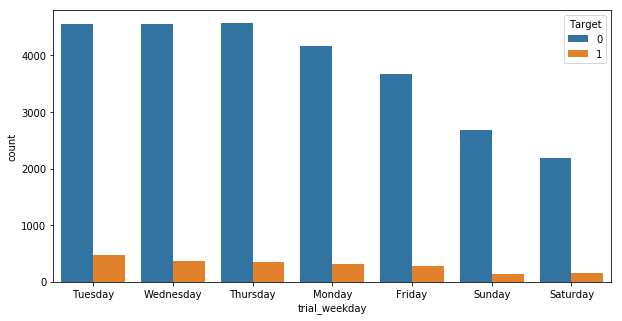

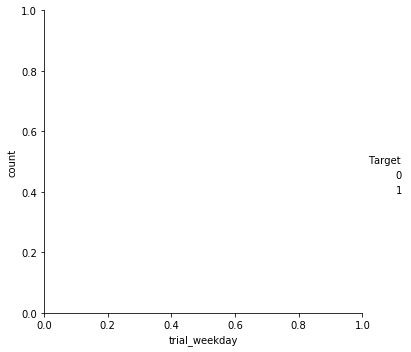

In [81]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(10,5)
sns.catplot(ax=ax, x="trial_weekday", kind="count", data=freetrialappdata_new,hue="Target",order = freetrialappdata_new["trial_weekday"].value_counts().index);

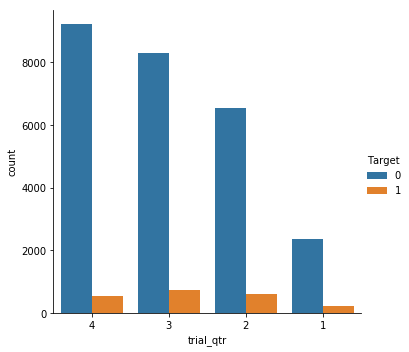

In [35]:
sns.catplot(x="trial_qtr", kind="count", data=freetrialappdata_new,hue="Target",order = freetrialappdata_new["trial_qtr"].value_counts().index);

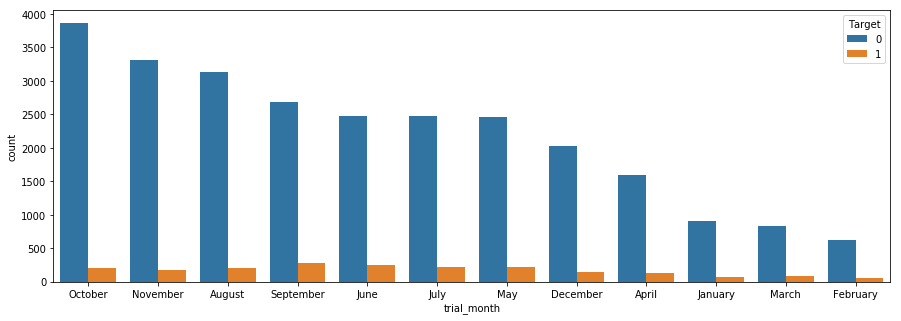

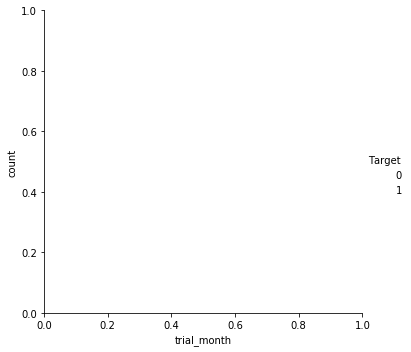

In [36]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(15,5)
sns.catplot(x="trial_month", kind="count", data=freetrialappdata_new,hue="Target",ax=ax,order = freetrialappdata_new["trial_month"].value_counts().index);

In [82]:
missingvaluecolumns=['opportunity_stage_name','opportunity_owner_name','opportunity_demo_date','contact_lead_source',
                    'contact_phase','lead_lead_source','lead_converted_date','sales_cohort_date',
                    'promo_customer']

for each in missingvaluecolumns:
    each_ind=each+"_ind"
    freetrialappdata_new[each_ind]=list(map((lambda x: 0 if pd.isna(x) else 1),freetrialappdata_new[each]))
datefeatures=['trial_date','opportunity_demo_date','lead_converted_date','sales_cohort_date'] 
from datetime import datetime
newdatecolumns=[]
#X_train[datefeatures].apply(pd.to_datetime())
date_format = "%m/%d/%Y"
for c in datefeatures:
    print("----------")
    cd=c+"date"
    newdatecolumns.append(cd)
    freetrialappdata_new[cd] = pd.to_datetime(freetrialappdata_new[c])
    freetrialappdata_new[cd] = freetrialappdata_new[cd].dt.date
print(newdatecolumns)
freetrialappdata_new.drop(datefeatures,axis=1,inplace=True)

----------
----------
----------
----------
['trial_datedate', 'opportunity_demo_datedate', 'lead_converted_datedate', 'sales_cohort_datedate']


In [83]:
freetrialappdata_new.head()

,app_name,opportunity_stage_name,opportunity_owner_name,contact_lead_source,contact_phase,lead_lead_source,promo_customer,Target,trial_qtr,trial_weekday,...,contact_lead_source_ind,contact_phase_ind,lead_lead_source_ind,lead_converted_date_ind,sales_cohort_date_ind,promo_customer_ind,trial_datedate,opportunity_demo_datedate,lead_converted_datedate,sales_cohort_datedate
29236,6755074,None,None,Marketo Campaign,None,freetrial.infusionsoft.com,None,0,2,Friday,...,1,0,1,1,0,0,2018-06-15,NaT,2018-06-15,NaT
27185,6778579,None,None,Marketo Campaign,Phase 1,freetrial.infusionsoft.com,None,0,2,Tuesday,...,1,1,1,1,0,0,2018-06-19,NaT,2018-06-19,NaT
28435,6778580,None,None,Marketo Campaign,Phase 2,freetrial.infusionsoft.com,None,0,2,Tuesday,...,1,1,1,1,0,0,2018-06-19,NaT,2018-06-19,NaT
30086,6778582,None,None,Marketo Campaign,None,freetrial.infusionsoft.com,None,0,2,Tuesday,...,1,0,1,1,0,0,2018-06-19,NaT,2018-06-19,NaT
27296,6778977,None,None,Marketo Campaign,None,freetrial.infusionsoft.com,None,0,2,Tuesday,...,1,0,1,1,0,0,2018-06-19,NaT,2018-06-19,NaT


In [84]:
freetrialappdata_new.head()

,app_name,opportunity_stage_name,opportunity_owner_name,contact_lead_source,contact_phase,lead_lead_source,promo_customer,Target,trial_qtr,trial_weekday,...,contact_lead_source_ind,contact_phase_ind,lead_lead_source_ind,lead_converted_date_ind,sales_cohort_date_ind,promo_customer_ind,trial_datedate,opportunity_demo_datedate,lead_converted_datedate,sales_cohort_datedate
29236,6755074,None,None,Marketo Campaign,None,freetrial.infusionsoft.com,None,0,2,Friday,...,1,0,1,1,0,0,2018-06-15,NaT,2018-06-15,NaT
27185,6778579,None,None,Marketo Campaign,Phase 1,freetrial.infusionsoft.com,None,0,2,Tuesday,...,1,1,1,1,0,0,2018-06-19,NaT,2018-06-19,NaT
28435,6778580,None,None,Marketo Campaign,Phase 2,freetrial.infusionsoft.com,None,0,2,Tuesday,...,1,1,1,1,0,0,2018-06-19,NaT,2018-06-19,NaT
30086,6778582,None,None,Marketo Campaign,None,freetrial.infusionsoft.com,None,0,2,Tuesday,...,1,0,1,1,0,0,2018-06-19,NaT,2018-06-19,NaT
27296,6778977,None,None,Marketo Campaign,None,freetrial.infusionsoft.com,None,0,2,Tuesday,...,1,0,1,1,0,0,2018-06-19,NaT,2018-06-19,NaT


In [85]:
freetrialappdata_new.isna().sum()*100/freetrialappdata_new.shape[0]

app_name                       0.000000
opportunity_stage_name        94.450299
opportunity_owner_name        94.450299
contact_lead_source            2.546540
contact_phase                 77.783632
lead_lead_source              14.151739
promo_customer                95.577801
Target                         0.000000
trial_qtr                      0.000000
trial_weekday                  0.000000
trial_month                    0.000000
opportunity_stage_name_ind     0.000000
opportunity_owner_name_ind     0.000000
opportunity_demo_date_ind      0.000000
contact_lead_source_ind        0.000000
contact_phase_ind              0.000000
lead_lead_source_ind           0.000000
lead_converted_date_ind        0.000000
sales_cohort_date_ind          0.000000
promo_customer_ind             0.000000
trial_datedate                 0.000000
opportunity_demo_datedate     99.455567
lead_converted_datedate        2.226906
sales_cohort_datedate         92.676502
dtype: float64

In [86]:
#free_Trial_app_data_csubset.drop_duplicates(keep="first")

In [87]:
#free_Trial_app_data_csubset[free_Trial_app_data_csubset['app_name'].isin(oldcustomers)][['app_name','trial_date','new_customer_date','lost_revenue_date']].sort_values(['app_name'], ascending=[False])

In [88]:
# for each in ndayslist_modified:
#     print(freetrialappdata_new[each].value_counts())

In [89]:
freetrialappdata_new.columns

Index(['app_name', 'opportunity_stage_name', 'opportunity_owner_name',
       'contact_lead_source', 'contact_phase', 'lead_lead_source',
       'promo_customer', 'Target', 'trial_qtr', 'trial_weekday', 'trial_month',
       'opportunity_stage_name_ind', 'opportunity_owner_name_ind',
       'opportunity_demo_date_ind', 'contact_lead_source_ind',
       'contact_phase_ind', 'lead_lead_source_ind', 'lead_converted_date_ind',
       'sales_cohort_date_ind', 'promo_customer_ind', 'trial_datedate',
       'opportunity_demo_datedate', 'lead_converted_datedate',
       'sales_cohort_datedate'],
      dtype='object')

In [90]:
# pd.pivot_table(freetrialappdata_new,index=["Target"],values=["ndays_new_customer_datedate"],
#                aggfunc=[len],fill_value=0)

In [91]:
#freetrialappdata_new[freetrialappdata_new['ndays_new_customer_datedate']>=0]

In [49]:
#days_value_counts=freetrialappdata_new[freetrialappdata_new['ndays_new_customer_datedate']>=0]['ndays_new_customer_datedate'].value_counts()

In [50]:
#days_value_counts=days_value_counts.to_dict()


In [92]:
#days_value_counts

In [52]:
# sumofothers=0
# for k,v in days_value_counts.items():
#     if k not in range(0,14):
#         sumofothers=sumofothers+days_value_counts[k]

In [53]:
# sumofothers

In [54]:
#days_value_counts1 = {k: v for k,v in days_value_counts.items() if k in range(0,14)}

In [93]:
# days_value_counts1=dict(sorted(days_value_counts1.items()))
# days_value_counts1

In [56]:
# days_value_counts1['sumother']=sumofothers
#days_value_countsd=pd.DataFrame.from_dict(days_value_counts1,orient='index',columns=['count'])

In [94]:
#days_value_countsd

In [58]:
days_value_countsd['cumsum']=days_value_countsd['count'].cumsum()
days_value_countsd['cumsum%']=100*days_value_countsd['cumsum']/days_value_countsd['count'].sum()
days_value_countsd

,count,cumsum,cumsum%
0.0,375,375,29.574132
1.0,155,530,41.798107
2.0,130,660,52.050473
3.0,78,738,58.201893
4.0,66,804,63.406940
5.0,55,859,67.744479
6.0,61,920,72.555205
7.0,58,978,77.129338
8.0,59,1037,81.782334
9.0,61,1098,86.593060


In [95]:
freetrialappdata_new['app_name'].nunique()

28470

# End Of Free trial Data analysis
Begining of Usage Data analysis

In [210]:
sqlbigquery_data_usage = """SELECT u.* FROM `infusionsoft-looker-poc.asu_msba_free_trial_conversion.CONFIDENTIAL_usage_data` u
        join `infusionsoft-looker-poc.asu_msba_free_trial_conversion.CONFIDENTIAL_free_trail_apps_table`  a
        on u.appname = a.app_name 
        where u.appname not in ('tl471','wd410','mw416','kw563','ov450') and u.date BETWEEN DATE (a.trial_date, "America/Los_Angeles") and 
        IF(date_diff(Date(new_customer_date, "America/Los_Angeles"), Date(trial_date, "America/Los_Angeles"),day)<=13,date(a.new_customer_date,"America/Los_Angeles") ,DATE_ADD( date(a.trial_date,"America/Los_Angeles"), interval 13 DAY))"""


usagedatasetfree= pd.read_gbq(sqlbigquery_data_usage,
                  project_id='infusionsoft-looker-poc',
                  dialect='standard'
                  )

In [211]:
usagedatasetfree['appname'].nunique()

28368

In [212]:

usagedatasetfree1 = usagedatasetfree[usagedatasetfree.appname.isin(freetrialappdata_new['app_name'])]

In [213]:
usagedatasetfree1['appname'].nunique()

28028

In [214]:
usagedatasetfree1.columns

Index(['appname', 'date', 'free_email', 'NUM_CONTACTS', 'NUMEMAILSSENT_AUTO',
       'NUMCONTACTSSENT_AUTO', 'NUMEMAILSSENT_MANUAL',
       'NUMCONTACTSSENT_MANUAL', 'NUMEMAILSSENT_BROADCAST',
       'NUMCONTACTSSENT_BROADCAST', 'NUMEMAILSSENT_AUTO_SYSTEM',
       'NUMCONTACTSSENT_AUTO_SYSTEM', 'NUMEMAILS_RECEIVED',
       'NUMCONTACTS_RECEIVED', 'NUMEMAILSSENT_NULL', 'NUMCONTACTSSENT_NULL',
       'NUMEMAILSOPENED_AUTO', 'NUMCONTACTSOPENED_AUTO',
       'NUMEMAILSOPENED_MANUAL', 'NUMCONTACTSOPENED_MANUAL',
       'NUMEMAILSOPENED_BROADCAST', 'NUMCONTACTSOPENED_BROADCAST',
       'NUMEMAILSOPENED_AUTO_SYSTEM', 'NUMCONTACTSOPENED_AUTO_SYSTEM',
       'NUMEMAILSOPENED_NULL', 'NUMCONTACTSOPENED_NULL',
       'NUMEMAILSCLICKED_AUTO', 'NUMCONTACTSCLICKED_AUTO',
       'NUMEMAILSCLICKED_MANUAL', 'NUMCONTACTSCLICKED_MANUAL',
       'NUMEMAILSCLICKED_BROADCAST', 'NUMCONTACTSCLICKED_BROADCAST',
       'NUMEMAILSCLICKED_AUTO_SYSTEM', 'NUMCONTACTSCLICKED_AUTO_SYSTEM',
       'NUMEMAILSCLICKED_NUL

In [215]:
usagedatasetfree1.head()

,appname,date,free_email,NUM_CONTACTS,NUMEMAILSSENT_AUTO,NUMCONTACTSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMCONTACTSSENT_MANUAL,NUMEMAILSSENT_BROADCAST,NUMCONTACTSSENT_BROADCAST,...,invoice_created,num_invoice_promos,invoices_paid,lead_sources,actions_created,autotag_config_created,merchant_account_created,merchant_infu_created,number_of_notes_created,number_of_tasks_created
0,ri578,2018-10-25,False,4.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nz450,2018-04-19,True,3.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,hy503,2018-07-19,True,4.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,du584,2018-10-22,False,4.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,zm520,2018-08-19,False,3.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [216]:
usagedatasetfree1.sort_values(['appname'], ascending=[False])

,appname,date,free_email,NUM_CONTACTS,NUMEMAILSSENT_AUTO,NUMCONTACTSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMCONTACTSSENT_MANUAL,NUMEMAILSSENT_BROADCAST,NUMCONTACTSSENT_BROADCAST,...,invoice_created,num_invoice_promos,invoices_paid,lead_sources,actions_created,autotag_config_created,merchant_account_created,merchant_infu_created,number_of_notes_created,number_of_tasks_created
326744,zz640,2018-12-16,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
248908,zz640,2018-12-22,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49851,zz640,2018-12-19,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
200926,zz640,2018-12-24,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
485108,zz640,2018-12-26,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
31586,zz640,2018-12-27,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
434741,zz640,2018-12-15,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
499340,zz640,2018-12-18,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213130,zz640,2018-12-25,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
443082,zz640,2018-12-17,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [217]:
usagedatasetfree1.sort_values(['appname','date'],ascending=True).groupby('appname').head(3)

,appname,date,free_email,NUM_CONTACTS,NUMEMAILSSENT_AUTO,NUMCONTACTSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMCONTACTSSENT_MANUAL,NUMEMAILSSENT_BROADCAST,NUMCONTACTSSENT_BROADCAST,...,invoice_created,num_invoice_promos,invoices_paid,lead_sources,actions_created,autotag_config_created,merchant_account_created,merchant_infu_created,number_of_notes_created,number_of_tasks_created
149118,5058974,2018-05-15,True,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
149119,5058974,2018-05-15,True,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
192536,5058974,2018-05-15,True,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207877,5274174,2017-09-13,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207878,5274174,2017-09-13,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
522184,5274174,2017-09-13,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156174,5581874,2017-09-12,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
156175,5581874,2017-09-12,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
287985,5581874,2017-09-12,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
223840,5789774,2017-06-06,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [218]:
usagedatasetfree2=usagedatasetfree1.drop_duplicates(keep="first")
usagedatasetfree2

,appname,date,free_email,NUM_CONTACTS,NUMEMAILSSENT_AUTO,NUMCONTACTSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMCONTACTSSENT_MANUAL,NUMEMAILSSENT_BROADCAST,NUMCONTACTSSENT_BROADCAST,...,invoice_created,num_invoice_promos,invoices_paid,lead_sources,actions_created,autotag_config_created,merchant_account_created,merchant_infu_created,number_of_notes_created,number_of_tasks_created
0,ri578,2018-10-25,False,4.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,nz450,2018-04-19,True,3.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,hy503,2018-07-19,True,4.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,du584,2018-10-22,False,4.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,zm520,2018-08-19,False,3.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,lk605,2018-11-09,True,453.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,ao594,2018-11-12,False,1.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,zl437,2018-03-16,False,1.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,jr533,2018-09-03,False,2.0,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,lo521,2018-06-22,False,NaN,NaN,NaN,NaN,NaN,None,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [219]:
usagedatasetfree2.isna().sum()/usagedatasetfree2.shape[0]

appname                           0.000000
date                              0.000000
free_email                        0.000000
NUM_CONTACTS                      0.226062
NUMEMAILSSENT_AUTO                0.995364
NUMCONTACTSSENT_AUTO              0.995364
NUMEMAILSSENT_MANUAL              0.977359
NUMCONTACTSSENT_MANUAL            0.977359
NUMEMAILSSENT_BROADCAST           1.000000
NUMCONTACTSSENT_BROADCAST         1.000000
NUMEMAILSSENT_AUTO_SYSTEM         0.979053
NUMCONTACTSSENT_AUTO_SYSTEM       0.979053
NUMEMAILS_RECEIVED                0.999841
NUMCONTACTS_RECEIVED              0.999841
NUMEMAILSSENT_NULL                1.000000
NUMCONTACTSSENT_NULL              1.000000
NUMEMAILSOPENED_AUTO              0.996527
NUMCONTACTSOPENED_AUTO            0.996527
NUMEMAILSOPENED_MANUAL            0.974756
NUMCONTACTSOPENED_MANUAL          0.974756
NUMEMAILSOPENED_BROADCAST         0.999997
NUMCONTACTSOPENED_BROADCAST       0.999997
NUMEMAILSOPENED_AUTO_SYSTEM       0.999893
NUMCONTACTS

In [220]:

from sklearn.impute import SimpleImputer

si=SimpleImputer(missing_values=np.nan, strategy='constant', fill_value=0)

usagedatasetfree2_imp = pd.DataFrame(si.fit_transform(usagedatasetfree2),index=usagedatasetfree2.index,columns=usagedatasetfree2.columns)

In [221]:
for each in ['NUM_CONTACTS', 'NUMEMAILSSENT_AUTO',
       'NUMCONTACTSSENT_AUTO', 'NUMEMAILSSENT_MANUAL',
       'NUMCONTACTSSENT_MANUAL', 'NUMEMAILSSENT_BROADCAST',
       'NUMCONTACTSSENT_BROADCAST', 'NUMEMAILSSENT_AUTO_SYSTEM',
       'NUMCONTACTSSENT_AUTO_SYSTEM', 'NUMEMAILS_RECEIVED',
       'NUMCONTACTS_RECEIVED', 'NUMEMAILSSENT_NULL', 'NUMCONTACTSSENT_NULL',
       'NUMEMAILSOPENED_AUTO', 'NUMCONTACTSOPENED_AUTO',
       'NUMEMAILSOPENED_MANUAL', 'NUMCONTACTSOPENED_MANUAL',
       'NUMEMAILSOPENED_BROADCAST', 'NUMCONTACTSOPENED_BROADCAST',
       'NUMEMAILSOPENED_AUTO_SYSTEM', 'NUMCONTACTSOPENED_AUTO_SYSTEM',
       'NUMEMAILSOPENED_NULL', 'NUMCONTACTSOPENED_NULL',
       'NUMEMAILSCLICKED_AUTO', 'NUMCONTACTSCLICKED_AUTO',
       'NUMEMAILSCLICKED_MANUAL', 'NUMCONTACTSCLICKED_MANUAL',
       'NUMEMAILSCLICKED_BROADCAST', 'NUMCONTACTSCLICKED_BROADCAST',
       'NUMEMAILSCLICKED_AUTO_SYSTEM', 'NUMCONTACTSCLICKED_AUTO_SYSTEM',
       'NUMEMAILSCLICKED_NULL', 'NUMCONTACTSCLICKED_NULL', 'CONTACTS_UPDATED',
       'PROCESSED_FLOW_ITEM_COUNT', 'LOGIN_COUNT', 'USER_LOGINS',
       'WEBFORM_COUNT', 'WEBFORM_NUM_FORMS', 'WEBFORM_NEW_CONTACTS',
       'WEBFORM_REFERRING_DOMAINS', 'SYSTEM_EMAIL_CLK_COUNT',
       'GOAL_ACHIEVED_COUNT', 'FLOW_RECIPIENT_COUNT', 'CONTACT_GROUP_COUNT',
       'CONTACTS_ADDED_AUTO', 'CONTACTS_ADDED_OTHER',
       'TOTAL_CONTACTS_ADDED_AUTO', 'TOTAL_CONTACTS_ADDED_OTHER',
       'WEB_ANALYTICS_NUM_PAGES', 'WEB_ANALYTICS_NUM_PAGEVIEWS',
       'WEB_ANALYTICS_UNIQUE_VISITORS', 'WEB_ANALYTICS_UNIQUE_CONTACTS',
       'WEB_ANALYTICS_UNIQUE_CUSTOMERS', 'WEB_ANALYTICS_TOTAL_VIEWS',
       'total_processed_usd', 'num_integrations', 'broadcasts_created',
       'campaigns_created', 'funnel_created', 'funnel_published',
       'invoice_amount', 'invoice_created', 'num_invoice_promos',
       'invoices_paid', 'lead_sources', 'actions_created',
       'autotag_config_created', 'merchant_account_created',
       'merchant_infu_created', 'number_of_notes_created',
       'number_of_tasks_created']:
    usagedatasetfree2_imp[each]=usagedatasetfree2_imp[each].astype(float)
    

In [222]:
dtypes = pd.DataFrame(usagedatasetfree2_imp.dtypes.rename('type')).reset_index().astype('str')

numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric))]['index'].values

print(len(numeric),len(categorical))

72 3


In [223]:
emptycolumns=[]
for each in numeric:
    if usagedatasetfree2_imp[each].sum()==0:
        emptycolumns.append(each)
emptycolumns  

['NUMEMAILSSENT_BROADCAST',
 'NUMCONTACTSSENT_BROADCAST',
 'NUMEMAILSSENT_NULL',
 'NUMCONTACTSSENT_NULL',
 'NUMCONTACTSOPENED_NULL',
 'NUMEMAILSCLICKED_BROADCAST',
 'NUMCONTACTSCLICKED_BROADCAST',
 'NUMEMAILSCLICKED_AUTO_SYSTEM',
 'NUMCONTACTSCLICKED_AUTO_SYSTEM',
 'NUMCONTACTSCLICKED_NULL']

In [224]:
usagedatasetfree2_imp.drop(emptycolumns,axis=1,inplace=True)

In [225]:
mergedata_target = pd.merge(usagedatasetfree2_imp,freetrialappdata_new[['app_name','Target']],how='left',left_on='appname',right_on='app_name')

In [226]:
mergedata_target.drop('app_name',axis=1,inplace=True)

# donot execute below part unless for analysis

In [113]:
usagedatasetfree_first3days=usagedatasetfree2_imp.sort_values(['appname','date'],ascending=True).groupby('appname').head(3)

In [114]:
usagedatasetfree_firstday=usagedatasetfree2.sort_values(['appname','date'],ascending=True).groupby('appname').head(1)

In [115]:
usagedatasetfree_first3days['appname'].nunique()

28028

In [116]:
usagedatasetfree_first3days.head()

,appname,date,free_email,NUM_CONTACTS,NUMEMAILSSENT_AUTO,NUMCONTACTSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMCONTACTSSENT_MANUAL,NUMEMAILSSENT_AUTO_SYSTEM,NUMCONTACTSSENT_AUTO_SYSTEM,...,invoice_created,num_invoice_promos,invoices_paid,lead_sources,actions_created,autotag_config_created,merchant_account_created,merchant_infu_created,number_of_notes_created,number_of_tasks_created
149118,5058974,2018-05-15 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
260992,5058974,2018-05-16 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
180051,5058974,2018-05-17 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
207877,5274174,2017-09-13 00:00:00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
376721,5274174,2017-09-14 00:00:00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
usagedatasetfree_first3days.isna().sum()/usagedatasetfree_first3days.shape[0]

appname                           0.00000
date                              0.00000
free_email                        0.00000
NUM_CONTACTS                      0.00000
NUMEMAILSSENT_AUTO                0.00000
NUMCONTACTSSENT_AUTO              0.00000
NUMEMAILSSENT_MANUAL              0.00000
NUMCONTACTSSENT_MANUAL            0.00000
NUMEMAILSSENT_AUTO_SYSTEM         0.00000
NUMCONTACTSSENT_AUTO_SYSTEM       0.00000
NUMEMAILS_RECEIVED                0.00000
NUMCONTACTS_RECEIVED              0.00000
NUMEMAILSOPENED_AUTO              0.00000
NUMCONTACTSOPENED_AUTO            0.00000
NUMEMAILSOPENED_MANUAL            0.00000
NUMCONTACTSOPENED_MANUAL          0.00000
NUMEMAILSOPENED_BROADCAST         0.00000
NUMCONTACTSOPENED_BROADCAST       0.00000
NUMEMAILSOPENED_AUTO_SYSTEM       0.00000
NUMCONTACTSOPENED_AUTO_SYSTEM     0.00000
NUMEMAILSOPENED_NULL              0.00000
NUMEMAILSCLICKED_AUTO             0.00000
NUMCONTACTSCLICKED_AUTO           0.00000
NUMEMAILSCLICKED_MANUAL           

In [118]:
usagedatasetfree_firstday.isna().sum()/usagedatasetfree_firstday.shape[0]

appname                           0.000000
date                              0.000000
free_email                        0.000000
NUM_CONTACTS                      0.751606
NUMEMAILSSENT_AUTO                0.990117
NUMCONTACTSSENT_AUTO              0.990117
NUMEMAILSSENT_MANUAL              0.827565
NUMCONTACTSSENT_MANUAL            0.827565
NUMEMAILSSENT_BROADCAST           1.000000
NUMCONTACTSSENT_BROADCAST         1.000000
NUMEMAILSSENT_AUTO_SYSTEM         0.775082
NUMCONTACTSSENT_AUTO_SYSTEM       0.775082
NUMEMAILS_RECEIVED                0.999715
NUMCONTACTS_RECEIVED              0.999715
NUMEMAILSSENT_NULL                1.000000
NUMCONTACTSSENT_NULL              1.000000
NUMEMAILSOPENED_AUTO              0.995076
NUMCONTACTSOPENED_AUTO            0.995076
NUMEMAILSOPENED_MANUAL            0.897353
NUMCONTACTSOPENED_MANUAL          0.897353
NUMEMAILSOPENED_BROADCAST         0.999964
NUMCONTACTSOPENED_BROADCAST       0.999964
NUMEMAILSOPENED_AUTO_SYSTEM       0.999786
NUMCONTACTS

In [119]:
mergedata_target.columns

Index(['appname', 'date', 'free_email', 'NUM_CONTACTS', 'NUMEMAILSSENT_AUTO',
       'NUMCONTACTSSENT_AUTO', 'NUMEMAILSSENT_MANUAL',
       'NUMCONTACTSSENT_MANUAL', 'NUMEMAILSSENT_AUTO_SYSTEM',
       'NUMCONTACTSSENT_AUTO_SYSTEM', 'NUMEMAILS_RECEIVED',
       'NUMCONTACTS_RECEIVED', 'NUMEMAILSOPENED_AUTO',
       'NUMCONTACTSOPENED_AUTO', 'NUMEMAILSOPENED_MANUAL',
       'NUMCONTACTSOPENED_MANUAL', 'NUMEMAILSOPENED_BROADCAST',
       'NUMCONTACTSOPENED_BROADCAST', 'NUMEMAILSOPENED_AUTO_SYSTEM',
       'NUMCONTACTSOPENED_AUTO_SYSTEM', 'NUMEMAILSOPENED_NULL',
       'NUMEMAILSCLICKED_AUTO', 'NUMCONTACTSCLICKED_AUTO',
       'NUMEMAILSCLICKED_MANUAL', 'NUMCONTACTSCLICKED_MANUAL',
       'NUMEMAILSCLICKED_NULL', 'CONTACTS_UPDATED',
       'PROCESSED_FLOW_ITEM_COUNT', 'LOGIN_COUNT', 'USER_LOGINS',
       'WEBFORM_COUNT', 'WEBFORM_NUM_FORMS', 'WEBFORM_NEW_CONTACTS',
       'WEBFORM_REFERRING_DOMAINS', 'SYSTEM_EMAIL_CLK_COUNT',
       'GOAL_ACHIEVED_COUNT', 'FLOW_RECIPIENT_COUNT', 'CONTACT_

In [455]:
mergedata_target['Target'].value_counts()

0    367972
1     14658
Name: Target, dtype: int64

In [466]:

# take random sample from free trial data from usagedata

def stratified_sample_df(df, col, n_samples):
    #n = min(n_samples, df[col].value_counts().max())
    df_ = df.groupby(col).apply(lambda x: x.sample(min(len(x),n_samples)))
    df_.index = df_.index.droplevel(0)
    return df_

sample_usage = stratified_sample_df(mergedata_target, 'Target', 2500)

In [467]:
email_features=[]
contact_features=[]
login_features=[]
webform_features=[]
flow_features=[]
webanalytics_features=[]
created_features=[]
others=[]
for each in sample_usage.columns:
    if "EMAIL" in each:
        email_features.append(each)
    elif "CONTACT" in each:
        contact_features.append(each)
    elif "LOGIN" in each:
        login_features.append(each)
    elif "WEBFORM" in each:
        webform_features.append(each)
    elif "WEB_ANALYTICS" in each:
        webanalytics_features.append(each)
    elif "_created" in each:
        created_features.append(each)
    else:
        others.append(each)

In [468]:
auto_features=[]
auto_system_features=[]
manual_features=[]

for each in sample_usage.columns:
    if "_AUTO_SYSTEM" in each:
        auto_system_features.append(each)
    elif "_AUTO" in each:
        auto_features.append(each)
    elif "_MANUAL" in each:
        manual_features.append(each)

In [469]:
featurelist1=[email_features,contact_features,login_features,webform_features,flow_features,webanalytics_features,
              created_features,others]

print(email_features,'\n\n',contact_features,'\n\n',login_features,'\n\n',webform_features,'\n\n',webanalytics_features,'\n\n',created_features,'\n\n',others)

['NUMEMAILSSENT_AUTO', 'NUMEMAILSSENT_MANUAL', 'NUMEMAILSSENT_AUTO_SYSTEM', 'NUMEMAILS_RECEIVED', 'NUMEMAILSOPENED_AUTO', 'NUMEMAILSOPENED_MANUAL', 'NUMEMAILSOPENED_BROADCAST', 'NUMEMAILSOPENED_AUTO_SYSTEM', 'NUMEMAILSOPENED_NULL', 'NUMEMAILSCLICKED_AUTO', 'NUMEMAILSCLICKED_MANUAL', 'NUMEMAILSCLICKED_NULL', 'SYSTEM_EMAIL_CLK_COUNT'] 

 ['NUM_CONTACTS', 'NUMCONTACTSSENT_AUTO', 'NUMCONTACTSSENT_MANUAL', 'NUMCONTACTSSENT_AUTO_SYSTEM', 'NUMCONTACTS_RECEIVED', 'NUMCONTACTSOPENED_AUTO', 'NUMCONTACTSOPENED_MANUAL', 'NUMCONTACTSOPENED_BROADCAST', 'NUMCONTACTSOPENED_AUTO_SYSTEM', 'NUMCONTACTSCLICKED_AUTO', 'NUMCONTACTSCLICKED_MANUAL', 'CONTACTS_UPDATED', 'WEBFORM_NEW_CONTACTS', 'CONTACT_GROUP_COUNT', 'CONTACTS_ADDED_AUTO', 'CONTACTS_ADDED_OTHER', 'TOTAL_CONTACTS_ADDED_AUTO', 'TOTAL_CONTACTS_ADDED_OTHER', 'WEB_ANALYTICS_UNIQUE_CONTACTS'] 

 ['LOGIN_COUNT', 'USER_LOGINS'] 

 ['WEBFORM_COUNT', 'WEBFORM_NUM_FORMS', 'WEBFORM_REFERRING_DOMAINS'] 

 ['WEB_ANALYTICS_NUM_PAGES', 'WEB_ANALYTICS_NUM_PAGEV

In [470]:
featurelist2=[auto_system_features,auto_features,manual_features]

print(auto_system_features,"\n\n",auto_features,"\n\n",manual_features,"\n\n")

['NUMEMAILSSENT_AUTO_SYSTEM', 'NUMCONTACTSSENT_AUTO_SYSTEM', 'NUMEMAILSOPENED_AUTO_SYSTEM', 'NUMCONTACTSOPENED_AUTO_SYSTEM'] 

 ['NUMEMAILSSENT_AUTO', 'NUMCONTACTSSENT_AUTO', 'NUMEMAILSOPENED_AUTO', 'NUMCONTACTSOPENED_AUTO', 'NUMEMAILSCLICKED_AUTO', 'NUMCONTACTSCLICKED_AUTO', 'CONTACTS_ADDED_AUTO', 'TOTAL_CONTACTS_ADDED_AUTO'] 

 ['NUMEMAILSSENT_MANUAL', 'NUMCONTACTSSENT_MANUAL', 'NUMEMAILSOPENED_MANUAL', 'NUMCONTACTSOPENED_MANUAL', 'NUMEMAILSCLICKED_MANUAL', 'NUMCONTACTSCLICKED_MANUAL'] 




************* NUMEMAILSSENT_AUTO_SYSTEM **************
************* NUMCONTACTSSENT_AUTO_SYSTEM **************
************* NUMEMAILSOPENED_AUTO_SYSTEM **************
************* NUMCONTACTSOPENED_AUTO_SYSTEM **************
************* NUMEMAILSSENT_AUTO **************
************* NUMCONTACTSSENT_AUTO **************
************* NUMEMAILSOPENED_AUTO **************
************* NUMCONTACTSOPENED_AUTO **************
************* NUMEMAILSCLICKED_AUTO **************
************* NUMCONTACTSCLICKED_AUTO **************
************* CONTACTS_ADDED_AUTO **************
************* TOTAL_CONTACTS_ADDED_AUTO **************
************* NUMEMAILSSENT_MANUAL **************
************* NUMCONTACTSSENT_MANUAL **************
************* NUMEMAILSOPENED_MANUAL **************
************* NUMCONTACTSOPENED_MANUAL **************
************* NUMEMAILSCLICKED_MANUAL **************
************* NUMCONTACTSCLICKED_MANUAL **************


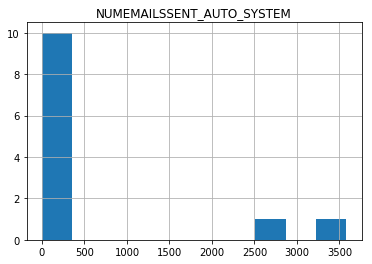

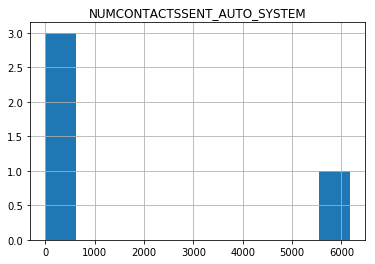

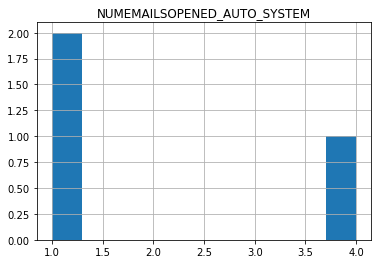

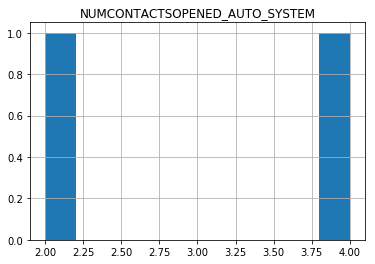

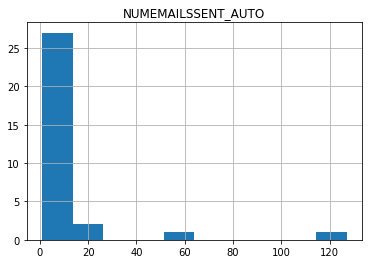

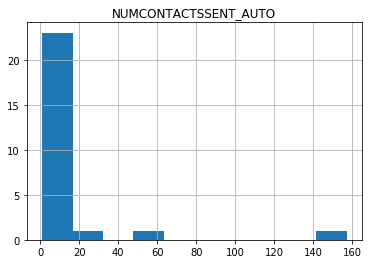

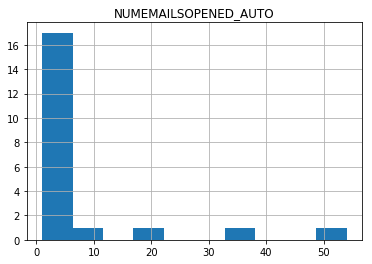

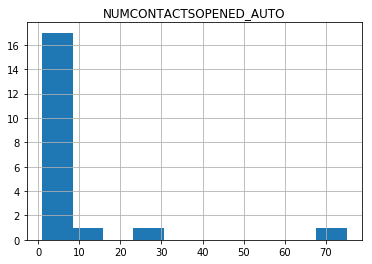

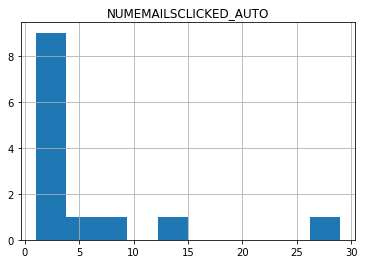

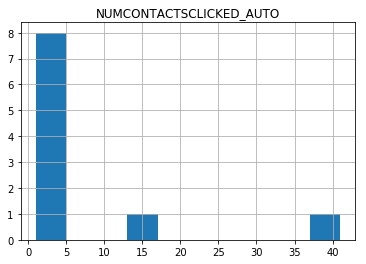

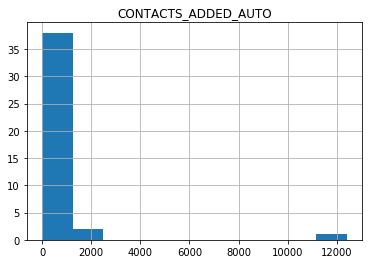

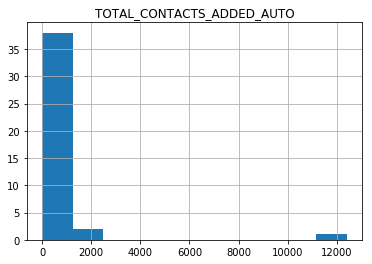

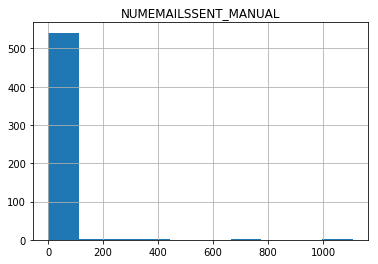

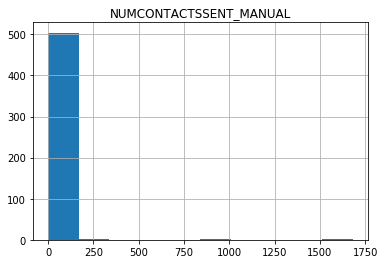

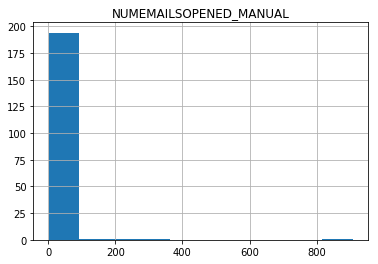

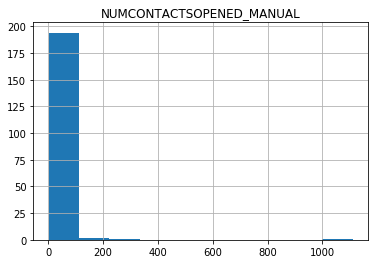

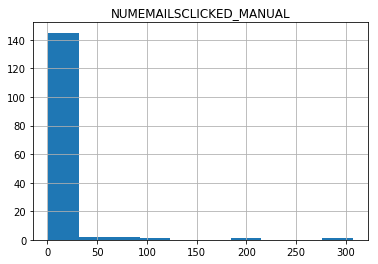

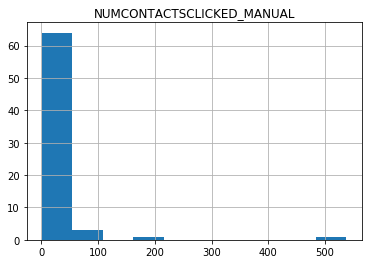

In [471]:
# i=0
# #tdata[numeric[0:20]].hist(ax = ax2)
# fig, axs = plt.subplots(20, 5, sharey=True, tight_layout=True)
for featurelist in featurelist2:
    for feature in featurelist:
        print("*************",feature,"**************")
        #usagedatasetfree2.sort_values(['appname','date'],ascending=True).groupby('appname').head(1)
        value_countsd=pd.DataFrame(usagedatasetfree_firstday[feature].value_counts())
        value_countsd.hist()

************* NUMEMAILSSENT_AUTO_SYSTEM **************
************* NUMCONTACTSSENT_AUTO_SYSTEM **************
************* NUMEMAILSOPENED_AUTO_SYSTEM **************
************* NUMCONTACTSOPENED_AUTO_SYSTEM **************
************* NUMEMAILSSENT_AUTO **************
************* NUMCONTACTSSENT_AUTO **************
************* NUMEMAILSOPENED_AUTO **************
************* NUMCONTACTSOPENED_AUTO **************
************* NUMEMAILSCLICKED_AUTO **************
************* NUMCONTACTSCLICKED_AUTO **************
************* CONTACTS_ADDED_AUTO **************
************* TOTAL_CONTACTS_ADDED_AUTO **************
************* NUMEMAILSSENT_MANUAL **************
************* NUMCONTACTSSENT_MANUAL **************
************* NUMEMAILSOPENED_MANUAL **************
************* NUMCONTACTSOPENED_MANUAL **************
************* NUMEMAILSCLICKED_MANUAL **************
************* NUMCONTACTSCLICKED_MANUAL **************


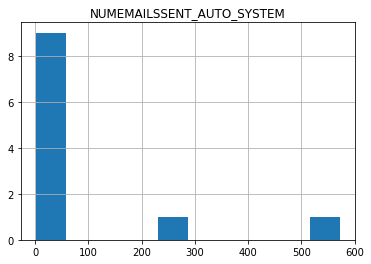

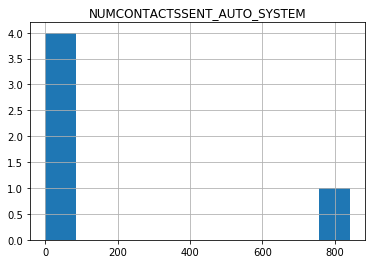

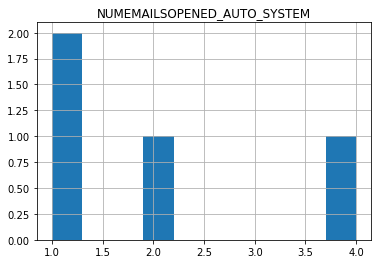

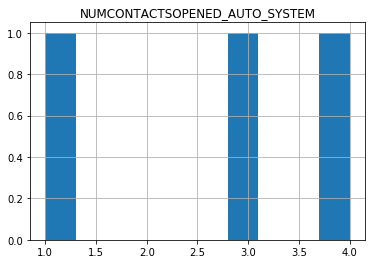

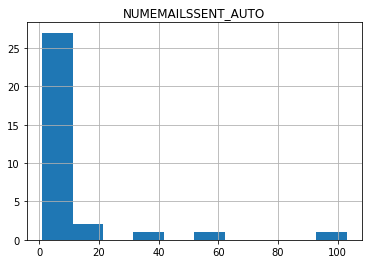

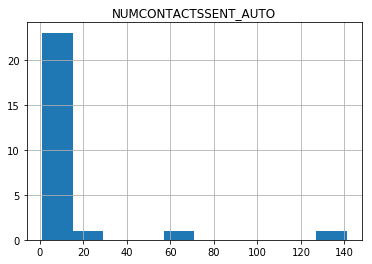

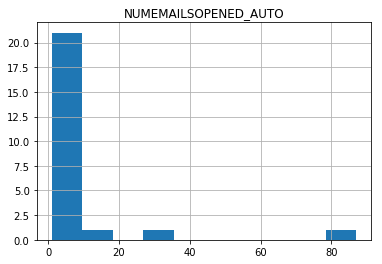

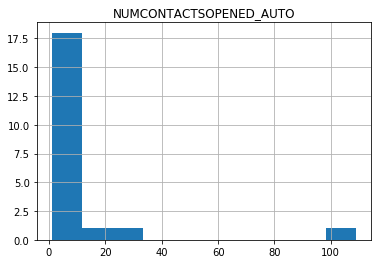

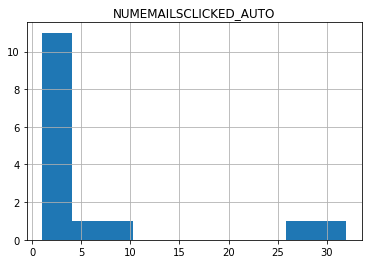

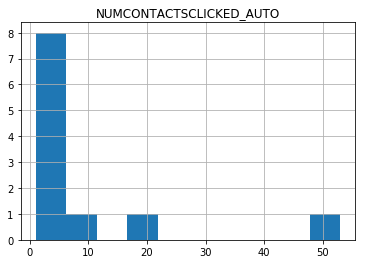

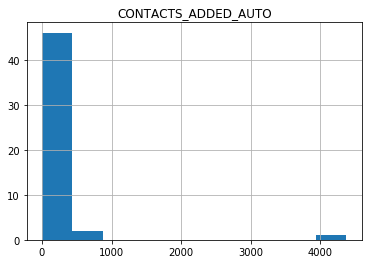

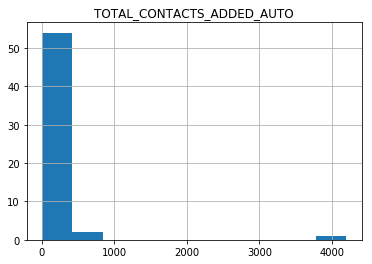

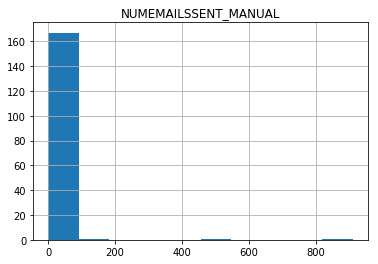

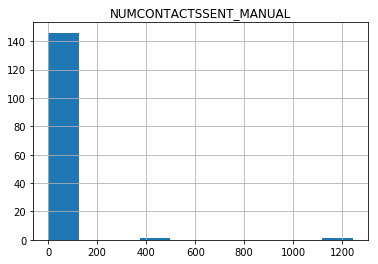

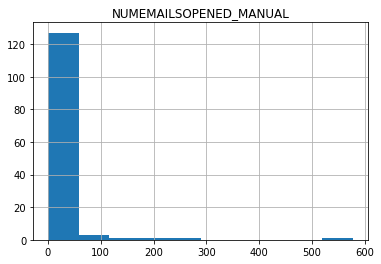

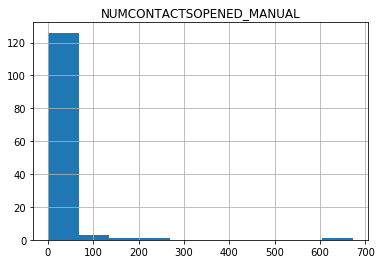

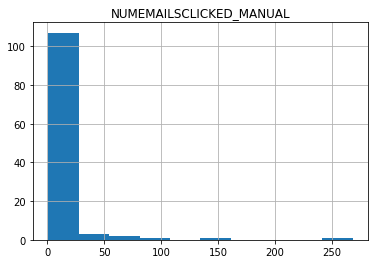

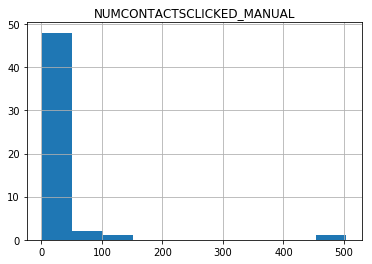

In [472]:
for featurelist in featurelist2:
    for feature in featurelist:
        print("*************",feature,"**************")
        usagedatasetfree_secondday=usagedatasetfree2.sort_values(['appname','date'],ascending=True).groupby('appname').nth(1)
        value_countsd=pd.DataFrame(usagedatasetfree_secondday[feature].value_counts())
        value_countsd.hist()

************* NUMEMAILSSENT_AUTO_SYSTEM **************
************* NUMCONTACTSSENT_AUTO_SYSTEM **************
************* NUMEMAILSOPENED_AUTO_SYSTEM **************
************* NUMCONTACTSOPENED_AUTO_SYSTEM **************
************* NUMEMAILSSENT_AUTO **************
************* NUMCONTACTSSENT_AUTO **************
************* NUMEMAILSOPENED_AUTO **************
************* NUMCONTACTSOPENED_AUTO **************
************* NUMEMAILSCLICKED_AUTO **************
************* NUMCONTACTSCLICKED_AUTO **************
************* CONTACTS_ADDED_AUTO **************
************* TOTAL_CONTACTS_ADDED_AUTO **************
************* NUMEMAILSSENT_MANUAL **************
************* NUMCONTACTSSENT_MANUAL **************
************* NUMEMAILSOPENED_MANUAL **************
************* NUMCONTACTSOPENED_MANUAL **************
************* NUMEMAILSCLICKED_MANUAL **************
************* NUMCONTACTSCLICKED_MANUAL **************


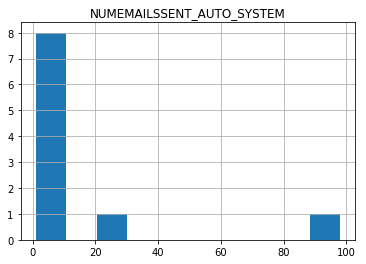

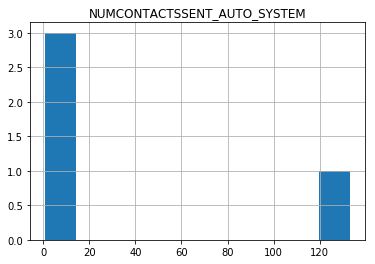

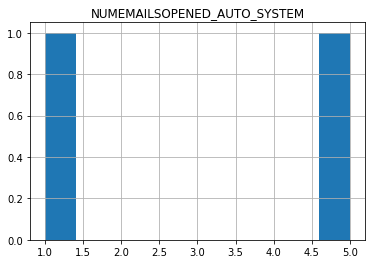

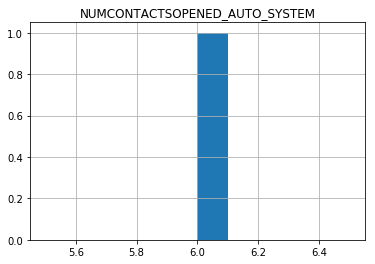

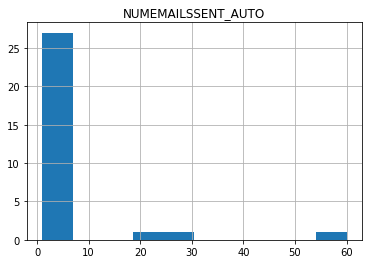

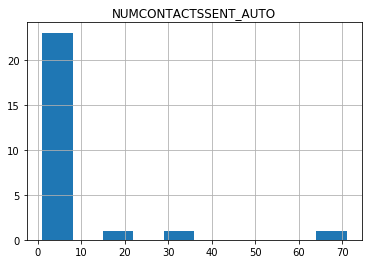

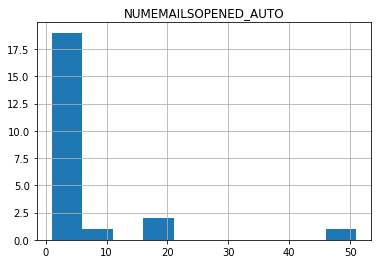

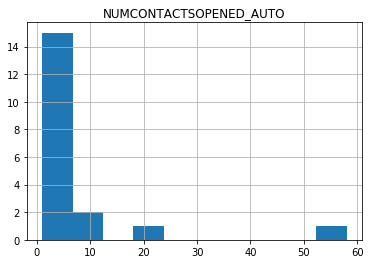

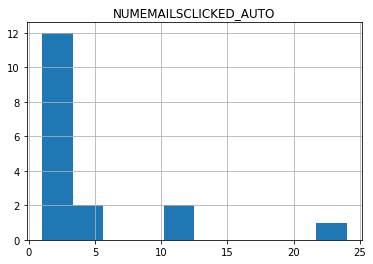

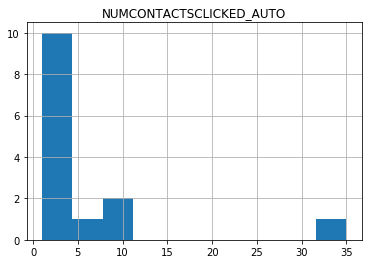

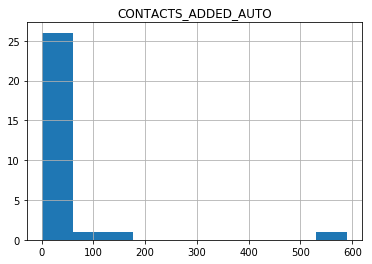

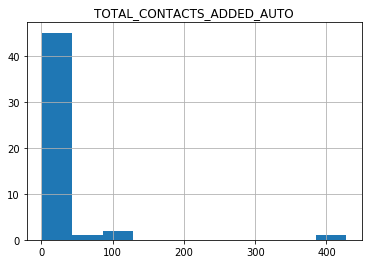

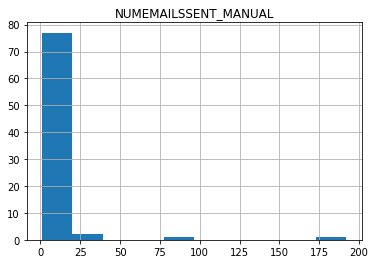

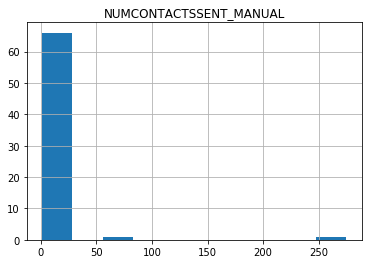

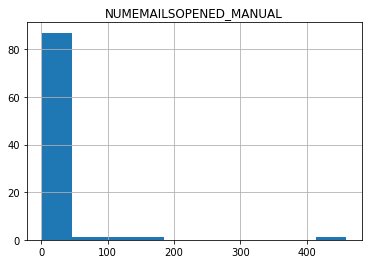

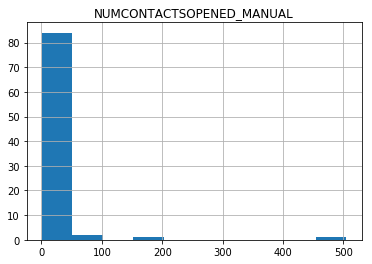

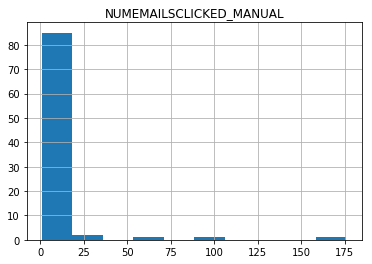

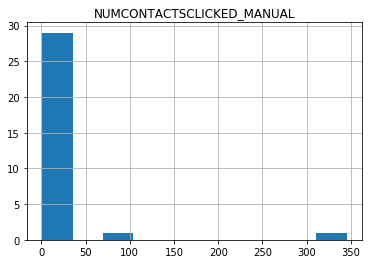

In [473]:
for featurelist in featurelist2:
    for feature in featurelist:
        print("*************",feature,"**************")
        usagedatasetfree_thirdday=usagedatasetfree2.sort_values(['appname','date'],ascending=True).groupby('appname').nth(2)
        value_countsd=pd.DataFrame(usagedatasetfree_thirdday[feature].value_counts())
        value_countsd.hist()

************* NUMEMAILSSENT_AUTO_SYSTEM **************
************* NUMCONTACTSSENT_AUTO_SYSTEM **************
************* NUMEMAILSOPENED_AUTO_SYSTEM **************
************* NUMCONTACTSOPENED_AUTO_SYSTEM **************
************* NUMEMAILSSENT_AUTO **************
************* NUMCONTACTSSENT_AUTO **************
************* NUMEMAILSOPENED_AUTO **************
************* NUMCONTACTSOPENED_AUTO **************
************* NUMEMAILSCLICKED_AUTO **************
************* NUMCONTACTSCLICKED_AUTO **************
************* CONTACTS_ADDED_AUTO **************
************* TOTAL_CONTACTS_ADDED_AUTO **************
************* NUMEMAILSSENT_MANUAL **************
************* NUMCONTACTSSENT_MANUAL **************
************* NUMEMAILSOPENED_MANUAL **************
************* NUMCONTACTSOPENED_MANUAL **************
************* NUMEMAILSCLICKED_MANUAL **************
************* NUMCONTACTSCLICKED_MANUAL **************


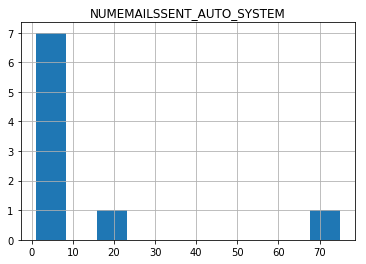

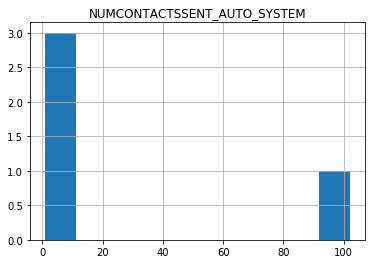

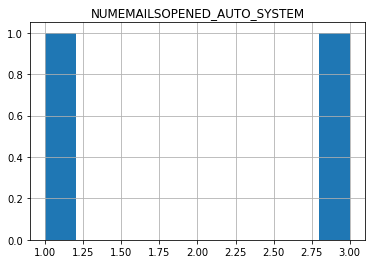

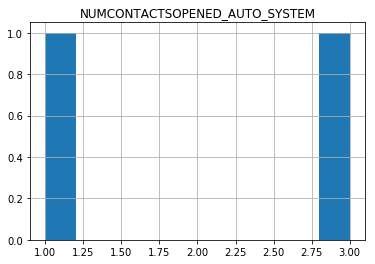

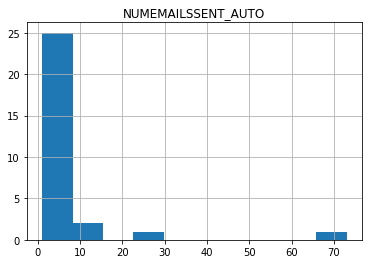

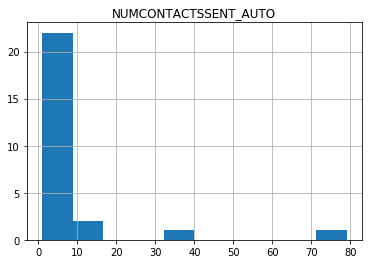

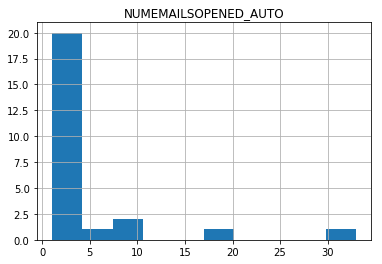

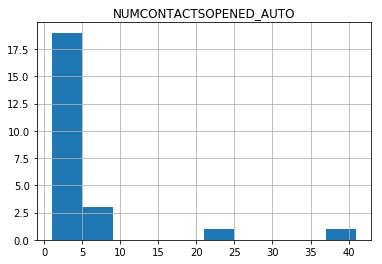

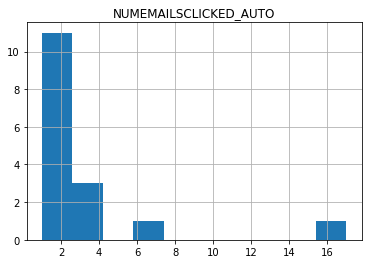

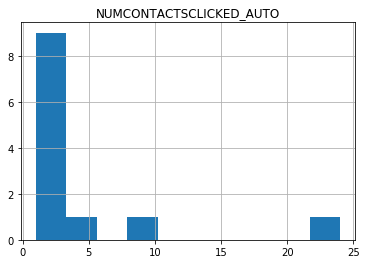

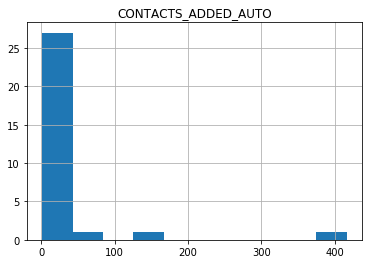

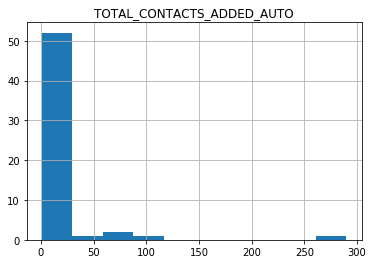

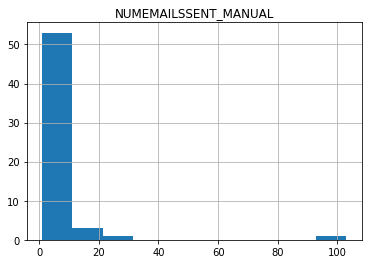

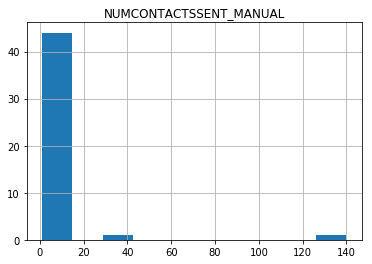

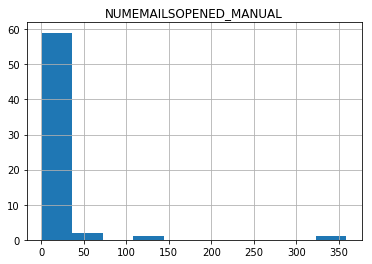

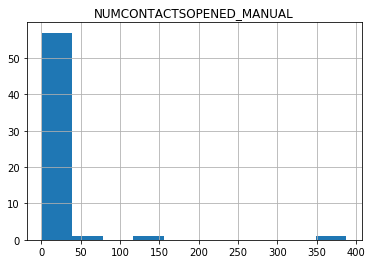

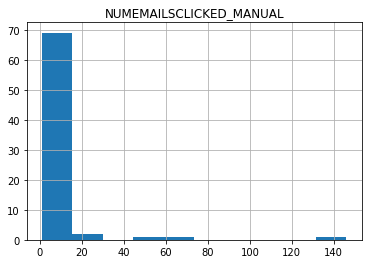

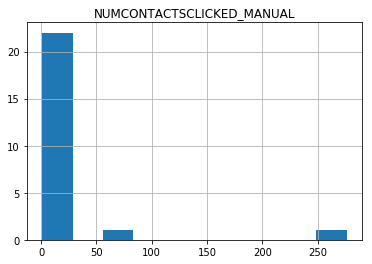

In [98]:
for featurelist in featurelist2:
    for feature in featurelist:
        print("*************",feature,"**************")
        usagedatasetfree_fourthday=usagedatasetfree2.sort_values(['appname','date'],ascending=True).groupby('appname').nth(3)
        value_countsd=pd.DataFrame(usagedatasetfree_fourthday[feature].value_counts())
        value_countsd.hist()

In [474]:
timeseriesdata_target1=pd.DataFrame()

for i in range(0,14):
    df=pd.DataFrame()
    usagedatasetfree_day=sample_usage[sample_usage['Target']==1].sort_values(['appname','date'],ascending=True).groupby('appname').nth(i).reset_index()
    usagedatasetfree_day.fillna(0,inplace=True)
    usagedatasetfree_day.drop(['appname','date','free_email'],inplace=True,axis=1)
    usagedatasetfree_day_sum=usagedatasetfree_day.apply(np.sum)
    df=df.append(pd.DataFrame(usagedatasetfree_day_sum.values, index=usagedatasetfree_day_sum.keys()).T)
    #print(df)
#    usagedatasetfree_day_sum=pd.DataFrame(usagedatasetfree_day.sum())
    timeseriesdata_target1=pd.concat([timeseriesdata_target1,df],axis=0,ignore_index=True)

In [475]:
timeseriesdata_target1

,CONTACTS_ADDED_AUTO,CONTACTS_ADDED_OTHER,CONTACTS_UPDATED,CONTACT_GROUP_COUNT,FLOW_RECIPIENT_COUNT,GOAL_ACHIEVED_COUNT,LOGIN_COUNT,NUMCONTACTSCLICKED_AUTO,NUMCONTACTSCLICKED_MANUAL,NUMCONTACTSOPENED_AUTO,...,invoice_created,invoices_paid,lead_sources,merchant_account_created,merchant_infu_created,num_integrations,num_invoice_promos,number_of_notes_created,number_of_tasks_created,total_processed_usd
0,132.0,4280.0,3041.0,238.0,429.0,612.0,171.0,14.0,37.0,98.0,...,10.0,10.0,28.0,120.0,120.0,39.0,3.0,42.0,4.0,1985.630006
1,76.0,2895.0,1317.0,114.0,378.0,114.0,69.0,48.0,13.0,178.0,...,2.0,2.0,11.0,121.0,120.0,28.0,1.0,17.0,1.0,11.950000
2,9.0,384.0,259.0,44.0,13.0,10.0,29.0,1.0,3.0,7.0,...,0.0,0.0,0.0,0.0,0.0,13.0,0.0,2.0,0.0,0.000000
3,0.0,264.0,710.0,26.0,693.0,747.0,13.0,21.0,9.0,56.0,...,0.0,0.0,2.0,0.0,0.0,7.0,0.0,178.0,4.0,0.000000
4,1.0,5.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.000000
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
6,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


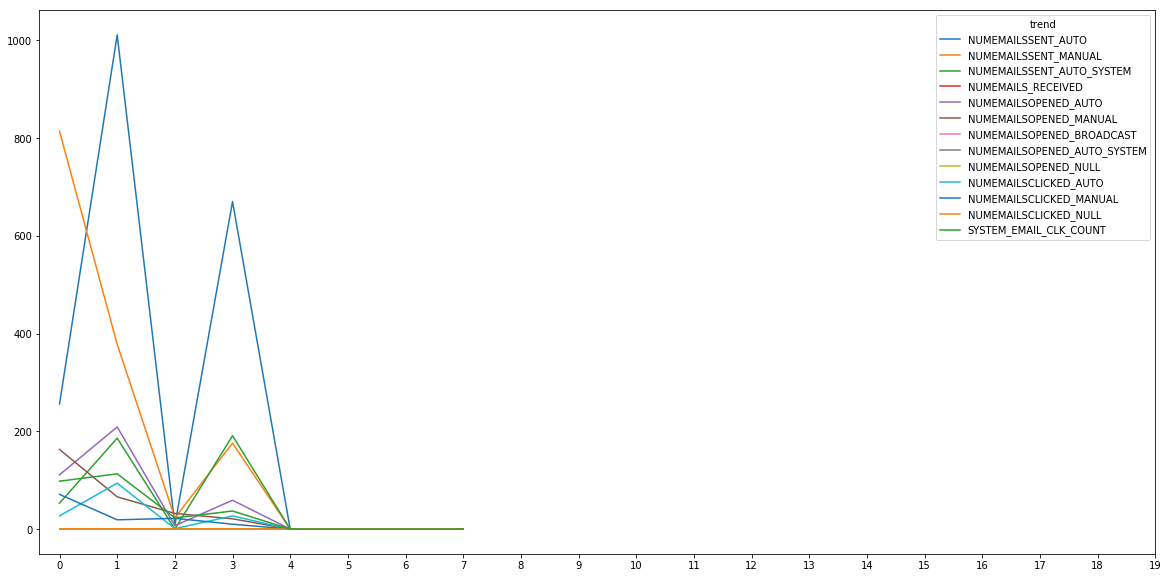

In [476]:
timeseriesdata_target1[email_features].plot(figsize=(20,10), xticks=range(0, 20)).legend(title='trend', bbox_to_anchor=(1, 1))

In [477]:
timeseriesdata_target0=pd.DataFrame()

for i in range(0,14):
    df=pd.DataFrame()
    usagedatasetfree_day=sample_usage[sample_usage['Target']==0].sort_values(['appname','date'],ascending=True).groupby('appname').nth(i).reset_index()
    usagedatasetfree_day.fillna(0,inplace=True)
    usagedatasetfree_day.drop(['appname','date','free_email'],inplace=True,axis=1)
    usagedatasetfree_day_sum=usagedatasetfree_day.apply(np.sum)
    df=df.append(pd.DataFrame(usagedatasetfree_day_sum.values, index=usagedatasetfree_day_sum.keys()).T)
    #print(df)
#    usagedatasetfree_day_sum=pd.DataFrame(usagedatasetfree_day.sum())
    timeseriesdata_target0=pd.concat([timeseriesdata_target0,df],axis=0,ignore_index=True)

In [479]:
timeseriesdata_target0

,CONTACTS_ADDED_AUTO,CONTACTS_ADDED_OTHER,CONTACTS_UPDATED,CONTACT_GROUP_COUNT,FLOW_RECIPIENT_COUNT,GOAL_ACHIEVED_COUNT,LOGIN_COUNT,NUMCONTACTSCLICKED_AUTO,NUMCONTACTSCLICKED_MANUAL,NUMCONTACTSOPENED_AUTO,...,invoice_created,invoices_paid,lead_sources,merchant_account_created,merchant_infu_created,num_integrations,num_invoice_promos,number_of_notes_created,number_of_tasks_created,total_processed_usd
0,150.0,147584.0,10381.0,691.0,307.0,97.0,378.0,38.0,127.0,76.0,...,23.0,19.0,5.0,139.0,54.0,119.0,39.0,119.0,125.0,16720.0
1,0.0,2.0,7.0,1.0,2.0,2.0,3.0,0.0,4.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


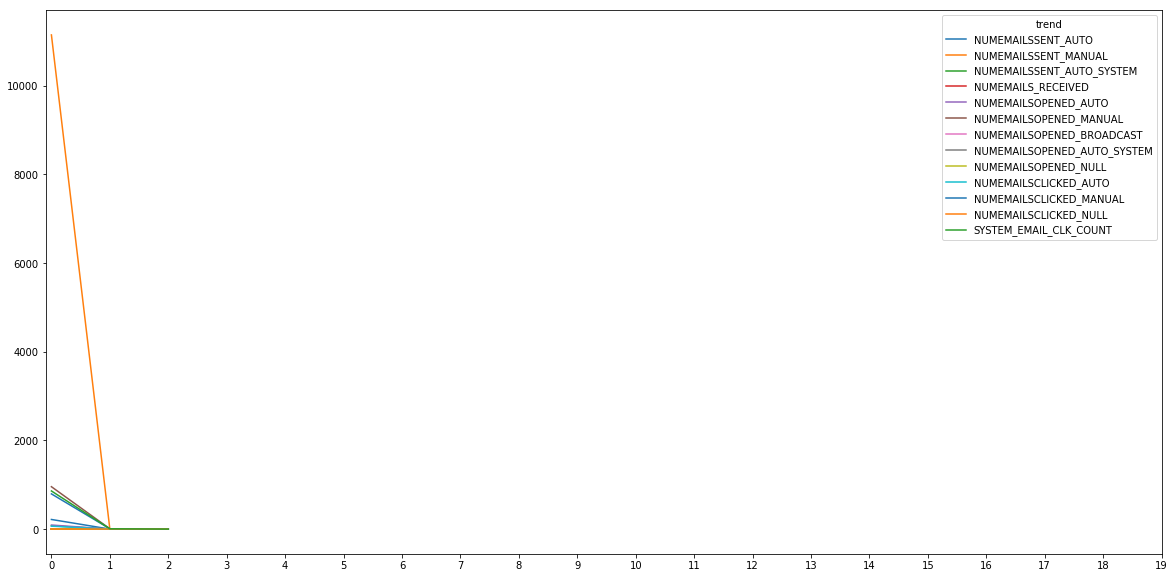

In [480]:
timeseriesdata_target0[email_features].plot(figsize=(20,10), xticks=range(0, 20)).legend(title='trend', bbox_to_anchor=(1, 1))

In [481]:
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop

def get_top_abs_correlations(df, n):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(sample_usage[email_features], 10))

Top Absolute Correlations
NUMEMAILSCLICKED_MANUAL    SYSTEM_EMAIL_CLK_COUNT       0.987571
NUMEMAILSSENT_AUTO         NUMEMAILSOPENED_AUTO         0.856606
NUMEMAILSOPENED_AUTO       NUMEMAILSCLICKED_AUTO        0.832850
NUMEMAILSSENT_AUTO         NUMEMAILSCLICKED_AUTO        0.732437
NUMEMAILSSENT_MANUAL       NUMEMAILSOPENED_MANUAL       0.655518
NUMEMAILSSENT_AUTO_SYSTEM  NUMEMAILSOPENED_AUTO         0.257410
NUMEMAILSCLICKED_AUTO      SYSTEM_EMAIL_CLK_COUNT       0.159432
NUMEMAILSOPENED_AUTO       SYSTEM_EMAIL_CLK_COUNT       0.133541
NUMEMAILSSENT_AUTO         NUMEMAILSSENT_AUTO_SYSTEM    0.129109
                           SYSTEM_EMAIL_CLK_COUNT       0.117614
dtype: float64


In [482]:
#NUMEMAILSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMEMAILS_RECEIVED,NUMEMAILSSENT_AUTO_SYSTEM
targetcorr={}
for each in email_features:
    targetcorr[each]=sample_usage[each].corr(sample_usage['Target'])


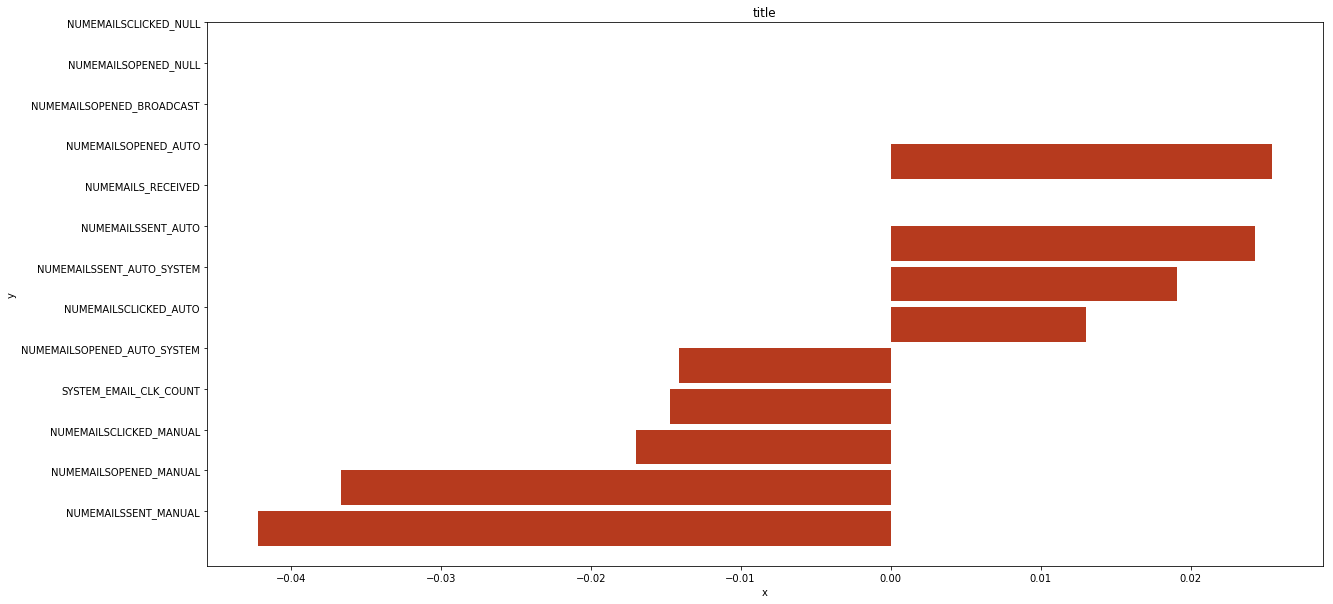

In [489]:
import operator
targetcorr=dict(sorted(targetcorr.items(), key=operator.itemgetter(1)))
x =list(targetcorr.keys())
y = list(targetcorr.values())

fig, ax = plt.subplots(figsize=(20,10))    
width = 0.85 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="#B63A1E")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')      
plt.show()

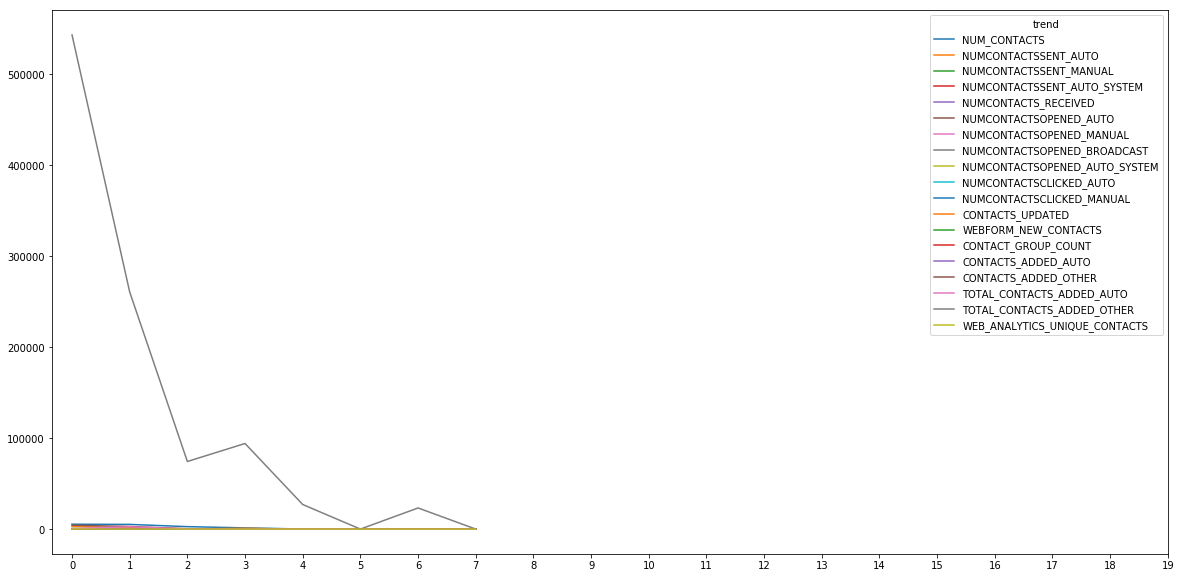

In [490]:
timeseriesdata_target1[contact_features].plot(figsize=(20,10), xticks=range(0, 20)).legend(title='trend', bbox_to_anchor=(1, 1))

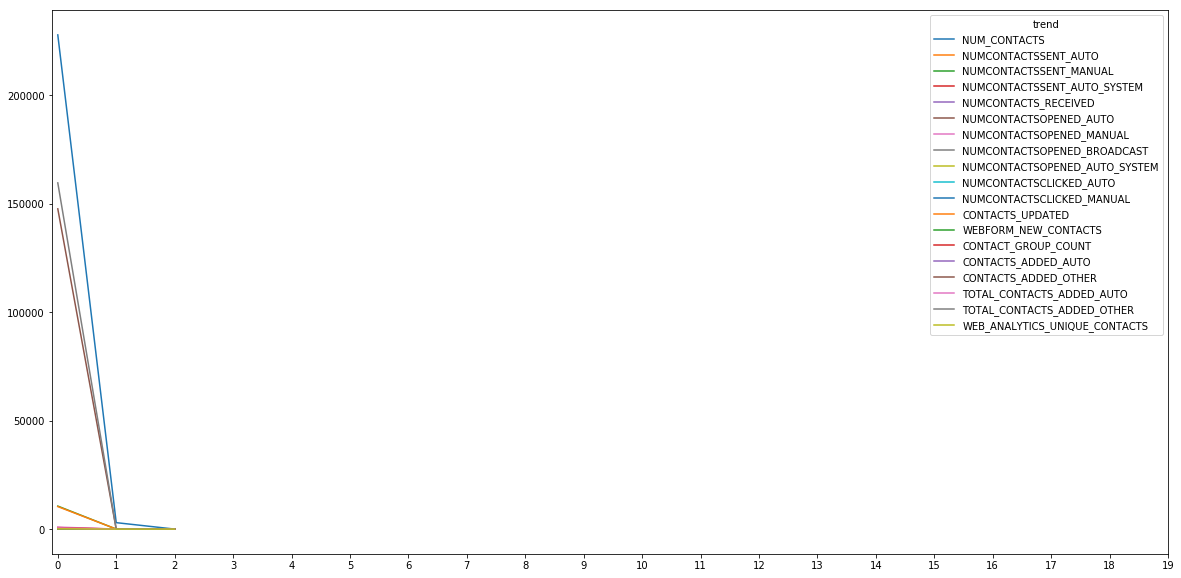

In [491]:
timeseriesdata_target0[contact_features].plot(figsize=(20,10), xticks=range(0, 20)).legend(title='trend', bbox_to_anchor=(1, 1))

In [492]:
print(get_top_abs_correlations(sample_usage[contact_features], 10))

NUM_CONTACTS              CONTACTS_ADDED_OTHER         0.997843
NUMCONTACTSSENT_AUTO      NUMCONTACTSOPENED_AUTO       0.841371
NUMCONTACTSCLICKED_AUTO   TOTAL_CONTACTS_ADDED_AUTO    0.827125
NUMCONTACTSOPENED_AUTO    NUMCONTACTSCLICKED_AUTO      0.798498
                          TOTAL_CONTACTS_ADDED_AUTO    0.761500
NUMCONTACTSSENT_AUTO      TOTAL_CONTACTS_ADDED_AUTO    0.748138
                          NUMCONTACTSCLICKED_AUTO      0.718211
NUMCONTACTSSENT_MANUAL    NUMCONTACTSOPENED_MANUAL     0.630789
NUMCONTACTSOPENED_MANUAL  NUMCONTACTSCLICKED_MANUAL    0.615487
                          CONTACTS_UPDATED             0.546593
dtype: float64


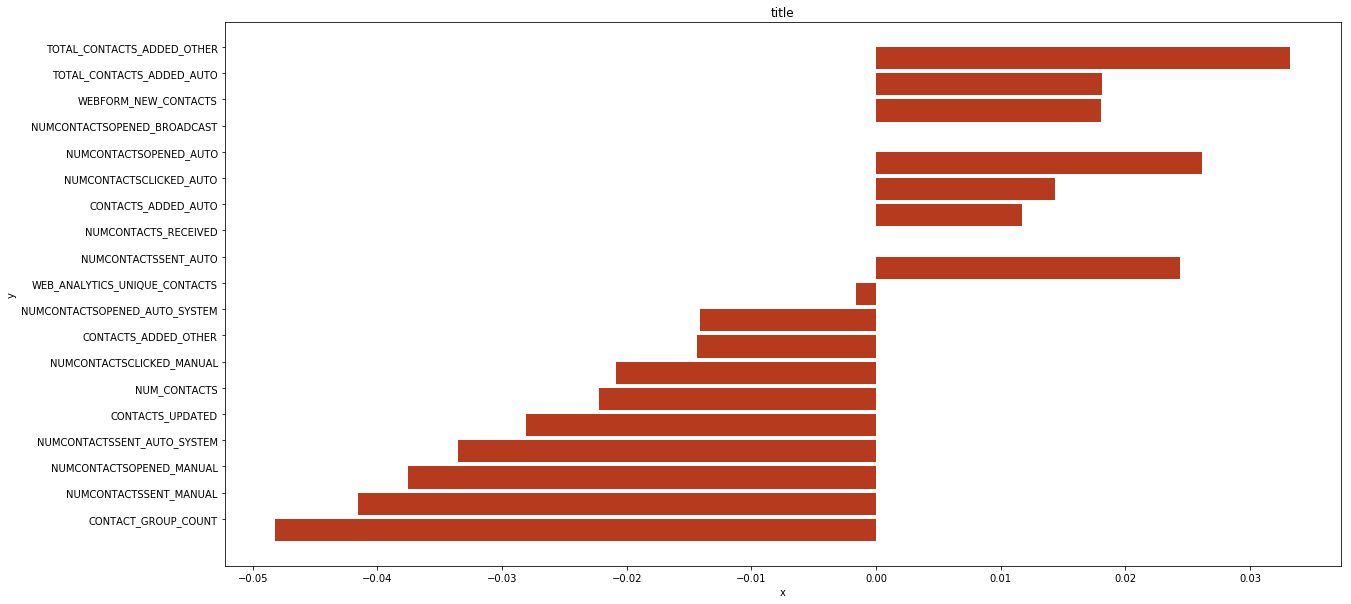

In [493]:
targetcorr={}
for each in contact_features:
    targetcorr[each]=sample_usage[each].corr(sample_usage['Target'])

import operator
targetcorr=dict(sorted(targetcorr.items(), key=operator.itemgetter(1)))
x =list(targetcorr.keys())
y = list(targetcorr.values())

fig, ax = plt.subplots(figsize=(20,10))    
width = 0.85 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="#B63A1E")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')      
plt.show()    


In [494]:
contact_features

['NUM_CONTACTS',
 'NUMCONTACTSSENT_AUTO',
 'NUMCONTACTSSENT_MANUAL',
 'NUMCONTACTSSENT_AUTO_SYSTEM',
 'NUMCONTACTS_RECEIVED',
 'NUMCONTACTSOPENED_AUTO',
 'NUMCONTACTSOPENED_MANUAL',
 'NUMCONTACTSOPENED_BROADCAST',
 'NUMCONTACTSOPENED_AUTO_SYSTEM',
 'NUMCONTACTSCLICKED_AUTO',
 'NUMCONTACTSCLICKED_MANUAL',
 'CONTACTS_UPDATED',
 'WEBFORM_NEW_CONTACTS',
 'CONTACT_GROUP_COUNT',
 'CONTACTS_ADDED_AUTO',
 'CONTACTS_ADDED_OTHER',
 'TOTAL_CONTACTS_ADDED_AUTO',
 'TOTAL_CONTACTS_ADDED_OTHER',
 'WEB_ANALYTICS_UNIQUE_CONTACTS']

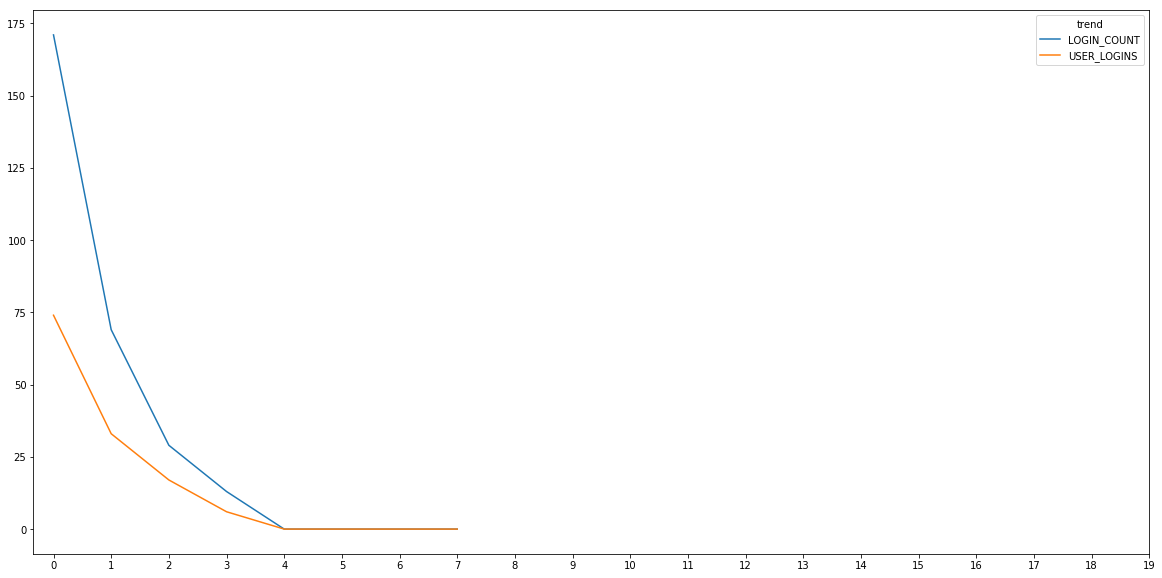

In [495]:

timeseriesdata_target1[login_features].plot(figsize=(20,10), xticks=range(0, 20)).legend(title='trend', bbox_to_anchor=(1, 1))

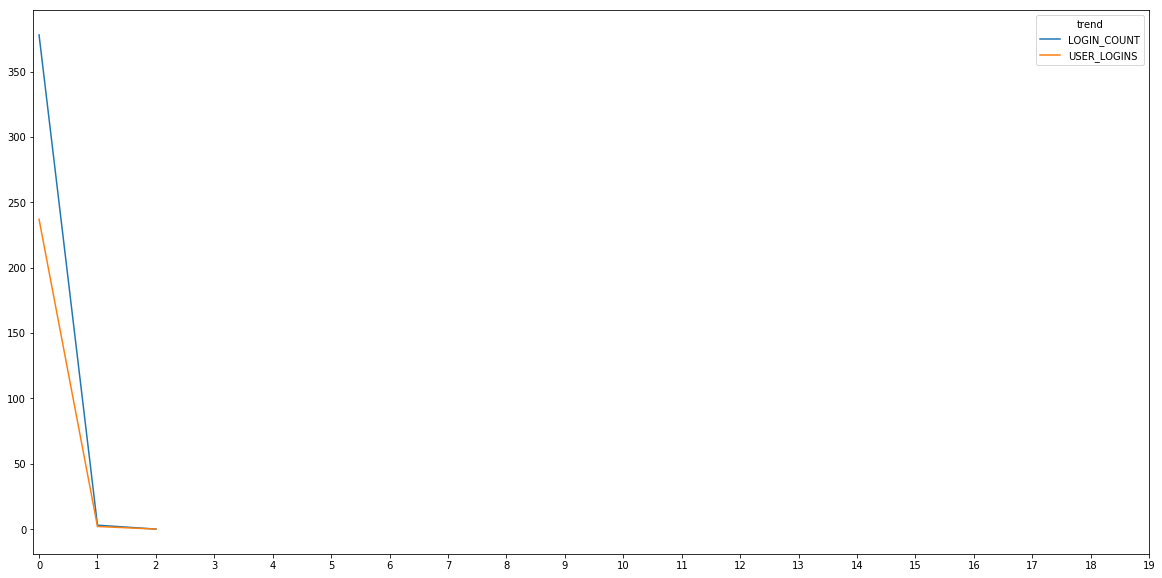

In [496]:
timeseriesdata_target0[login_features].plot(figsize=(20,10), xticks=range(0, 20)).legend(title='trend', bbox_to_anchor=(1, 1))

In [497]:
print(get_top_abs_correlations(sample_usage[login_features], 10))

LOGIN_COUNT  USER_LOGINS    0.817016
dtype: float64


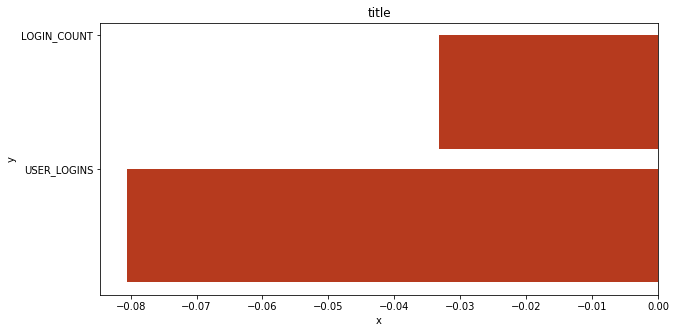

In [498]:
targetcorr={}
for each in login_features:
    targetcorr[each]=sample_usage[each].corr(sample_usage['Target'])

import operator
targetcorr=dict(sorted(targetcorr.items(), key=operator.itemgetter(1)))
x =list(targetcorr.keys())
y = list(targetcorr.values())

fig, ax = plt.subplots(figsize=(10,5))    
width = 0.85 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="#B63A1E")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')      
plt.show()    



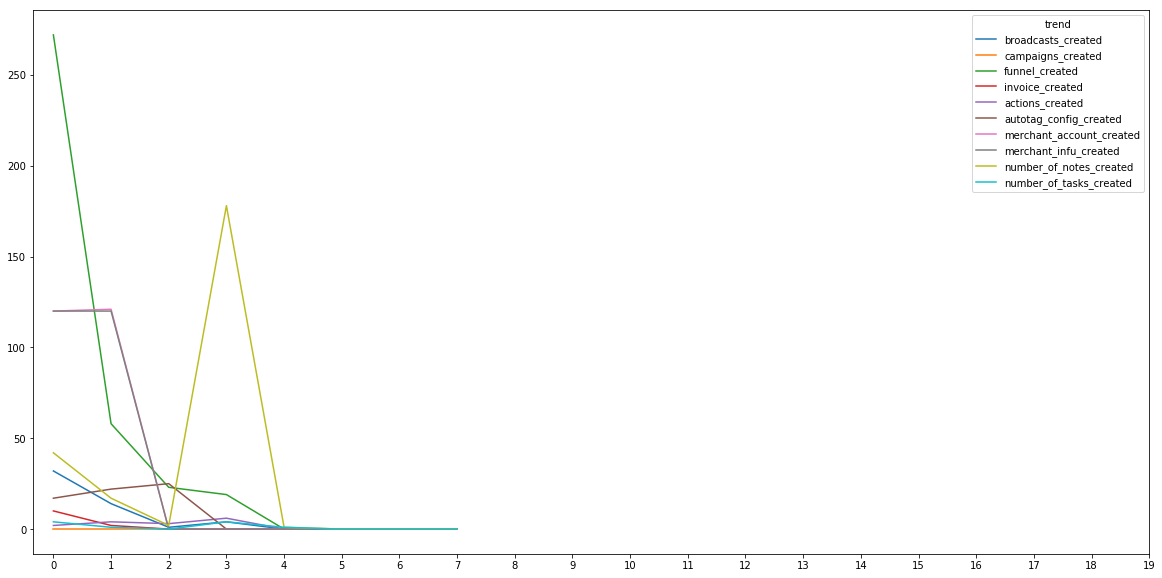

In [499]:


timeseriesdata_target1[created_features].plot(figsize=(20,10), xticks=range(0, 20)).legend(title='trend', bbox_to_anchor=(1, 1))

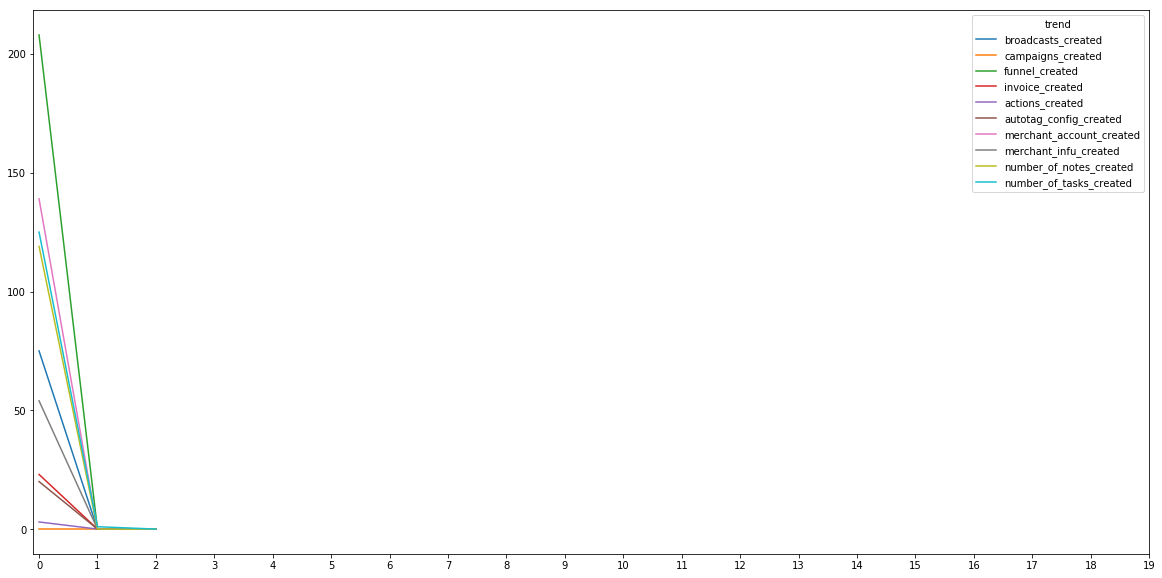

In [500]:
timeseriesdata_target0[created_features].plot(figsize=(20,10), xticks=range(0, 20)).legend(title='trend', bbox_to_anchor=(1, 1))

In [501]:



print(get_top_abs_correlations(sample_usage[created_features], 10))

merchant_account_created  merchant_infu_created      0.946421
broadcasts_created        number_of_notes_created    0.227718
                          funnel_created             0.217673
funnel_created            number_of_notes_created    0.202781
                          autotag_config_created     0.159672
invoice_created           number_of_tasks_created    0.147023
broadcasts_created        number_of_tasks_created    0.118003
                          actions_created            0.074991
funnel_created            invoice_created            0.053643
merchant_infu_created     number_of_tasks_created    0.037119
dtype: float64


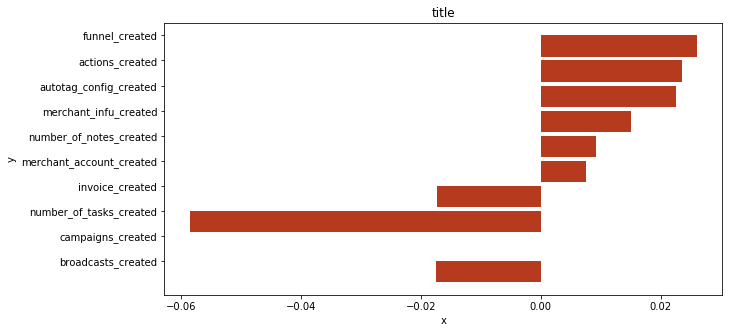

In [502]:
targetcorr={}
for each in created_features:
    targetcorr[each]=sample_usage[each].corr(sample_usage['Target'])

import operator
targetcorr=dict(sorted(targetcorr.items(), key=operator.itemgetter(1)))
x =list(targetcorr.keys())
y = list(targetcorr.values())

fig, ax = plt.subplots(figsize=(10,5))    
width = 0.85 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="#B63A1E")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
plt.title('title')
plt.xlabel('x')
plt.ylabel('y')      
plt.show()    




In [503]:
#auto_system_features,auto_features,manual_features

In [504]:
print(get_top_abs_correlations(sample_usage[auto_features], 10))

NUMEMAILSSENT_AUTO     NUMCONTACTSSENT_AUTO         0.999571
NUMEMAILSOPENED_AUTO   NUMCONTACTSOPENED_AUTO       0.995274
NUMEMAILSCLICKED_AUTO  NUMCONTACTSCLICKED_AUTO      0.985841
NUMEMAILSSENT_AUTO     NUMEMAILSOPENED_AUTO         0.856606
NUMEMAILSCLICKED_AUTO  TOTAL_CONTACTS_ADDED_AUTO    0.852550
NUMCONTACTSSENT_AUTO   NUMEMAILSOPENED_AUTO         0.848294
NUMEMAILSSENT_AUTO     NUMCONTACTSOPENED_AUTO       0.848015
NUMCONTACTSSENT_AUTO   NUMCONTACTSOPENED_AUTO       0.841371
NUMEMAILSOPENED_AUTO   NUMCONTACTSCLICKED_AUTO      0.834548
                       NUMEMAILSCLICKED_AUTO        0.832850
dtype: float64


In [505]:
print(get_top_abs_correlations(sample_usage[auto_system_features], 10))

NUMEMAILSOPENED_AUTO_SYSTEM  NUMCONTACTSOPENED_AUTO_SYSTEM    1.000000
NUMEMAILSSENT_AUTO_SYSTEM    NUMCONTACTSSENT_AUTO_SYSTEM      0.264556
NUMCONTACTSSENT_AUTO_SYSTEM  NUMCONTACTSOPENED_AUTO_SYSTEM    0.001739
                             NUMEMAILSOPENED_AUTO_SYSTEM      0.001739
NUMEMAILSSENT_AUTO_SYSTEM    NUMCONTACTSOPENED_AUTO_SYSTEM    0.000387
                             NUMEMAILSOPENED_AUTO_SYSTEM      0.000387
dtype: float64


In [506]:
print(get_top_abs_correlations(sample_usage[manual_features], 10))

NUMEMAILSOPENED_MANUAL    NUMCONTACTSOPENED_MANUAL     0.994883
NUMEMAILSSENT_MANUAL      NUMCONTACTSSENT_MANUAL       0.989846
                          NUMEMAILSOPENED_MANUAL       0.655518
                          NUMCONTACTSOPENED_MANUAL     0.651218
NUMCONTACTSSENT_MANUAL    NUMCONTACTSOPENED_MANUAL     0.630789
                          NUMEMAILSOPENED_MANUAL       0.624144
NUMCONTACTSOPENED_MANUAL  NUMCONTACTSCLICKED_MANUAL    0.615487
NUMEMAILSOPENED_MANUAL    NUMCONTACTSCLICKED_MANUAL    0.605482
NUMCONTACTSSENT_MANUAL    NUMCONTACTSCLICKED_MANUAL    0.415986
NUMEMAILSSENT_MANUAL      NUMCONTACTSCLICKED_MANUAL    0.406788
dtype: float64


# Features to be engineered

In [227]:
# NUMEMAILSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMEMAILS_RECEIVED,NUMEMAILSSENT_AUTO_SYSTEM,
# TOTAL_CONTACTS_ADDED_OTHER,TOTAL_CONTACTS_ADDED_AUTO,'NUMCONTACTSSENT_AUTO_SYSTEM',
# LOGIN_COUNT  USER_LOGINS merchant_infu_created funnel_created broadcasts_created actions_created
# firstlogin secondlogin,CONTACTS_UPDATED

In [228]:
mergedata_target.shape

(382630, 66)

In [229]:
sample_usage_counts = mergedata_target.groupby(['appname']).size().to_frame('size').reset_index().sort_values(['size'], ascending=[True])

In [230]:
sample_usage_counts['size'].value_counts()

14    26749
1       193
2       134
4       105
9        99
7        96
8        91
3        88
10       84
5        79
11       75
13       67
6        65
12       53
15       49
16        1
Name: size, dtype: int64

In [231]:
mergedata_target.head()

,appname,date,free_email,NUM_CONTACTS,NUMEMAILSSENT_AUTO,NUMCONTACTSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMCONTACTSSENT_MANUAL,NUMEMAILSSENT_AUTO_SYSTEM,NUMCONTACTSSENT_AUTO_SYSTEM,...,num_invoice_promos,invoices_paid,lead_sources,actions_created,autotag_config_created,merchant_account_created,merchant_infu_created,number_of_notes_created,number_of_tasks_created,Target
0,ri578,2018-10-25 00:00:00,False,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,nz450,2018-04-19 00:00:00,True,3.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,hy503,2018-07-19 00:00:00,True,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,du584,2018-10-22 00:00:00,False,4.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,zm520,2018-08-19 00:00:00,False,3.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [232]:
sample_usage_sorted=mergedata_target.sort_values(['appname','date'],ascending=True)

In [233]:
sample_usage_sorted

,appname,date,free_email,NUM_CONTACTS,NUMEMAILSSENT_AUTO,NUMCONTACTSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMCONTACTSSENT_MANUAL,NUMEMAILSSENT_AUTO_SYSTEM,NUMCONTACTSSENT_AUTO_SYSTEM,...,num_invoice_promos,invoices_paid,lead_sources,actions_created,autotag_config_created,merchant_account_created,merchant_infu_created,number_of_notes_created,number_of_tasks_created,Target
110324,5058974,2018-05-15 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
189515,5058974,2018-05-16 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
132547,5058974,2018-05-17 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
277395,5058974,2018-05-18 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
242074,5058974,2018-05-19 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
113789,5058974,2018-05-20 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
161211,5058974,2018-05-21 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
54225,5058974,2018-05-22 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
58486,5058974,2018-05-23 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
105198,5058974,2018-05-24 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [234]:
# sample_usage_adnldata=pd.DataFrame(columns=["appname","PERCNTGEMAILSSENT_AUTO_1stday","PERCNTGEMAILSSENT_AUTO_2ndday","PERCNTGEMAILSSENT_AUTO_3rdday",
#                                             "PERCNTGEMAILSSENT_MANUAL_1stday","PERCNTGEMAILSSENT_MANUAL_2ndday","PERCNTGEMAILSSENT_MANUAL_3rdday",
#                                             "PERCNTGEMAILS_RECEIVED_1stday","PERCNTGEMAILS_RECEIVED_2ndday","PERCNTGEMAILS_RECEIVED_3rdday",
#                                             "PERCNTGEMAILSSENT_AUTO_SYSTEM_1stday","PERCNTGEMAILSSENT_AUTO_SYSTEM_2ndday","PERCNTGEMAILSSENT_AUTO_SYSTEM_3rdday",
#                                             "TOTAL_CONTACTS_ADDED_OTHER_1stday","TOTAL_CONTACTS_ADDED_OTHER_2ndday","TOTAL_CONTACTS_ADDED_OTHER_3rdday",
#                                             "TOTAL_CONTACTS_ADDED_AUTO_1stday","TOTAL_CONTACTS_ADDED_AUTO_2ndday","TOTAL_CONTACTS_ADDED_AUTO_3rdday",
#                                             "PERCNTGCONTACTSSENT_AUTO_SYSTEM_1stday","PERCNTGCONTACTSSENT_AUTO_SYSTEM_2ndday","PERCNTGCONTACTSSENT_AUTO_SYSTEM_3rdday",
#                                             "PERCNTGLOGIN_COUNT_1stday","PERCNTGLOGIN_COUNT_2ndday","PERCNTGLOGIN_COUNT_3rdday" , 
#                                             "PERCNTGUSER_LOGINS_1stday","PERCNTGUSER_LOGINS_2ndday","PERCNTGUSER_LOGINS_3rdday",
#                                             "PERCNTGmerchant_infu_created_1stday","PERCNTGmerchant_infu_created_2ndday","PERCNTGmerchant_infu_created_3rdday",
#                                             "PERCNTGfunnel_created_1stday","PERCNTGfunnel_created_2ndday","PERCNTGfunnel_created_3rdday",
#                                             "PERCNTGbroadcasts_created_1stday" ,"PERCNTGbroadcasts_created_2ndday" ,"PERCNTGbroadcasts_created_3rdday" ,
#                                             "PERCNTGactions_created_1stday","PERCNTGactions_created_2ndday","PERCNTGactions_created_3rdday",
#                                             "firstlogin", "secondlogin"])

Taking a sample to do calcualtions

get first 3 days data of these 

In [235]:
sample_usage_first3days=mergedata_target.sort_values(['appname','date'],ascending=True).groupby('appname').head(3)

In [236]:
sample_usage_first3days.head()

,appname,date,free_email,NUM_CONTACTS,NUMEMAILSSENT_AUTO,NUMCONTACTSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMCONTACTSSENT_MANUAL,NUMEMAILSSENT_AUTO_SYSTEM,NUMCONTACTSSENT_AUTO_SYSTEM,...,num_invoice_promos,invoices_paid,lead_sources,actions_created,autotag_config_created,merchant_account_created,merchant_infu_created,number_of_notes_created,number_of_tasks_created,Target
110324,5058974,2018-05-15 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
189515,5058974,2018-05-16 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
132547,5058974,2018-05-17 00:00:00,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
152406,5274174,2017-09-13 00:00:00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
268622,5274174,2017-09-14 00:00:00,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [237]:
features_tobeengineered=['CONTACTS_UPDATED','NUMEMAILSSENT_AUTO','NUMEMAILSSENT_MANUAL','NUMEMAILS_RECEIVED','NUMEMAILSSENT_AUTO_SYSTEM',
   'TOTAL_CONTACTS_ADDED_OTHER','TOTAL_CONTACTS_ADDED_AUTO','NUMCONTACTSSENT_AUTO_SYSTEM','LOGIN_COUNT', 
                        'USER_LOGINS', 'merchant_infu_created', 'funnel_created', 'broadcasts_created'
                        ,'actions_created']

Get the features to be engineered

In [238]:
sample_usage_subset=sample_usage_first3days[['appname','date','CONTACTS_UPDATED','NUMEMAILSSENT_AUTO','NUMEMAILSSENT_MANUAL','NUMEMAILS_RECEIVED','NUMEMAILSSENT_AUTO_SYSTEM',
   'TOTAL_CONTACTS_ADDED_OTHER','TOTAL_CONTACTS_ADDED_AUTO','NUMCONTACTSSENT_AUTO_SYSTEM','LOGIN_COUNT', 
                        'USER_LOGINS', 'merchant_infu_created', 'funnel_created', 'broadcasts_created'
                        ,'actions_created']]

In [239]:
sample_usage_subset.shape

(83564, 16)

In [240]:

sample_usage_first3days_sum=sample_usage_first3days.groupby(['appname','free_email']).sum().reset_index()

In [241]:
sample_usage_first3days_sum.shape

(28028, 65)

In [242]:
sample_usage_first3days_sum.head()

,appname,free_email,NUM_CONTACTS,NUMEMAILSSENT_AUTO,NUMCONTACTSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMCONTACTSSENT_MANUAL,NUMEMAILSSENT_AUTO_SYSTEM,NUMCONTACTSSENT_AUTO_SYSTEM,NUMEMAILS_RECEIVED,...,num_invoice_promos,invoices_paid,lead_sources,actions_created,autotag_config_created,merchant_account_created,merchant_infu_created,number_of_notes_created,number_of_tasks_created,Target
0,5058974,True,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,5274174,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,5581874,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,5789774,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,6045374,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0


In [243]:
# print(sample_usage_subset_sum['appname'].nunique())
# print(sample_usage_subset_sum.shape)
# print(sample_usage_subset_sum.columns)

In [244]:
#sample_usage_subset_sum=sample_usage_subset_sum.add_suffix('_sum')

In [245]:
# sample_usage_subset_sum.rename(columns={'appname_sum':'appname'},inplace=True )
# print(sample_usage_subset_sum['appname'].nunique())
# print(sample_usage_subset_sum.shape)
# print(sample_usage_subset_sum.columns)

In [246]:
sample_usage_1stday=sample_usage_subset.sort_values(['appname','date'],ascending=True).groupby('appname').nth(0).reset_index()
sample_usage_2ndday=sample_usage_subset.sort_values(['appname','date'],ascending=True).groupby('appname').nth(1).reset_index()
sample_usage_3rdday=sample_usage_subset.sort_values(['appname','date'],ascending=True).groupby('appname').nth(2).reset_index()

sample_usage_1stday=sample_usage_1stday.add_suffix('_1stday')
sample_usage_1stday.rename(columns={'appname_1stday':'appname'},inplace=True )
print(sample_usage_1stday.shape)
sample_usage_2ndday=sample_usage_2ndday.add_suffix('_2ndday')
sample_usage_2ndday.rename(columns={'appname_2ndday':'appname'},inplace=True )
print(sample_usage_2ndday.shape)
sample_usage_3rdday=sample_usage_3rdday.add_suffix('_3rdday')
sample_usage_3rdday.rename(columns={'appname_3rdday':'appname'},inplace=True )
print(sample_usage_3rdday.shape)


df_final=sample_usage_1stday.merge(sample_usage_2ndday,on='appname',how='left').merge(sample_usage_3rdday,on='appname',how='left')

# import functools

# dfs = [sample_usage_subset_sum, sample_usage_1stday, sample_usage_2ndday,]

# df_final = functools.reduce(lambda left,right: pd.merge(left,right,on='date'), dfs)




# # sample_usage_subset_sum=pd.concat([sample_usage_subset_sum.set_index('appname_sum'), sample_usage_1stday.set_index('appname_1stday'),
# #                                   sample_usage_2ndday.set_index('appname_2ndday'), sample_usage_3rdday.set_index('appname_3rdday')], 
# #                    axis='columns')
print(df_final.shape)



(28028, 16)
(27835, 16)
(27701, 16)
(28028, 46)


In [247]:
print(sample_usage_1stday.isna().sum()/sample_usage_1stday.shape[0])
print(sample_usage_2ndday.isna().sum()/sample_usage_2ndday.shape[0])
print(sample_usage_3rdday.isna().sum()/sample_usage_3rdday.shape[0])

appname                               0.0
CONTACTS_UPDATED_1stday               0.0
LOGIN_COUNT_1stday                    0.0
NUMCONTACTSSENT_AUTO_SYSTEM_1stday    0.0
NUMEMAILSSENT_AUTO_1stday             0.0
NUMEMAILSSENT_AUTO_SYSTEM_1stday      0.0
NUMEMAILSSENT_MANUAL_1stday           0.0
NUMEMAILS_RECEIVED_1stday             0.0
TOTAL_CONTACTS_ADDED_AUTO_1stday      0.0
TOTAL_CONTACTS_ADDED_OTHER_1stday     0.0
USER_LOGINS_1stday                    0.0
actions_created_1stday                0.0
broadcasts_created_1stday             0.0
date_1stday                           0.0
funnel_created_1stday                 0.0
merchant_infu_created_1stday          0.0
dtype: float64
appname                               0.0
CONTACTS_UPDATED_2ndday               0.0
LOGIN_COUNT_2ndday                    0.0
NUMCONTACTSSENT_AUTO_SYSTEM_2ndday    0.0
NUMEMAILSSENT_AUTO_2ndday             0.0
NUMEMAILSSENT_AUTO_SYSTEM_2ndday      0.0
NUMEMAILSSENT_MANUAL_2ndday           0.0
NUMEMAILS_RECEIVED_

In [248]:
df_final.shape

(28028, 46)

In [249]:
df_final[sample_usage_2ndday.columns]

,appname,CONTACTS_UPDATED_2ndday,LOGIN_COUNT_2ndday,NUMCONTACTSSENT_AUTO_SYSTEM_2ndday,NUMEMAILSSENT_AUTO_2ndday,NUMEMAILSSENT_AUTO_SYSTEM_2ndday,NUMEMAILSSENT_MANUAL_2ndday,NUMEMAILS_RECEIVED_2ndday,TOTAL_CONTACTS_ADDED_AUTO_2ndday,TOTAL_CONTACTS_ADDED_OTHER_2ndday,USER_LOGINS_2ndday,actions_created_2ndday,broadcasts_created_2ndday,date_2ndday,funnel_created_2ndday,merchant_infu_created_2ndday
0,5058974,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-05-16 00:00:00,0.0,0.0
1,5274174,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-14 00:00:00,0.0,0.0
2,5581874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-09-13 00:00:00,0.0,0.0
3,5789774,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2017-06-07 00:00:00,0.0,0.0
4,6045374,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-01-03 00:00:00,0.0,0.0
5,6120874,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-03-16 00:00:00,0.0,0.0
6,6733475,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-06-10 00:00:00,0.0,0.0
7,6755074,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-06-16 00:00:00,0.0,0.0
8,6778579,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-06-19 00:00:00,0.0,0.0
9,6778580,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2018-06-19 00:00:00,0.0,0.0


In [250]:
df_final=df_final.fillna(0)

In [251]:
for each in features_tobeengineered:
    df_final[each+"_diff1stand2nd"]=df_final[each+'_2ndday']-df_final[each+'_1stday']
    df_final[each+"_diff1stand2nd_trend"]=list(map((lambda x1,x2: "no change" if (x1==x2 and x1==0.0) else " change"),df_final[each+'_2ndday'],df_final[each+'_1stday']))
    df_final[each+"_diff2ndand3rd"]=df_final[each+'_3rdday']-df_final[each+'_2ndday']
    df_final[each+"_diff2ndand3rd_trend"]=list(map((lambda x1,x2: "no change" if (x1==x2 and x1==0.0) else " change"),df_final[each+'_3rdday'],df_final[each+'_2ndday']))
    
    
    

In [252]:
df_final.columns

Index(['appname', 'CONTACTS_UPDATED_1stday', 'LOGIN_COUNT_1stday',
       'NUMCONTACTSSENT_AUTO_SYSTEM_1stday', 'NUMEMAILSSENT_AUTO_1stday',
       'NUMEMAILSSENT_AUTO_SYSTEM_1stday', 'NUMEMAILSSENT_MANUAL_1stday',
       'NUMEMAILS_RECEIVED_1stday', 'TOTAL_CONTACTS_ADDED_AUTO_1stday',
       'TOTAL_CONTACTS_ADDED_OTHER_1stday',
       ...
       'funnel_created_diff2ndand3rd', 'funnel_created_diff2ndand3rd_trend',
       'broadcasts_created_diff1stand2nd',
       'broadcasts_created_diff1stand2nd_trend',
       'broadcasts_created_diff2ndand3rd',
       'broadcasts_created_diff2ndand3rd_trend',
       'actions_created_diff1stand2nd', 'actions_created_diff1stand2nd_trend',
       'actions_created_diff2ndand3rd', 'actions_created_diff2ndand3rd_trend'],
      dtype='object', length=102)

In [253]:
 df_final[['appname','date_1stday','date_2ndday','date_3rdday']].head()

,appname,date_1stday,date_2ndday,date_3rdday
0,5058974,2018-05-15,2018-05-16 00:00:00,2018-05-17 00:00:00
1,5274174,2017-09-13,2017-09-14 00:00:00,2017-09-15 00:00:00
2,5581874,2017-09-12,2017-09-13 00:00:00,2017-09-14 00:00:00
3,5789774,2017-06-06,2017-06-07 00:00:00,2017-06-08 00:00:00
4,6045374,2018-01-02,2018-01-03 00:00:00,2018-01-04 00:00:00


In [254]:
 df_final[['appname','NUMEMAILSSENT_MANUAL_1stday','NUMEMAILSSENT_MANUAL_2ndday','NUMEMAILSSENT_MANUAL_diff1stand2nd','NUMEMAILSSENT_MANUAL_diff1stand2nd_trend','NUMEMAILSSENT_MANUAL_3rdday','NUMEMAILSSENT_MANUAL_diff2ndand3rd']].head()

,appname,NUMEMAILSSENT_MANUAL_1stday,NUMEMAILSSENT_MANUAL_2ndday,NUMEMAILSSENT_MANUAL_diff1stand2nd,NUMEMAILSSENT_MANUAL_diff1stand2nd_trend,NUMEMAILSSENT_MANUAL_3rdday,NUMEMAILSSENT_MANUAL_diff2ndand3rd
0,5058974,0.0,0.0,0.0,no change,0.0,0.0
1,5274174,0.0,0.0,0.0,no change,0.0,0.0
2,5581874,0.0,0.0,0.0,no change,0.0,0.0
3,5789774,0.0,0.0,0.0,no change,0.0,0.0
4,6045374,0.0,0.0,0.0,no change,0.0,0.0


In [255]:
sample_usage_first3days_final=sample_usage_first3days_sum.merge(df_final,on='appname',how='left')




In [256]:
sample_usage_first3days_final.shape

(28028, 166)

In [257]:
sample_usage_first3days_final=sample_usage_first3days_final.drop(['Target'],axis=1)

In [258]:
sample_usage_first3days_final.shape

(28028, 165)

In [259]:
print(sample_usage_first3days_final['appname'].nunique())
print(sample_usage_first3days_final.shape)
#print(sample_usage_sum.columns)

28028
(28028, 165)


# EDA around usage of first and first 3 days

#EMAILS EDA

In [260]:
emails_sample_usage_1stday=mergedata_target.sort_values(['appname','date'],ascending=True).groupby('appname').nth(0).reset_index()

In [261]:
emails_sample_usage_1stday.columns

Index(['appname', 'CONTACTS_ADDED_AUTO', 'CONTACTS_ADDED_OTHER',
       'CONTACTS_UPDATED', 'CONTACT_GROUP_COUNT', 'FLOW_RECIPIENT_COUNT',
       'GOAL_ACHIEVED_COUNT', 'LOGIN_COUNT', 'NUMCONTACTSCLICKED_AUTO',
       'NUMCONTACTSCLICKED_MANUAL', 'NUMCONTACTSOPENED_AUTO',
       'NUMCONTACTSOPENED_AUTO_SYSTEM', 'NUMCONTACTSOPENED_BROADCAST',
       'NUMCONTACTSOPENED_MANUAL', 'NUMCONTACTSSENT_AUTO',
       'NUMCONTACTSSENT_AUTO_SYSTEM', 'NUMCONTACTSSENT_MANUAL',
       'NUMCONTACTS_RECEIVED', 'NUMEMAILSCLICKED_AUTO',
       'NUMEMAILSCLICKED_MANUAL', 'NUMEMAILSCLICKED_NULL',
       'NUMEMAILSOPENED_AUTO', 'NUMEMAILSOPENED_AUTO_SYSTEM',
       'NUMEMAILSOPENED_BROADCAST', 'NUMEMAILSOPENED_MANUAL',
       'NUMEMAILSOPENED_NULL', 'NUMEMAILSSENT_AUTO',
       'NUMEMAILSSENT_AUTO_SYSTEM', 'NUMEMAILSSENT_MANUAL',
       'NUMEMAILS_RECEIVED', 'NUM_CONTACTS', 'PROCESSED_FLOW_ITEM_COUNT',
       'SYSTEM_EMAIL_CLK_COUNT', 'TOTAL_CONTACTS_ADDED_AUTO',
       'TOTAL_CONTACTS_ADDED_OTHER', 'Target'

In [262]:
emails_sample_usage_1stday=emails_sample_usage_1stday[['appname','date','NUMEMAILSCLICKED_AUTO',
       'NUMEMAILSCLICKED_MANUAL', 'NUMEMAILSCLICKED_NULL',
       'NUMEMAILSOPENED_AUTO', 'NUMEMAILSOPENED_AUTO_SYSTEM',
       'NUMEMAILSOPENED_BROADCAST', 'NUMEMAILSOPENED_MANUAL',
       'NUMEMAILSOPENED_NULL', 'NUMEMAILSSENT_AUTO',
       'NUMEMAILSSENT_AUTO_SYSTEM', 'NUMEMAILSSENT_MANUAL',
       'NUMEMAILS_RECEIVED','SYSTEM_EMAIL_CLK_COUNT']]

In [263]:
emails_sample_usage_1stday['appname'].nunique()

28028

In [264]:
emails_sample_usage_1stday=emails_sample_usage_1stday.add_suffix('_1stday')

In [265]:
emails_sample_usage_1stday.rename(columns={'appname_1stday':'appname'},inplace=True )

In [266]:
merge_emails_data=pd.merge(emails_sample_usage_1stday,freetrialappdata_new,how='left',left_on='appname',right_on='app_name')

In [267]:
merge_emails_data.columns

Index(['appname', 'date_1stday', 'NUMEMAILSCLICKED_AUTO_1stday',
       'NUMEMAILSCLICKED_MANUAL_1stday', 'NUMEMAILSCLICKED_NULL_1stday',
       'NUMEMAILSOPENED_AUTO_1stday', 'NUMEMAILSOPENED_AUTO_SYSTEM_1stday',
       'NUMEMAILSOPENED_BROADCAST_1stday', 'NUMEMAILSOPENED_MANUAL_1stday',
       'NUMEMAILSOPENED_NULL_1stday', 'NUMEMAILSSENT_AUTO_1stday',
       'NUMEMAILSSENT_AUTO_SYSTEM_1stday', 'NUMEMAILSSENT_MANUAL_1stday',
       'NUMEMAILS_RECEIVED_1stday', 'SYSTEM_EMAIL_CLK_COUNT_1stday',
       'app_name', 'opportunity_stage_name', 'opportunity_owner_name',
       'opportunity_demo_date', 'trial_date', 'contact_lead_source',
       'contact_phase', 'lead_lead_source', 'lead_converted_date',
       'sales_cohort_date', 'promo_customer', 'Target'],
      dtype='object')

In [268]:
merge_emails_data['date_1stday'] = pd.to_datetime(merge_emails_data['date_1stday'])
merge_emails_data['date_1stday_qtr']=merge_emails_data['date_1stday'].dt.quarter

In [269]:
merge_emails_data['date_1stday_weekday']=merge_emails_data['date_1stday'].dt.weekday_name
merge_emails_data['date_1stday_month']=merge_emails_data['date_1stday'].dt.month_name()

In [270]:
dtypes = pd.DataFrame(merge_emails_data.dtypes.rename('type')).reset_index().astype('str')

numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric))]['index'].values

print(len(numeric),len(categorical))

15 15


/Users/shravanamee/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


<Figure size 1440x1440 with 0 Axes>

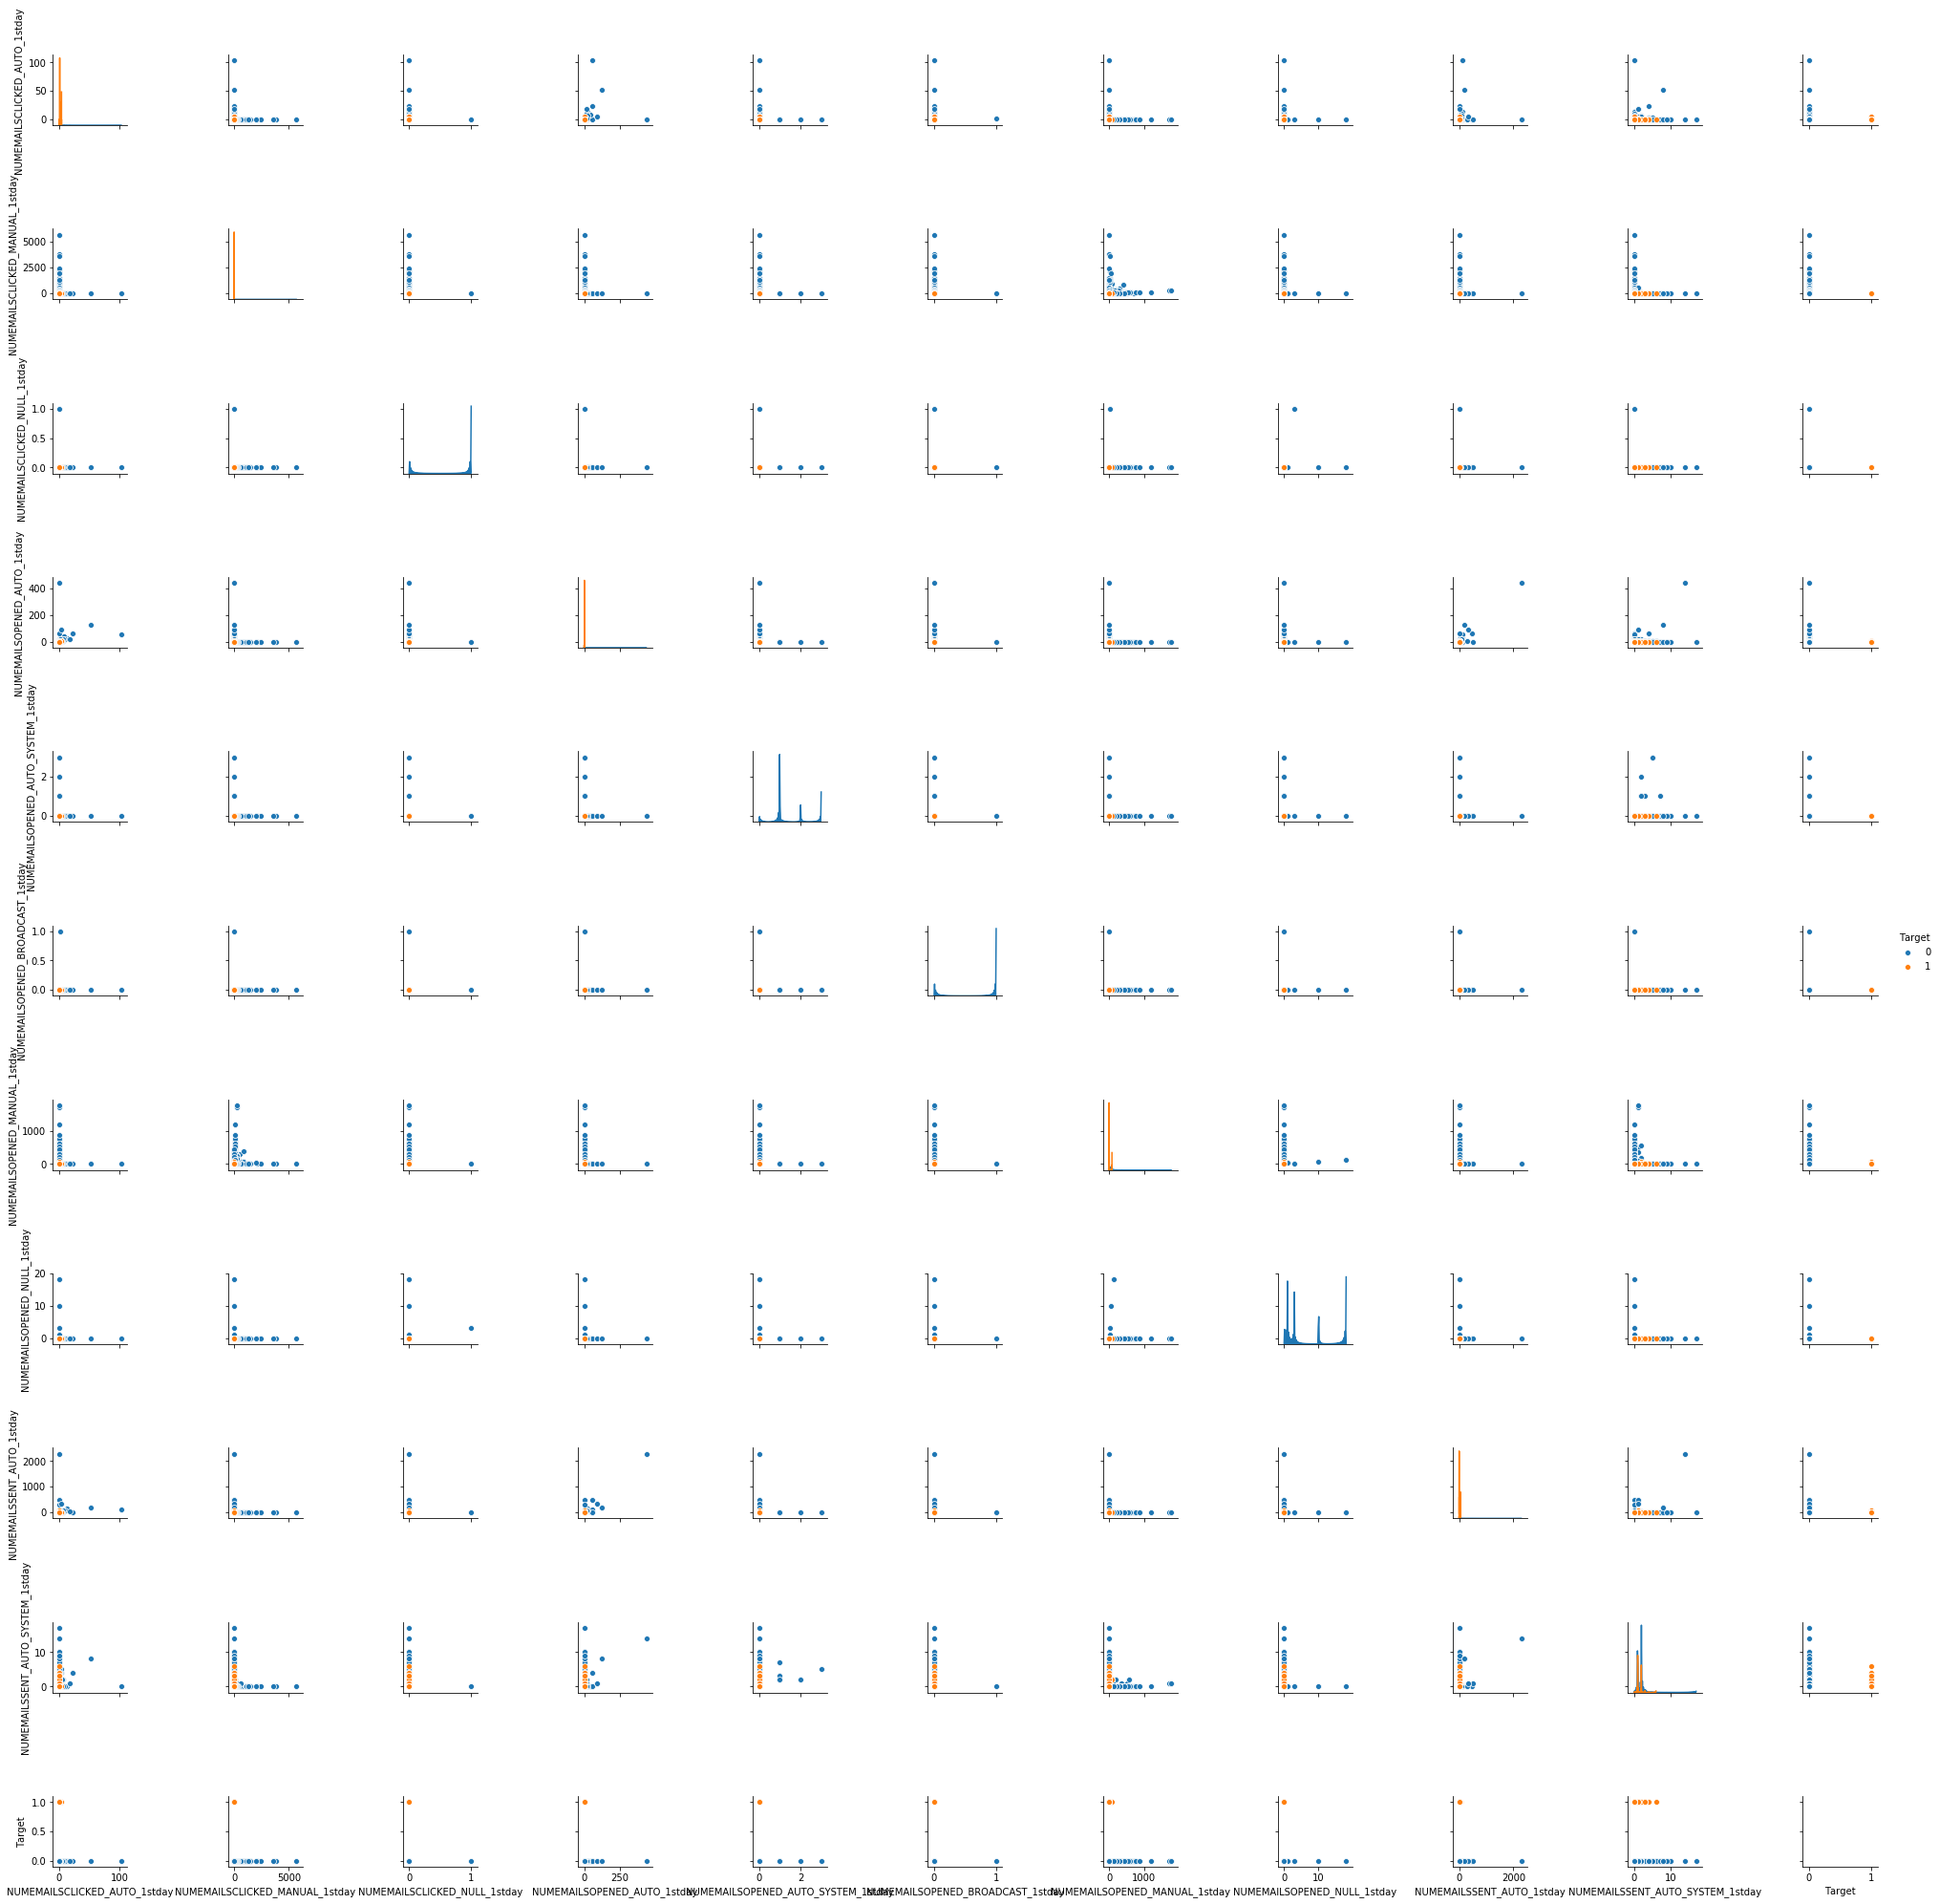

In [165]:

data = pd.concat([merge_emails_data[numeric[0:10]],merge_emails_data['Target']],axis=1)
plt.figure(figsize=(20,20))
sns.pairplot(data, hue='Target')

# fig = plt.figure(figsize = (30,30))
# ax2 = fig.gca()
# tdata=merge_emails_data[numeric]
# #tdata_scale=(tdata-tdata.mean())/tdata.std()
# tdata[numeric].hist(ax = ax2)

# Merging both data

In [271]:
mergedata = pd.merge(sample_usage_first3days_final,freetrialappdata_new,how='left',left_on='appname',right_on='app_name')

In [272]:
mergedata.shape

(28028, 177)

In [273]:
mergedata.describe()

,NUM_CONTACTS,NUMEMAILSSENT_AUTO,NUMCONTACTSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMCONTACTSSENT_MANUAL,NUMEMAILSSENT_AUTO_SYSTEM,NUMCONTACTSSENT_AUTO_SYSTEM,NUMEMAILS_RECEIVED,NUMCONTACTS_RECEIVED,NUMEMAILSOPENED_AUTO,...,USER_LOGINS_diff2ndand3rd,merchant_infu_created_diff1stand2nd,merchant_infu_created_diff2ndand3rd,funnel_created_diff1stand2nd,funnel_created_diff2ndand3rd,broadcasts_created_diff1stand2nd,broadcasts_created_diff2ndand3rd,actions_created_diff1stand2nd,actions_created_diff2ndand3rd,Target
count,2.802800e+04,28028.000000,28028.000000,28028.000000,28028.000000,28028.000000,28028.000000,28028.000000,28028.000000,28028.000000,...,28028.000000,28028.000000,28028.000000,28028.000000,28028.000000,28028.000000,28028.000000,28028.000000,28028.000000,28028.000000
mean,1.475121e+02,0.579028,0.444270,71.770372,59.102148,0.393499,0.269695,0.027936,0.001070,0.125410,...,-0.185422,-0.192343,-0.147602,-0.105823,-0.211431,-0.148494,-0.075211,-0.006422,-0.007029,0.058442
std,6.289570e+03,24.581653,18.111753,1743.675530,663.940813,1.098351,0.490331,3.501266,0.062639,4.749553,...,0.456451,4.807650,3.087307,2.536578,2.089046,1.152483,0.679364,0.260426,0.202000,0.234581
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.000000,-254.000000,-280.000000,-73.000000,-120.000000,-34.000000,-26.000000,-12.000000,-10.000000,0.000000
25%,4.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000e+00,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000003e+06,2285.000000,2282.000000,247997.000000,65243.000000,125.000000,12.000000,565.000000,7.000000,487.000000,...,3.000000,280.000000,120.000000,120.000000,79.000000,27.000000,15.000000,9.000000,12.000000,1.000000


In [274]:
mergedata['Target'].value_counts()

0    26390
1     1638
Name: Target, dtype: int64

In [277]:

# take random sample from free trial data from usagedata

def stratified_sample_df(df, col, n_samples):
    #n = min(n_samples, df[col].value_counts().max())
    df_1 = df.groupby(col).get_group(1).sample(n_samples)
    df_2 = df.groupby(col).get_group(0).sample(10*n_samples)
    df_=pd.concat([df_1,df_2])
    #df_.index = df_.index.droplevel(0)
    return df_

sample = stratified_sample_df(mergedata, 'Target', 250)

In [278]:
sample.shape

(2750, 177)

In [279]:
sample['Target'].value_counts()

0    2500
1     250
Name: Target, dtype: int64

In [280]:
sample.describe()

,NUM_CONTACTS,NUMEMAILSSENT_AUTO,NUMCONTACTSSENT_AUTO,NUMEMAILSSENT_MANUAL,NUMCONTACTSSENT_MANUAL,NUMEMAILSSENT_AUTO_SYSTEM,NUMCONTACTSSENT_AUTO_SYSTEM,NUMEMAILS_RECEIVED,NUMCONTACTS_RECEIVED,NUMEMAILSOPENED_AUTO,...,USER_LOGINS_diff2ndand3rd,merchant_infu_created_diff1stand2nd,merchant_infu_created_diff2ndand3rd,funnel_created_diff1stand2nd,funnel_created_diff2ndand3rd,broadcasts_created_diff1stand2nd,broadcasts_created_diff2ndand3rd,actions_created_diff1stand2nd,actions_created_diff2ndand3rd,Target
count,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,...,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000,2750.000000
mean,104.906182,0.588000,0.516000,85.229091,64.055636,0.415273,0.257818,0.010545,0.005091,0.289818,...,-0.176727,-0.177091,-0.133818,-0.110545,-0.198545,-0.133091,-0.065091,-0.009818,-0.003273,0.090909
std,840.751869,17.844262,15.621673,1662.774508,780.423245,2.527244,0.523096,0.319543,0.159493,9.588856,...,0.466448,4.044440,3.261421,2.380990,2.135599,1.036140,0.783921,0.246278,0.260795,0.287532
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,-4.000000,-82.000000,-51.000000,-36.000000,-58.000000,-12.000000,-18.000000,-6.000000,-4.000000,0.000000
25%,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,28396.000000,866.000000,741.000000,82026.000000,28997.000000,125.000000,12.000000,12.000000,7.000000,487.000000,...,2.000000,51.000000,120.000000,58.000000,52.000000,18.000000,14.000000,4.000000,12.000000,1.000000


In [281]:
dtypes = pd.DataFrame(sample.dtypes.rename('type')).reset_index().astype('str')

numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric))]['index'].values

print(len(numeric),len(categorical))

133 44


In [282]:
emptycolumns=[]
for each in numeric:
    if sample[each].sum()==0:
        emptycolumns.append(each)
emptycolumns  

['NUMEMAILSOPENED_BROADCAST',
 'NUMCONTACTSOPENED_BROADCAST',
 'NUMEMAILSOPENED_NULL',
 'NUMEMAILSCLICKED_NULL',
 'WEB_ANALYTICS_UNIQUE_CUSTOMERS',
 'campaigns_created']

In [283]:
sample.drop(emptycolumns,axis=1,inplace=True)

In [284]:
dtypes = pd.DataFrame(sample.dtypes.rename('type')).reset_index().astype('str')

numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric))]['index'].values

print(len(numeric),len(categorical))

127 44


<Figure size 1440x1440 with 0 Axes>

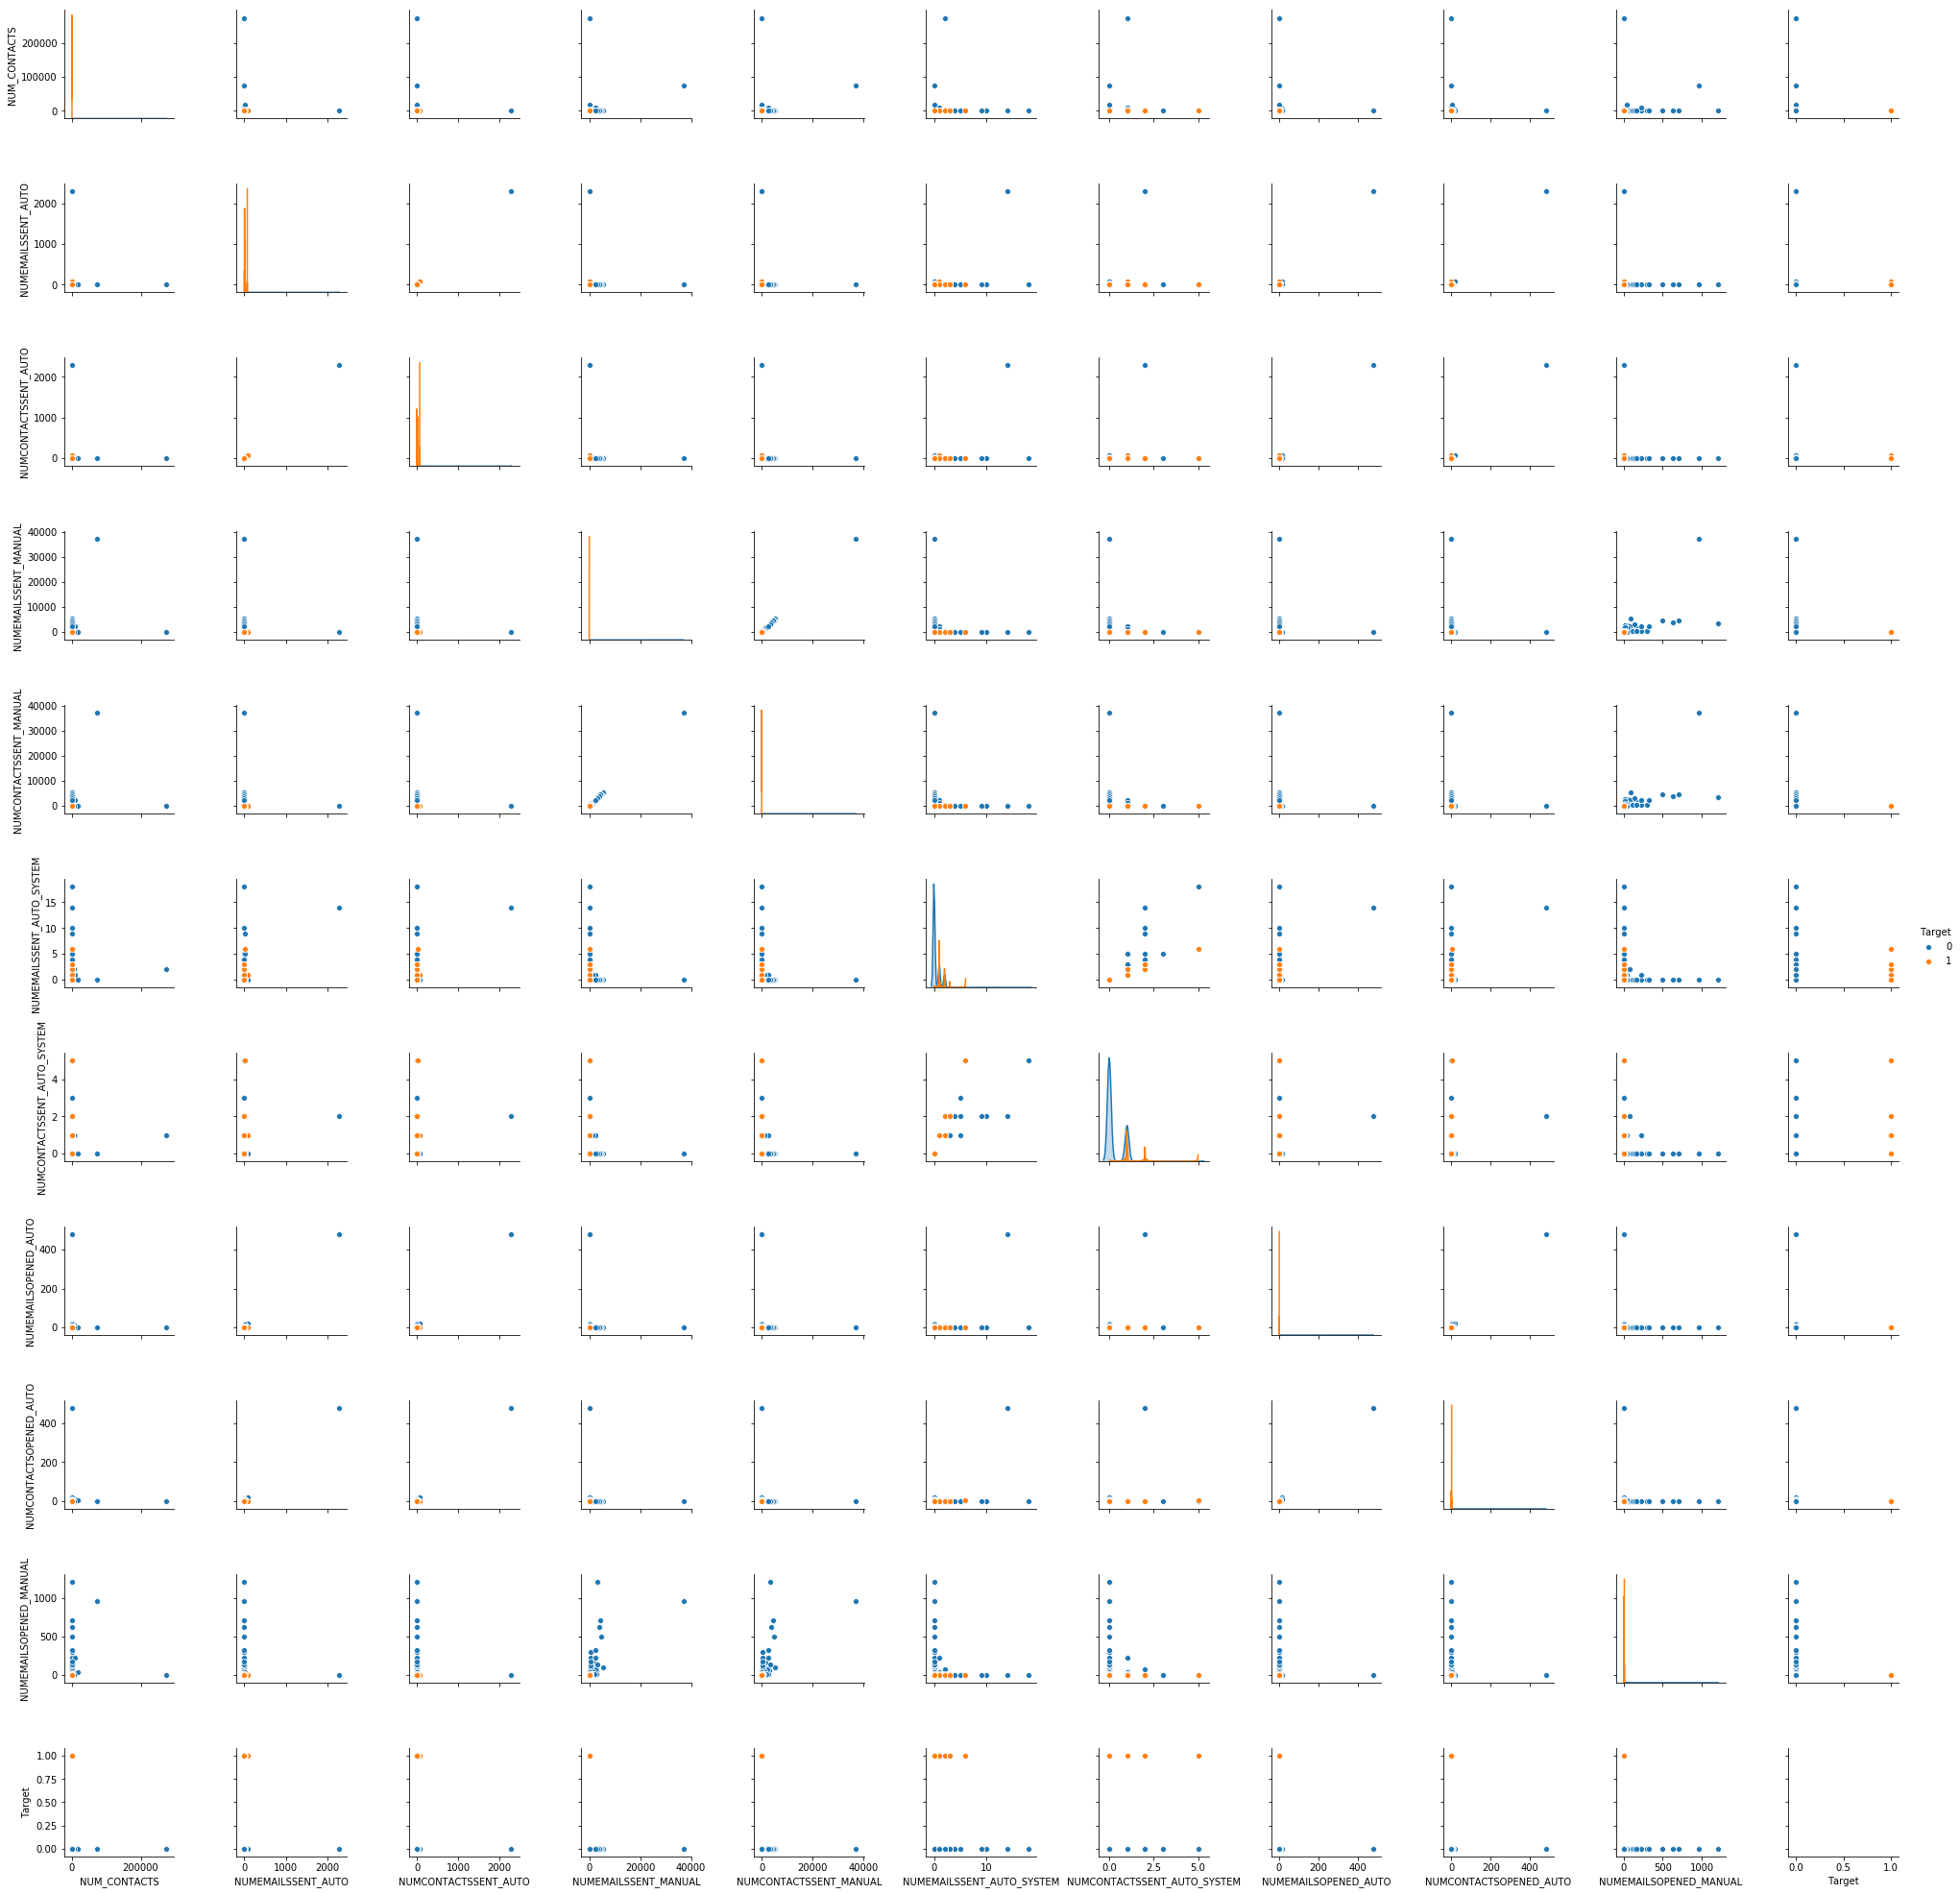

In [676]:
data = pd.concat([sample[numeric[0:10]],sample['Target']],axis=1)
data
plt.figure(figsize=(20,20))
sns.pairplot(data, hue='Target')
# fig = pp.fig 
# fig.subplots_adjust(top=0.93, wspace=0.3)
# t = fig.suptitle('Pairwise Plots', fontsize=14)

In [100]:
# data = sample[numeric[51:57]]
# #data
# plt.figure(figsize=(20,20))
# sns.pairplot(data, hue='Target')

In [178]:
list(sample.columns)

['appname',
 'free_email',
 'NUM_CONTACTS',
 'NUMEMAILSSENT_AUTO',
 'NUMCONTACTSSENT_AUTO',
 'NUMEMAILSSENT_MANUAL',
 'NUMCONTACTSSENT_MANUAL',
 'NUMEMAILSSENT_AUTO_SYSTEM',
 'NUMCONTACTSSENT_AUTO_SYSTEM',
 'NUMEMAILS_RECEIVED',
 'NUMCONTACTS_RECEIVED',
 'NUMEMAILSOPENED_AUTO',
 'NUMCONTACTSOPENED_AUTO',
 'NUMEMAILSOPENED_MANUAL',
 'NUMCONTACTSOPENED_MANUAL',
 'NUMEMAILSCLICKED_AUTO',
 'NUMCONTACTSCLICKED_AUTO',
 'NUMEMAILSCLICKED_MANUAL',
 'NUMCONTACTSCLICKED_MANUAL',
 'CONTACTS_UPDATED',
 'PROCESSED_FLOW_ITEM_COUNT',
 'LOGIN_COUNT',
 'USER_LOGINS',
 'WEBFORM_COUNT',
 'WEBFORM_NUM_FORMS',
 'WEBFORM_NEW_CONTACTS',
 'WEBFORM_REFERRING_DOMAINS',
 'SYSTEM_EMAIL_CLK_COUNT',
 'GOAL_ACHIEVED_COUNT',
 'FLOW_RECIPIENT_COUNT',
 'CONTACT_GROUP_COUNT',
 'CONTACTS_ADDED_AUTO',
 'CONTACTS_ADDED_OTHER',
 'TOTAL_CONTACTS_ADDED_AUTO',
 'TOTAL_CONTACTS_ADDED_OTHER',
 'WEB_ANALYTICS_NUM_PAGES',
 'WEB_ANALYTICS_NUM_PAGEVIEWS',
 'WEB_ANALYTICS_UNIQUE_VISITORS',
 'WEB_ANALYTICS_UNIQUE_CONTACTS',
 'WEB_ANAL

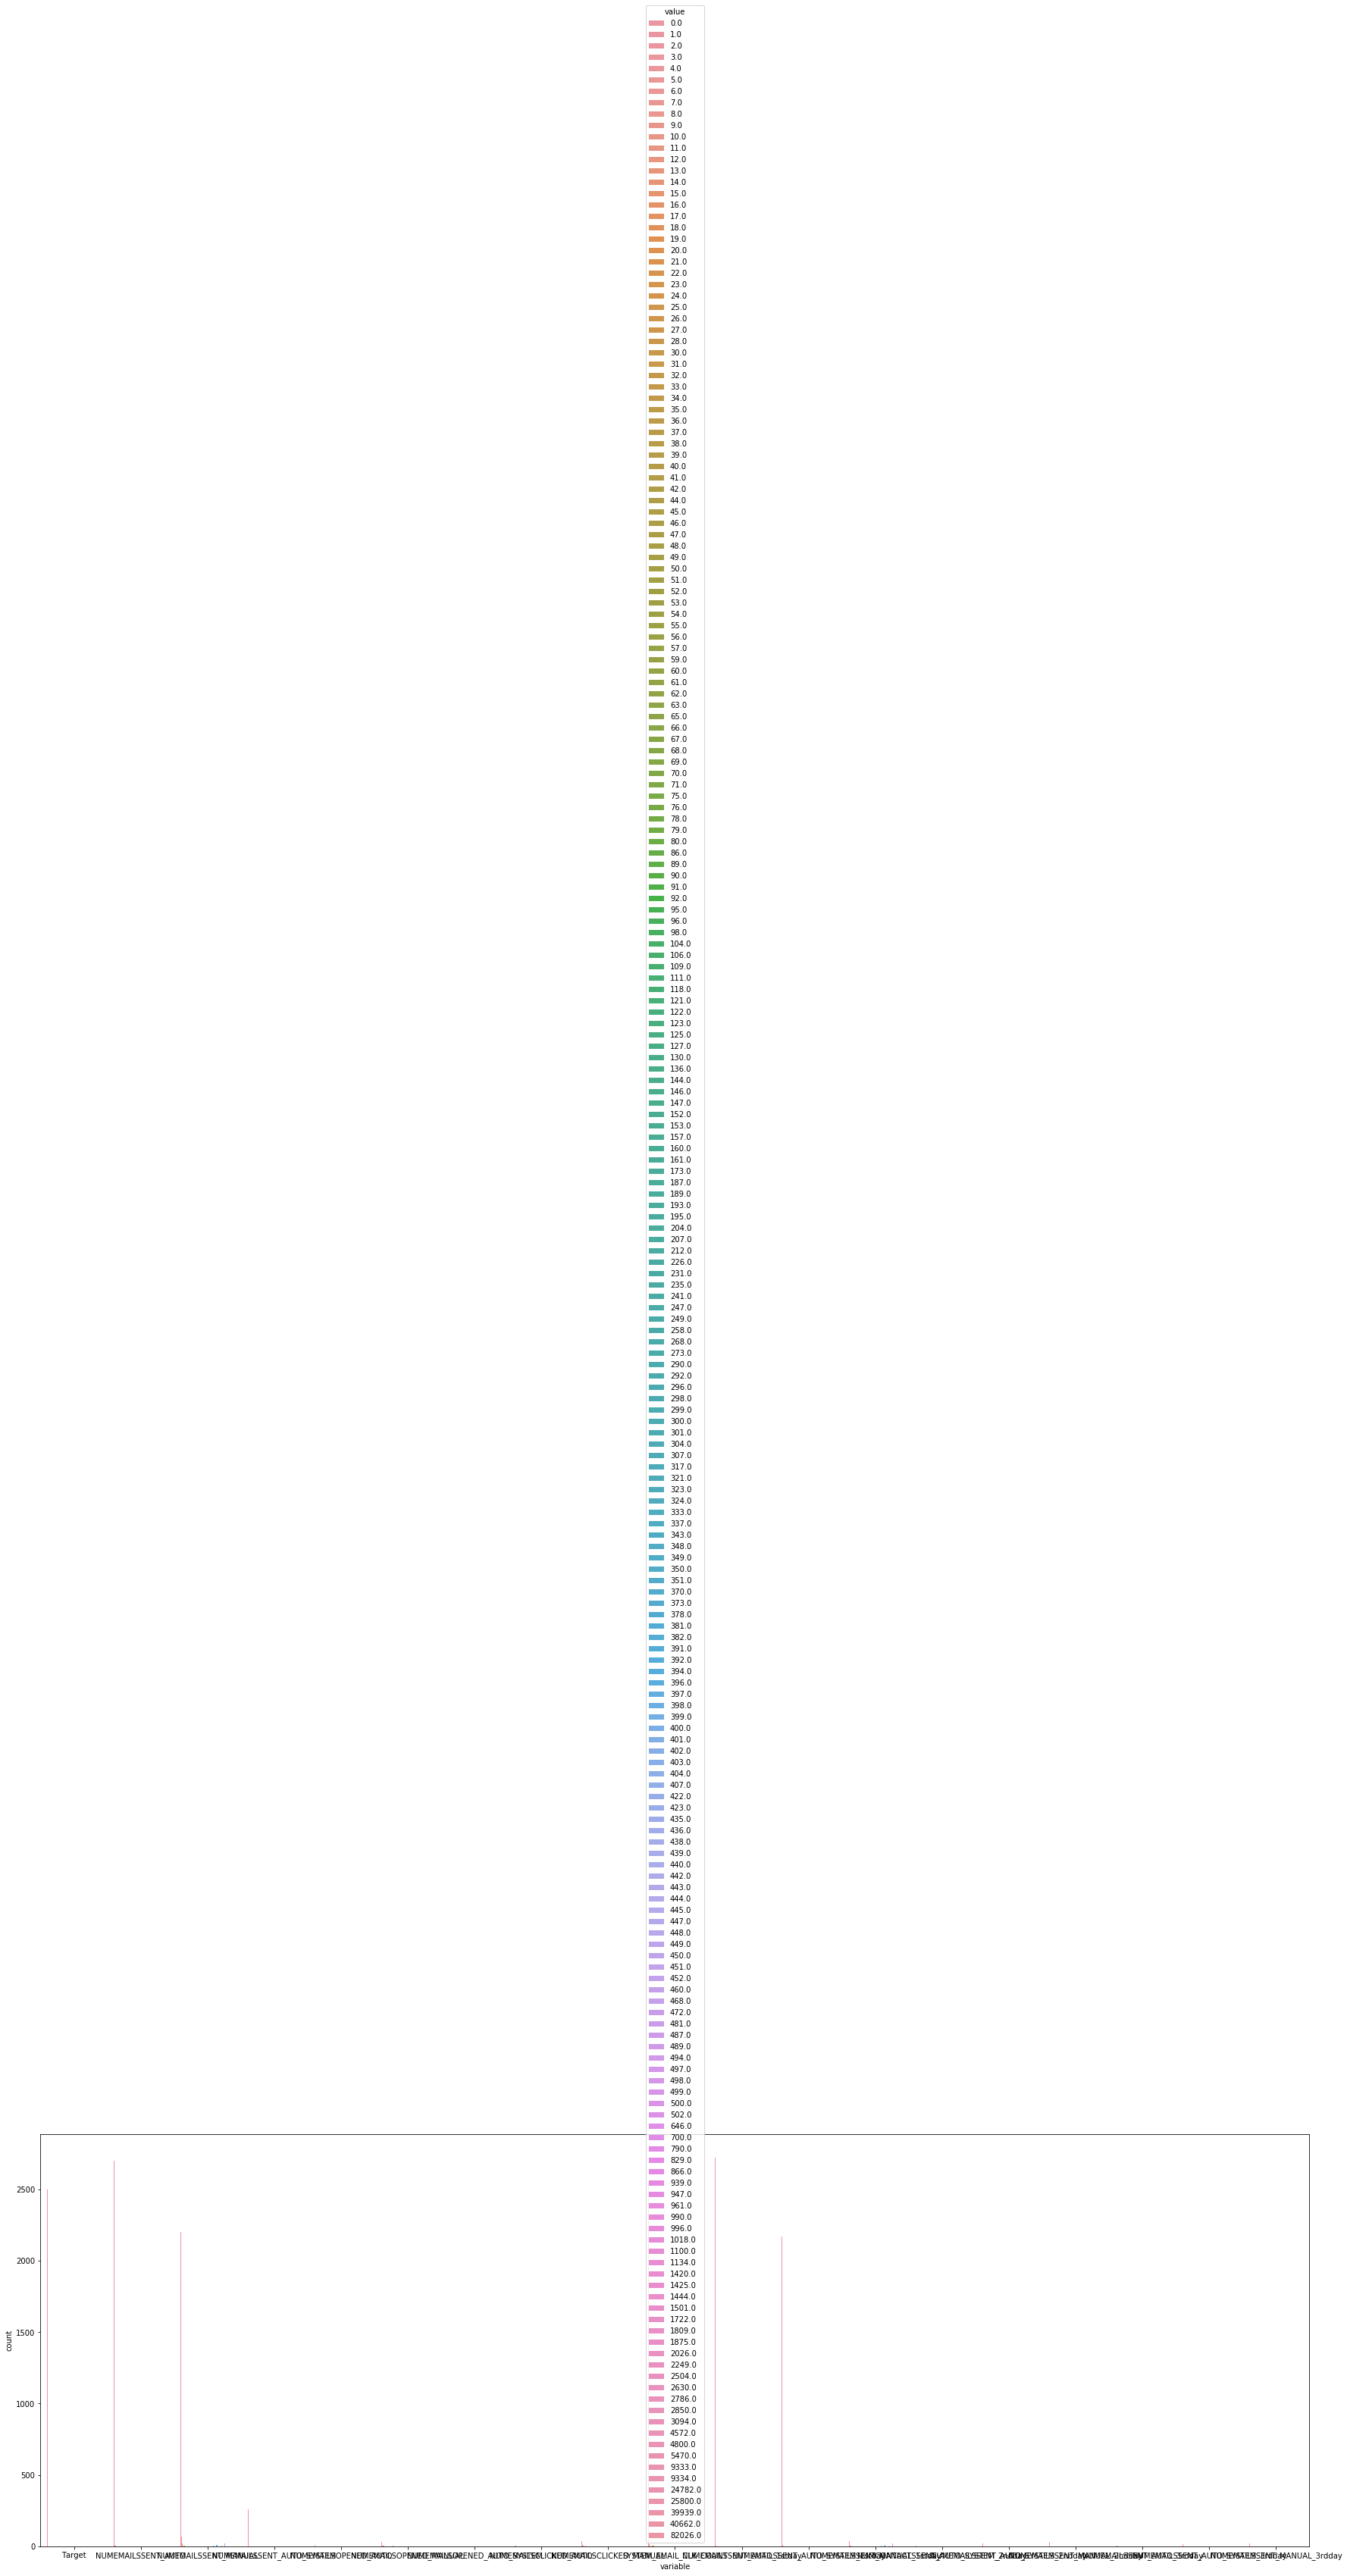

In [285]:
data=pd.DataFrame()
data = sample[['Target','NUMEMAILSSENT_AUTO','NUMEMAILSSENT_MANUAL','NUMEMAILSSENT_AUTO_SYSTEM','NUMEMAILSOPENED_AUTO','NUMEMAILSOPENED_MANUAL',
              'NUMEMAILSOPENED_AUTO_SYSTEM','NUMEMAILSCLICKED_AUTO','NUMEMAILSCLICKED_MANUAL','SYSTEM_EMAIL_CLK_COUNT',
              'NUMEMAILSSENT_AUTO_1stday','NUMEMAILSSENT_AUTO_SYSTEM_1stday','NUMEMAILSSENT_MANUAL_1stday','NUMCONTACTSSENT_AUTO_SYSTEM_2ndday',
              'NUMEMAILSSENT_AUTO_SYSTEM_2ndday','NUMEMAILSSENT_MANUAL_2ndday','NUMEMAILSSENT_AUTO_3rdday',
              'NUMEMAILSSENT_AUTO_SYSTEM_3rdday','NUMEMAILSSENT_MANUAL_3rdday']]
#data
plt.figure(figsize=(30,10))
# #data.boxplot(vert=False,hue='Target')
# sns.boxplot(data=data, orient="h", hue='Target')

df = pd.melt(data)
sns.countplot(data=df, x='variable', hue='value')

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1b37818208>,
      dtype=object)

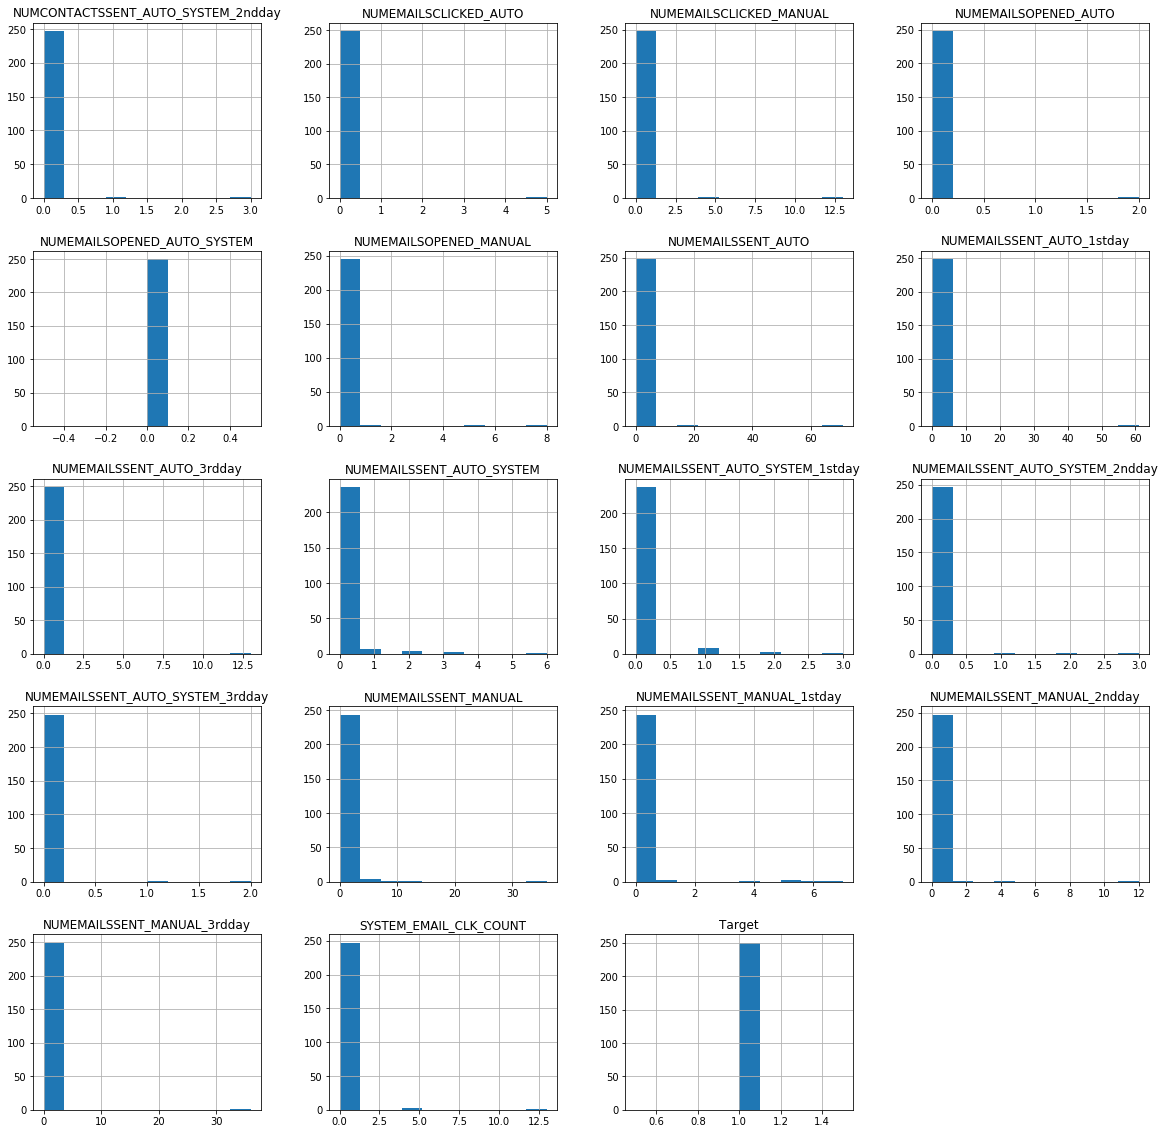

In [706]:
fig = plt.figure(figsize = (20,20))
ax2 = fig.gca()
tdata=data[data['Target']==1]
#tdata_scale=(tdata-tdata.mean())/tdata.std()
tdata.hist(ax = ax2)

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3267: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  exec(code_obj, self.user_global_ns, self.user_ns)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a437cb748>,
      dtype=object)

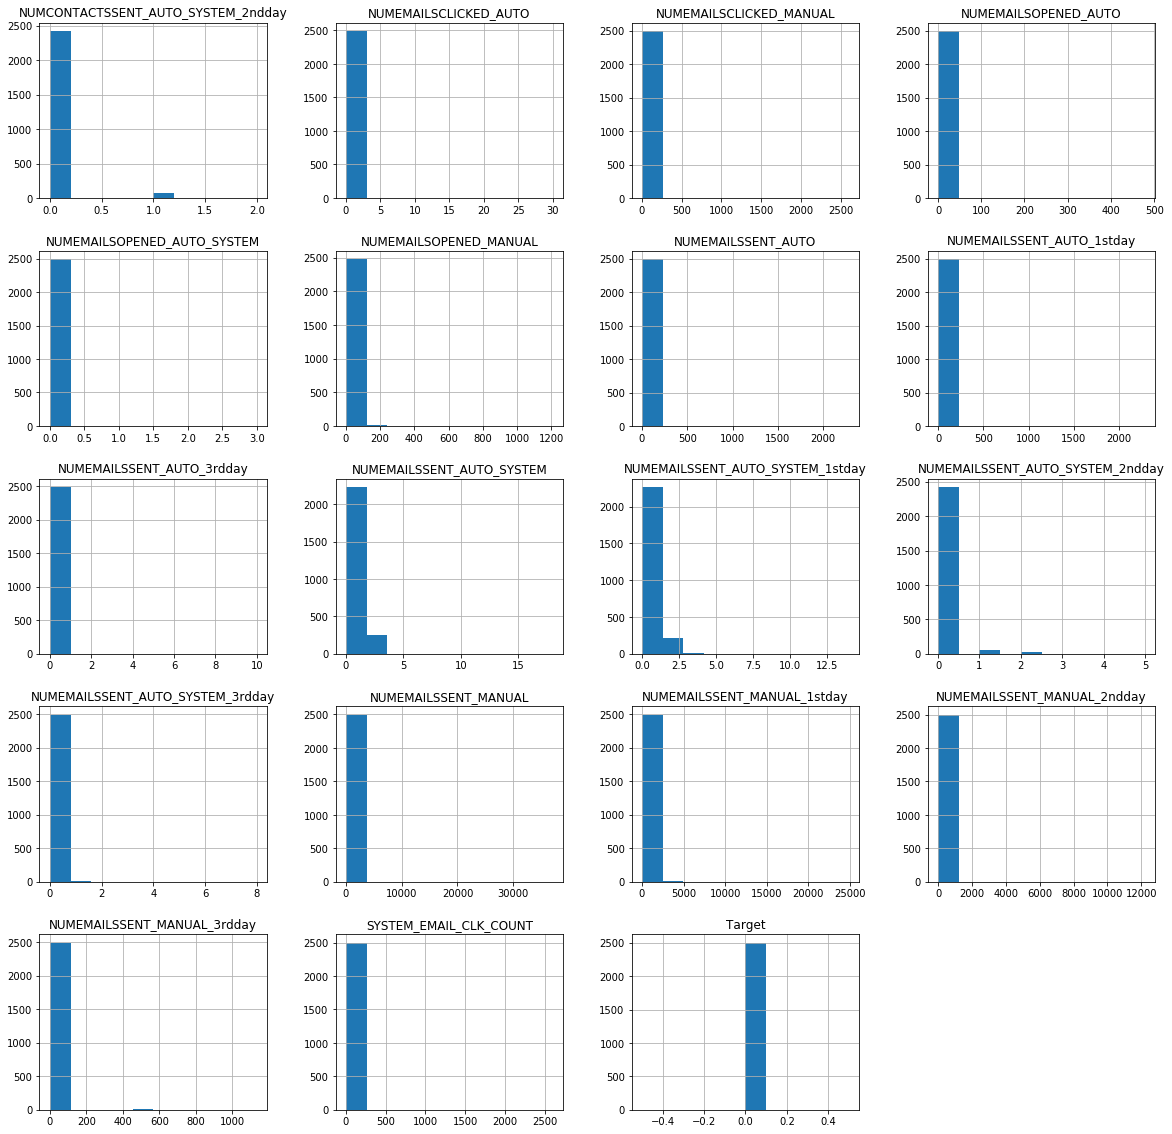

In [707]:
fig = plt.figure(figsize = (20,20))
ax2 = fig.gca()
tdata=data[data['Target']==0]
#tdata_scale=(tdata-tdata.mean())/tdata.std()
tdata.hist(ax = ax2)

In [713]:
# # Take the log of population and gdp_per_capita
# log_columns=[]
# for each in numeric[0:80]:
#     log_each=each+"_log"
#     log_columns.append(log_each)
#     sample[log_each]=np.abs((sample[each]-sample[each].min())/(sample[each].max()-sample[each].min()))
#     sample[log_each]=sample[log_each]+1
#     sample[log_each] = np.log10(sample[log_each])

# # Drop the non-transformed columns
# #df = df.drop(columns = ['pop', 'gdp_per_cap'])

In [714]:
# fig = plt.figure(figsize = (30,30))
# ax2 = fig.gca()
# tdata_log=sample[log_columns]
# #tdata_scale=(tdata_log-tdata_log.min())/(tdata_log.max()-tdata_log.min())
# tdata_log[log_columns[0:40]].hist(ax = ax2)

In [715]:
# fig = plt.figure(figsize = (30,30))
# ax2 = fig.gca()
# ndata_log=sample[log_columns]
# #tdata_scale=(tdata_log-tdata_log.mean())/tdata_log.std()
# ndata_log[log_columns[41:80]].hist(ax = ax2)

In [286]:
sample.columns

Index(['appname', 'free_email', 'NUM_CONTACTS', 'NUMEMAILSSENT_AUTO',
       'NUMCONTACTSSENT_AUTO', 'NUMEMAILSSENT_MANUAL',
       'NUMCONTACTSSENT_MANUAL', 'NUMEMAILSSENT_AUTO_SYSTEM',
       'NUMCONTACTSSENT_AUTO_SYSTEM', 'NUMEMAILS_RECEIVED',
       ...
       'opportunity_owner_name', 'opportunity_demo_date', 'trial_date',
       'contact_lead_source', 'contact_phase', 'lead_lead_source',
       'lead_converted_date', 'sales_cohort_date', 'promo_customer', 'Target'],
      dtype='object', length=171)

In [287]:
# from scipy.stats import boxcox
# from matplotlib import pyplot

# # Take the log of population and gdp_per_capita
# boxcox_columns=[]
# for each in numeric:
#     bc_each=each+"_bc"
#     boxcox_columns.append(bc_each)
#     sample[bc_each]=np.abs((sample[each]-sample[each].min())/(sample[each].max()-sample[each].min()))
#     sample[bc_each]=sample[bc_each]+1
#     sample[bc_each],lam = boxcox(sample[bc_each])


In [288]:
#boxcox_columns

In [289]:
# fig = plt.figure(figsize = (20,20))
# ax2 = fig.gca()
# tdata_log=sample[sample['Target']==1][boxcox_columns]
# #tdata_scale=(tdata_log-tdata_log.min())/(tdata_log.max()-tdata_log.min())
# tdata_log[boxcox_columns[0:20]].hist(ax = ax2)

In [290]:
sample.columns

Index(['appname', 'free_email', 'NUM_CONTACTS', 'NUMEMAILSSENT_AUTO',
       'NUMCONTACTSSENT_AUTO', 'NUMEMAILSSENT_MANUAL',
       'NUMCONTACTSSENT_MANUAL', 'NUMEMAILSSENT_AUTO_SYSTEM',
       'NUMCONTACTSSENT_AUTO_SYSTEM', 'NUMEMAILS_RECEIVED',
       ...
       'opportunity_owner_name', 'opportunity_demo_date', 'trial_date',
       'contact_lead_source', 'contact_phase', 'lead_lead_source',
       'lead_converted_date', 'sales_cohort_date', 'promo_customer', 'Target'],
      dtype='object', length=171)

In [291]:
mergedata_final=mergedata[~mergedata['appname'].isin(sample['appname'])]
mergedata_final['appname'].nunique()
mergedata_final.columns

Index(['appname', 'free_email', 'NUM_CONTACTS', 'NUMEMAILSSENT_AUTO',
       'NUMCONTACTSSENT_AUTO', 'NUMEMAILSSENT_MANUAL',
       'NUMCONTACTSSENT_MANUAL', 'NUMEMAILSSENT_AUTO_SYSTEM',
       'NUMCONTACTSSENT_AUTO_SYSTEM', 'NUMEMAILS_RECEIVED',
       ...
       'opportunity_owner_name', 'opportunity_demo_date', 'trial_date',
       'contact_lead_source', 'contact_phase', 'lead_lead_source',
       'lead_converted_date', 'sales_cohort_date', 'promo_customer', 'Target'],
      dtype='object', length=177)

In [292]:
emptycolumns=[]
for each in numeric:
    if mergedata_final[each].sum()==0:
        emptycolumns.append(each)
emptycolumns 

[]

In [293]:
mergedata_final.drop(emptycolumns,axis=1,inplace=True)

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [294]:
mergedata_final.isna().sum()/mergedata_final.shape[0]

appname                                      0.000000
free_email                                   0.000000
NUM_CONTACTS                                 0.000000
NUMEMAILSSENT_AUTO                           0.000000
NUMCONTACTSSENT_AUTO                         0.000000
NUMEMAILSSENT_MANUAL                         0.000000
NUMCONTACTSSENT_MANUAL                       0.000000
NUMEMAILSSENT_AUTO_SYSTEM                    0.000000
NUMCONTACTSSENT_AUTO_SYSTEM                  0.000000
NUMEMAILS_RECEIVED                           0.000000
NUMCONTACTS_RECEIVED                         0.000000
NUMEMAILSOPENED_AUTO                         0.000000
NUMCONTACTSOPENED_AUTO                       0.000000
NUMEMAILSOPENED_MANUAL                       0.000000
NUMCONTACTSOPENED_MANUAL                     0.000000
NUMEMAILSOPENED_BROADCAST                    0.000000
NUMCONTACTSOPENED_BROADCAST                  0.000000
NUMEMAILSOPENED_AUTO_SYSTEM                  0.000000
NUMCONTACTSOPENED_AUTO_SYSTE

In [295]:
mergedata_final.fillna("missing",inplace=True)
mergedata_final.isna().sum()/mergedata_final.shape[0]

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


appname                                      0.0
free_email                                   0.0
NUM_CONTACTS                                 0.0
NUMEMAILSSENT_AUTO                           0.0
NUMCONTACTSSENT_AUTO                         0.0
NUMEMAILSSENT_MANUAL                         0.0
NUMCONTACTSSENT_MANUAL                       0.0
NUMEMAILSSENT_AUTO_SYSTEM                    0.0
NUMCONTACTSSENT_AUTO_SYSTEM                  0.0
NUMEMAILS_RECEIVED                           0.0
NUMCONTACTS_RECEIVED                         0.0
NUMEMAILSOPENED_AUTO                         0.0
NUMCONTACTSOPENED_AUTO                       0.0
NUMEMAILSOPENED_MANUAL                       0.0
NUMCONTACTSOPENED_MANUAL                     0.0
NUMEMAILSOPENED_BROADCAST                    0.0
NUMCONTACTSOPENED_BROADCAST                  0.0
NUMEMAILSOPENED_AUTO_SYSTEM                  0.0
NUMCONTACTSOPENED_AUTO_SYSTEM                0.0
NUMEMAILSOPENED_NULL                         0.0
NUMEMAILSCLICKED_AUT

In [681]:
mergedata_final2=mergedata_final.drop(['opportunity_stage_name','opportunity_owner_name','opportunity_demo_date',
                                      'promo_customer','sales_cohort_date'],axis=1)

In [692]:
mergedata_final.shape

(25278, 177)

# X_train and X_test split

In [682]:
y=mergedata_final2['Target']
X=mergedata_final2.drop('Target',axis=1)

In [683]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1,test_size=.2)
X_train = X_train.copy()
X_test = X_test.copy()
y_train = y_train.copy()
y_test = y_test.copy()

#Modifing String values to clusters for contact lead source and lead lead source

In [684]:
def get_kvalue_train(col,df):
    from sklearn.cluster import KMeans
    from sklearn.feature_extraction.text import TfidfVectorizer
    from scipy.spatial.distance import cdist


    vectorizer = TfidfVectorizer(min_df = 1,lowercase = False, ngram_range = (1,1), use_idf = True, stop_words='english')
    #XTtrain = pd.DataFrame(tv.fit_transform(Xtrain).toarray(), columns=tv.get_feature_names())
    X = pd.DataFrame(vectorizer.fit_transform(df[col]).toarray(),columns=vectorizer.get_feature_names())
    #X = X.toarray()
    distortions=[]
    K = range(1,10)
    for k in K:
        kmeanModel = KMeans(n_clusters=k).fit(X)
        kmeanModel.fit(X)
        distortions.append(sum(np.min(cdist(X, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / X.shape[0])
    # # km = KMeans(n_clusters=3, random_state=0)
    # # km.fit_transform(features)
    # # cluster_labels = km.labels_
    # # cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel'])
    # # pd.concat([corpus_df, cluster_labels], axis=1)
    
    plt.plot(K, distortions, 'bx-')
    plt.xlabel('k')
    plt.ylabel('Distortion')
    plt.title('The Elbow Method showing the optimal k')
    plt.show()
    return X,vectorizer

In [685]:
def get_kvalue_test(col,df,vec):
    X =  pd.DataFrame(vec.transform(df[col]).toarray(),columns=vec.get_feature_names())
    #X = X.toarray()
    return X

In [686]:
def get_clusters_train(df,X,col,k):
    from sklearn.cluster import KMeans
    km = KMeans(n_clusters=k, random_state=0)
    km.fit_transform(X)
    print(X.shape)
    print(km.labels_)
    cluster_labels = km.labels_
    print(df[col].shape,"----",cluster_labels.shape)
    cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel_'+col],index=df.index)
    cluster_labels
    pd.concat([df[col], cluster_labels],axis=1)
    df2=pd.concat([df, cluster_labels],axis=1)
    return df2,km             

In [687]:
def get_clusters_test(df,X,col,km):
    km.transform(X)
#     print(X.shape)
#     print(km.labels_)
    cluster_labels = km.predict(X)
    #print(df[col].shape,"----",cluster_labels.shape)
    cluster_labels = pd.DataFrame(cluster_labels, columns=['ClusterLabel_'+col],index=df.index)
    
    pd.concat([df[col], cluster_labels],axis=1)
    df2=pd.concat([df, cluster_labels],axis=1)
    return df2             

In [688]:
def convertUrltocluster_train(colname,df):
    colname_new=colname+'_modified'
    df[colname_new]=df[colname].str.strip().str.split('[\W_]+')
    df[colname_new]=df[colname_new].astype(str)
    X,vec=get_kvalue_train(colname_new,df)
    return X,colname_new,vec

In [689]:
def convertUrltocluster_test(colname,df,vec):
    colname_new=colname+'_modified'
    df[colname_new]=df[colname].str.strip().str.split('[\W_]+')
    df[colname_new]=df[colname_new].astype(str)
    X=get_kvalue_test(colname_new,df,vec)
    return X,colname_new

# cluster for lead_lead_source

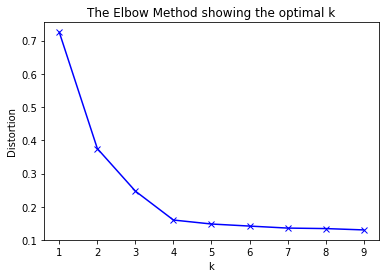

In [693]:
X_train_X,colname_new,vec=convertUrltocluster_train('lead_lead_source',X_train)
   

In [694]:
X_test_X,colname_new=convertUrltocluster_test('lead_lead_source',X_test,vec)
 

In [695]:
X_train2,km=get_clusters_train(X_train,X_train_X,colname_new,4)

(20222, 1680)
[0 1 1 ... 3 1 1]
(20222,) ---- (20222,)


In [696]:
X_test2=get_clusters_test(X_test,X_test_X,colname_new,km)

In [697]:
X_train2.columns

Index(['appname', 'free_email', 'NUM_CONTACTS', 'NUMEMAILSSENT_AUTO',
       'NUMCONTACTSSENT_AUTO', 'NUMEMAILSSENT_MANUAL',
       'NUMCONTACTSSENT_MANUAL', 'NUMEMAILSSENT_AUTO_SYSTEM',
       'NUMCONTACTSSENT_AUTO_SYSTEM', 'NUMEMAILS_RECEIVED',
       ...
       'actions_created_diff2ndand3rd', 'actions_created_diff2ndand3rd_trend',
       'app_name', 'trial_date', 'contact_lead_source', 'contact_phase',
       'lead_lead_source', 'lead_converted_date', 'lead_lead_source_modified',
       'ClusterLabel_lead_lead_source_modified'],
      dtype='object', length=173)

In [698]:
X_test2.columns

Index(['appname', 'free_email', 'NUM_CONTACTS', 'NUMEMAILSSENT_AUTO',
       'NUMCONTACTSSENT_AUTO', 'NUMEMAILSSENT_MANUAL',
       'NUMCONTACTSSENT_MANUAL', 'NUMEMAILSSENT_AUTO_SYSTEM',
       'NUMCONTACTSSENT_AUTO_SYSTEM', 'NUMEMAILS_RECEIVED',
       ...
       'actions_created_diff2ndand3rd', 'actions_created_diff2ndand3rd_trend',
       'app_name', 'trial_date', 'contact_lead_source', 'contact_phase',
       'lead_lead_source', 'lead_converted_date', 'lead_lead_source_modified',
       'ClusterLabel_lead_lead_source_modified'],
      dtype='object', length=173)

#cluster for contact_lead_source

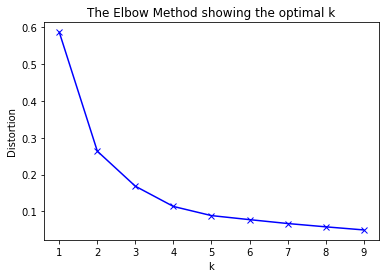

In [699]:
X_train2_X,colname_new,vec=convertUrltocluster_train('contact_lead_source',X_train2)

In [700]:
X_test2_X,colname_new=convertUrltocluster_test('contact_lead_source',X_test2,vec)
 

In [701]:
X_train3,km=get_clusters_train(X_train2,X_train2_X,colname_new,4)

(20222, 636)
[3 1 1 ... 2 1 1]
(20222,) ---- (20222,)


In [702]:
X_test3=get_clusters_test(X_test2,X_test2_X,colname_new,km)

In [703]:
print(X_train3.shape)
print(X_test3.shape)

(20222, 175)
(5056, 175)


In [704]:
dtypes = pd.DataFrame(X_train3.dtypes.rename('type')).reset_index().astype('str')

numeric = dtypes[(dtypes.type.isin(['int64', 'float64']))]['index'].values
categorical = dtypes[~(dtypes['index'].isin(numeric))]['index'].values

print(len(numeric),len(categorical))

132 43


In [705]:
numeric

array(['NUM_CONTACTS', 'NUMEMAILSSENT_AUTO', 'NUMCONTACTSSENT_AUTO',
       'NUMEMAILSSENT_MANUAL', 'NUMCONTACTSSENT_MANUAL',
       'NUMEMAILSSENT_AUTO_SYSTEM', 'NUMCONTACTSSENT_AUTO_SYSTEM',
       'NUMEMAILS_RECEIVED', 'NUMCONTACTS_RECEIVED',
       'NUMEMAILSOPENED_AUTO', 'NUMCONTACTSOPENED_AUTO',
       'NUMEMAILSOPENED_MANUAL', 'NUMCONTACTSOPENED_MANUAL',
       'NUMEMAILSOPENED_BROADCAST', 'NUMCONTACTSOPENED_BROADCAST',
       'NUMEMAILSOPENED_AUTO_SYSTEM', 'NUMCONTACTSOPENED_AUTO_SYSTEM',
       'NUMEMAILSOPENED_NULL', 'NUMEMAILSCLICKED_AUTO',
       'NUMCONTACTSCLICKED_AUTO', 'NUMEMAILSCLICKED_MANUAL',
       'NUMCONTACTSCLICKED_MANUAL', 'NUMEMAILSCLICKED_NULL',
       'CONTACTS_UPDATED', 'PROCESSED_FLOW_ITEM_COUNT', 'LOGIN_COUNT',
       'USER_LOGINS', 'WEBFORM_COUNT', 'WEBFORM_NUM_FORMS',
       'WEBFORM_NEW_CONTACTS', 'WEBFORM_REFERRING_DOMAINS',
       'SYSTEM_EMAIL_CLK_COUNT', 'GOAL_ACHIEVED_COUNT',
       'FLOW_RECIPIENT_COUNT', 'CONTACT_GROUP_COUNT',
       'CONTACTS_AD

In [706]:
categorical

array(['appname', 'free_email', 'date_1stday', 'date_2ndday',
       'date_3rdday', 'CONTACTS_UPDATED_diff1stand2nd_trend',
       'CONTACTS_UPDATED_diff2ndand3rd_trend',
       'NUMEMAILSSENT_AUTO_diff1stand2nd_trend',
       'NUMEMAILSSENT_AUTO_diff2ndand3rd_trend',
       'NUMEMAILSSENT_MANUAL_diff1stand2nd_trend',
       'NUMEMAILSSENT_MANUAL_diff2ndand3rd_trend',
       'NUMEMAILS_RECEIVED_diff1stand2nd_trend',
       'NUMEMAILS_RECEIVED_diff2ndand3rd_trend',
       'NUMEMAILSSENT_AUTO_SYSTEM_diff1stand2nd_trend',
       'NUMEMAILSSENT_AUTO_SYSTEM_diff2ndand3rd_trend',
       'TOTAL_CONTACTS_ADDED_OTHER_diff1stand2nd_trend',
       'TOTAL_CONTACTS_ADDED_OTHER_diff2ndand3rd_trend',
       'TOTAL_CONTACTS_ADDED_AUTO_diff1stand2nd_trend',
       'TOTAL_CONTACTS_ADDED_AUTO_diff2ndand3rd_trend',
       'NUMCONTACTSSENT_AUTO_SYSTEM_diff1stand2nd_trend',
       'NUMCONTACTSSENT_AUTO_SYSTEM_diff2ndand3rd_trend',
       'LOGIN_COUNT_diff1stand2nd_trend',
       'LOGIN_COUNT_diff2ndand3rd_t

#date features modify

In [707]:
datefeatures1=['trial_date','lead_converted_date','date_1stday', 'date_2ndday',
       'date_3rdday']
for c in datefeatures1:
    print("----------")
    print(c,"----",X_train3[c].dtype)

----------
trial_date ---- datetime64[ns]
----------
lead_converted_date ---- object
----------
date_1stday ---- datetime64[ns]
----------
date_2ndday ---- object
----------
date_3rdday ---- object


In [708]:
X_train3[datefeatures1].head()

,trial_date,lead_converted_date,date_1stday,date_2ndday,date_3rdday
24304,2017-12-11 16:22:56,2017-12-11 00:00:00,2017-12-11,2017-12-12 00:00:00,2017-12-13 00:00:00
12844,2018-12-07 16:22:58,2018-12-07 00:00:00,2018-12-07,2018-12-08 00:00:00,2018-12-09 00:00:00
10774,2018-10-14 14:03:58,2018-10-14 00:00:00,2018-10-14,2018-10-15 00:00:00,2018-10-16 00:00:00
11354,2018-06-20 20:03:23,2018-06-20 00:00:00,2018-06-20,2018-06-21 00:00:00,2018-06-22 00:00:00
5694,2018-12-10 08:38:54,2018-12-10 00:00:00,2018-12-10,2018-12-11 00:00:00,2018-12-12 00:00:00


In [709]:
print('lead_converted_date',"------",len(X_train3[X_train3['lead_converted_date']=="missing"]))
#print('sales_cohort_date',"------",len(X_train3[X_train3['sales_cohort_date']=="missing"]))

lead_converted_date ------ 429


In [710]:
X_train3['lead_converted_date_imp']=X_train3['lead_converted_date'].copy()

In [711]:
X_test3['lead_converted_date_imp']=X_test3['lead_converted_date'].copy()

In [712]:
X_train3['lead_converted_date_imp'] = np.where(X_train3['lead_converted_date_imp']=="missing", pd.to_datetime(X_train3['trial_date'].astype(str), errors='coerce'),  pd.to_datetime(X_train3['lead_converted_date'].astype(str), errors='coerce'))

In [713]:
X_test3['lead_converted_date_imp'] = np.where(X_test3['lead_converted_date_imp']=="missing", pd.to_datetime(X_test3['trial_date'].astype(str), errors='coerce'),  pd.to_datetime(X_test3['lead_converted_date'].astype(str), errors='coerce'))

In [641]:
#X_train3[X_train3['lead_converted_date']=="missing"][['lead_converted_date_imp','lead_converted_date']]

In [642]:
# now = datetime.datetime.now()
# now.strftime('%Y-%m-%d %H:%M:%S') + ('-%02d' % (now.microsecond / 10000))

In [451]:
# X_train3['opportunity_demo_date_imp']=X_train3['opportunity_demo_date'].copy()

In [452]:
# X_train3['opportunity_demo_date_imp']=np.where(X_train3['opportunity_demo_date_imp']=="missing",now,  pd.to_datetime(X_train3['opportunity_demo_date_imp'].astype(str), errors='coerce'))


In [538]:
# X_train3['opportunity_demo_date_imp']

In [643]:
# X_train3['is_demo_done']=list(map((lambda x: 0 if x=="missing" else 1),X_train3['opportunity_demo_date']))
# X_test3['is_demo_done']=list(map((lambda x: 0 if x=="missing" else 1),X_test3['opportunity_demo_date']))

In [644]:
# X_train3['is_sales_cohort_done']=list(map((lambda x: 0 if x=="missing" else 1),X_train3['sales_cohort_date']))
# X_test3['is_sales_cohort_done']=list(map((lambda x: 0 if x=="missing" else 1),X_test3['sales_cohort_date']))

In [645]:
# X_train3.drop(['opportunity_demo_date','sales_cohort_date'],inplace=True,axis=1)
# X_test3.drop(['opportunity_demo_date','sales_cohort_date'],inplace=True,axis=1)

In [714]:
X_train3.drop(['lead_converted_date'],inplace=True,axis=1)
X_test3.drop(['lead_converted_date'],inplace=True,axis=1)

In [715]:
final_datefeatures=['lead_converted_date_imp','date_1stday', 'date_2ndday','date_3rdday']

In [716]:
# replace missing values in day2 and day3 dates with large values-- current date

In [717]:
X_train3['date_2ndday'].replace(0, datetime.datetime.now(),inplace=True)
X_train3['date_3rdday'].replace(0, datetime.datetime.now(),inplace=True)
X_test3['date_2ndday'].replace(0, datetime.datetime.now(),inplace=True)
X_test3['date_3rdday'].replace(0, datetime.datetime.now(),inplace=True)


In [718]:
for c in final_datefeatures:
    print("----------")
    X_train3[c] = pd.to_datetime(X_train3[c])
    X_test3[c] = pd.to_datetime(X_test3[c])    
    

----------
----------
----------
----------


In [719]:
print(X_train3.shape)
print(X_test3.shape)

(20222, 175)
(5056, 175)


In [720]:
# calculate days difference

In [721]:
ndays_columns_set=set()
def calnumberofdays(dataset):
    
    for each in final_datefeatures:
        ndayseach='ndays_'+each
        ndays_columns_set.add(ndayseach)
        dataset[ndayseach]=(dataset[each].dt.date-dataset['trial_date'].dt.date).dt.days


In [722]:
calnumberofdays(X_train3)
calnumberofdays(X_test3)

In [723]:
ndays_columns_set

{'ndays_date_1stday',
 'ndays_date_2ndday',
 'ndays_date_3rdday',
 'ndays_lead_converted_date_imp'}

In [724]:
print(X_train3.shape)
print(X_test3.shape)

(20222, 179)
(5056, 179)


In [725]:
list(X_train3.columns)

['appname',
 'free_email',
 'NUM_CONTACTS',
 'NUMEMAILSSENT_AUTO',
 'NUMCONTACTSSENT_AUTO',
 'NUMEMAILSSENT_MANUAL',
 'NUMCONTACTSSENT_MANUAL',
 'NUMEMAILSSENT_AUTO_SYSTEM',
 'NUMCONTACTSSENT_AUTO_SYSTEM',
 'NUMEMAILS_RECEIVED',
 'NUMCONTACTS_RECEIVED',
 'NUMEMAILSOPENED_AUTO',
 'NUMCONTACTSOPENED_AUTO',
 'NUMEMAILSOPENED_MANUAL',
 'NUMCONTACTSOPENED_MANUAL',
 'NUMEMAILSOPENED_BROADCAST',
 'NUMCONTACTSOPENED_BROADCAST',
 'NUMEMAILSOPENED_AUTO_SYSTEM',
 'NUMCONTACTSOPENED_AUTO_SYSTEM',
 'NUMEMAILSOPENED_NULL',
 'NUMEMAILSCLICKED_AUTO',
 'NUMCONTACTSCLICKED_AUTO',
 'NUMEMAILSCLICKED_MANUAL',
 'NUMCONTACTSCLICKED_MANUAL',
 'NUMEMAILSCLICKED_NULL',
 'CONTACTS_UPDATED',
 'PROCESSED_FLOW_ITEM_COUNT',
 'LOGIN_COUNT',
 'USER_LOGINS',
 'WEBFORM_COUNT',
 'WEBFORM_NUM_FORMS',
 'WEBFORM_NEW_CONTACTS',
 'WEBFORM_REFERRING_DOMAINS',
 'SYSTEM_EMAIL_CLK_COUNT',
 'GOAL_ACHIEVED_COUNT',
 'FLOW_RECIPIENT_COUNT',
 'CONTACT_GROUP_COUNT',
 'CONTACTS_ADDED_AUTO',
 'CONTACTS_ADDED_OTHER',
 'TOTAL_CONTACTS_ADD

In [727]:
X_train3['trial_qtr']=X_train3['trial_date'].dt.quarter
X_train3['trial_weekday'] = X_train3['trial_date'].dt.weekday_name
X_train3['trial_month'] = X_train3['trial_date'].dt.month_name()

In [728]:
X_test3['trial_qtr']=X_test3['trial_date'].dt.quarter
X_test3['trial_weekday'] = X_test3['trial_date'].dt.weekday_name
X_test3['trial_month'] = X_test3['trial_date'].dt.month_name()

In [729]:
X_train4=X_train3.drop(['appname','trial_date','date_1stday','date_2ndday','date_3rdday','lead_converted_date_imp'],axis=1)
X_test4=X_test3.drop(['appname','trial_date','date_1stday','date_2ndday','date_3rdday','lead_converted_date_imp'],axis=1)

In [730]:
X_train4=X_train4.drop(['app_name','lead_lead_source','lead_lead_source_modified', 'contact_lead_source_modified','contact_lead_source'],axis=1)
X_test4=X_test4.drop(['app_name','lead_lead_source','lead_lead_source_modified', 'contact_lead_source_modified','contact_lead_source'],axis=1)


In [731]:
list(X_train4.columns)

['free_email',
 'NUM_CONTACTS',
 'NUMEMAILSSENT_AUTO',
 'NUMCONTACTSSENT_AUTO',
 'NUMEMAILSSENT_MANUAL',
 'NUMCONTACTSSENT_MANUAL',
 'NUMEMAILSSENT_AUTO_SYSTEM',
 'NUMCONTACTSSENT_AUTO_SYSTEM',
 'NUMEMAILS_RECEIVED',
 'NUMCONTACTS_RECEIVED',
 'NUMEMAILSOPENED_AUTO',
 'NUMCONTACTSOPENED_AUTO',
 'NUMEMAILSOPENED_MANUAL',
 'NUMCONTACTSOPENED_MANUAL',
 'NUMEMAILSOPENED_BROADCAST',
 'NUMCONTACTSOPENED_BROADCAST',
 'NUMEMAILSOPENED_AUTO_SYSTEM',
 'NUMCONTACTSOPENED_AUTO_SYSTEM',
 'NUMEMAILSOPENED_NULL',
 'NUMEMAILSCLICKED_AUTO',
 'NUMCONTACTSCLICKED_AUTO',
 'NUMEMAILSCLICKED_MANUAL',
 'NUMCONTACTSCLICKED_MANUAL',
 'NUMEMAILSCLICKED_NULL',
 'CONTACTS_UPDATED',
 'PROCESSED_FLOW_ITEM_COUNT',
 'LOGIN_COUNT',
 'USER_LOGINS',
 'WEBFORM_COUNT',
 'WEBFORM_NUM_FORMS',
 'WEBFORM_NEW_CONTACTS',
 'WEBFORM_REFERRING_DOMAINS',
 'SYSTEM_EMAIL_CLK_COUNT',
 'GOAL_ACHIEVED_COUNT',
 'FLOW_RECIPIENT_COUNT',
 'CONTACT_GROUP_COUNT',
 'CONTACTS_ADDED_AUTO',
 'CONTACTS_ADDED_OTHER',
 'TOTAL_CONTACTS_ADDED_AUTO',
 '

In [732]:
scale_mapper = {'None':0,
                'missing':0,
                'Phase 1':1, 
                'Phase 2':2,
                'Phase 3':3,
                'Phase 4':4, 
                'Phase 5':5,
                'Phase 6':6,
                'Phase 7':7, 
                'Phase 8':8,
                'Phase 9':9,
                'Phase 10':10, 
                'Phase 11':11,
                'Phase 12':12,
                'Phase 13':13,
               'Phase 14':14}

In [733]:
X_train4['contact_phase_Scale'] = X_train4['contact_phase'].replace(scale_mapper)
X_test4['contact_phase_Scale'] = X_test4['contact_phase'].replace(scale_mapper)

In [734]:
X_train4['contact_phase_Scale'].value_counts()

0     15701
1      1214
14      547
2       535
3       406
4       299
6       251
5       245
7       218
8       186
11      161
9       152
10      145
13       86
12       76
Name: contact_phase_Scale, dtype: int64

In [735]:
X_train5=X_train4.drop(['contact_phase'],axis=1)
X_test5=X_test4.drop(['contact_phase'],axis=1)

In [736]:
print(X_train5.shape)
print(X_test5.shape)

(20222, 171)
(5056, 171)


In [737]:
dtypes = pd.DataFrame(X_train5.dtypes.rename('type')).reset_index().astype('str')

numericorig = dtypes[(dtypes.type.isin(['int64','float64']))]['index'].values
categoricalorig = dtypes[~(dtypes['index'].isin(numericorig))]['index'].values

In [738]:
numericorig

array(['NUM_CONTACTS', 'NUMEMAILSSENT_AUTO', 'NUMCONTACTSSENT_AUTO',
       'NUMEMAILSSENT_MANUAL', 'NUMCONTACTSSENT_MANUAL',
       'NUMEMAILSSENT_AUTO_SYSTEM', 'NUMCONTACTSSENT_AUTO_SYSTEM',
       'NUMEMAILS_RECEIVED', 'NUMCONTACTS_RECEIVED',
       'NUMEMAILSOPENED_AUTO', 'NUMCONTACTSOPENED_AUTO',
       'NUMEMAILSOPENED_MANUAL', 'NUMCONTACTSOPENED_MANUAL',
       'NUMEMAILSOPENED_BROADCAST', 'NUMCONTACTSOPENED_BROADCAST',
       'NUMEMAILSOPENED_AUTO_SYSTEM', 'NUMCONTACTSOPENED_AUTO_SYSTEM',
       'NUMEMAILSOPENED_NULL', 'NUMEMAILSCLICKED_AUTO',
       'NUMCONTACTSCLICKED_AUTO', 'NUMEMAILSCLICKED_MANUAL',
       'NUMCONTACTSCLICKED_MANUAL', 'NUMEMAILSCLICKED_NULL',
       'CONTACTS_UPDATED', 'PROCESSED_FLOW_ITEM_COUNT', 'LOGIN_COUNT',
       'USER_LOGINS', 'WEBFORM_COUNT', 'WEBFORM_NUM_FORMS',
       'WEBFORM_NEW_CONTACTS', 'WEBFORM_REFERRING_DOMAINS',
       'SYSTEM_EMAIL_CLK_COUNT', 'GOAL_ACHIEVED_COUNT',
       'FLOW_RECIPIENT_COUNT', 'CONTACT_GROUP_COUNT',
       'CONTACTS_AD

In [739]:
categoricalorig

array(['free_email', 'CONTACTS_UPDATED_diff1stand2nd_trend',
       'CONTACTS_UPDATED_diff2ndand3rd_trend',
       'NUMEMAILSSENT_AUTO_diff1stand2nd_trend',
       'NUMEMAILSSENT_AUTO_diff2ndand3rd_trend',
       'NUMEMAILSSENT_MANUAL_diff1stand2nd_trend',
       'NUMEMAILSSENT_MANUAL_diff2ndand3rd_trend',
       'NUMEMAILS_RECEIVED_diff1stand2nd_trend',
       'NUMEMAILS_RECEIVED_diff2ndand3rd_trend',
       'NUMEMAILSSENT_AUTO_SYSTEM_diff1stand2nd_trend',
       'NUMEMAILSSENT_AUTO_SYSTEM_diff2ndand3rd_trend',
       'TOTAL_CONTACTS_ADDED_OTHER_diff1stand2nd_trend',
       'TOTAL_CONTACTS_ADDED_OTHER_diff2ndand3rd_trend',
       'TOTAL_CONTACTS_ADDED_AUTO_diff1stand2nd_trend',
       'TOTAL_CONTACTS_ADDED_AUTO_diff2ndand3rd_trend',
       'NUMCONTACTSSENT_AUTO_SYSTEM_diff1stand2nd_trend',
       'NUMCONTACTSSENT_AUTO_SYSTEM_diff2ndand3rd_trend',
       'LOGIN_COUNT_diff1stand2nd_trend',
       'LOGIN_COUNT_diff2ndand3rd_trend',
       'USER_LOGINS_diff1stand2nd_trend',
       'USER_L

In [740]:
categoricalorig_final1=['free_email', 'CONTACTS_UPDATED_diff1stand2nd_trend',
       'CONTACTS_UPDATED_diff2ndand3rd_trend',
       'NUMEMAILSSENT_AUTO_diff1stand2nd_trend',
       'NUMEMAILSSENT_AUTO_diff2ndand3rd_trend',
       'NUMEMAILSSENT_MANUAL_diff1stand2nd_trend',
       'NUMEMAILSSENT_MANUAL_diff2ndand3rd_trend',
       'NUMEMAILS_RECEIVED_diff1stand2nd_trend',
       'NUMEMAILS_RECEIVED_diff2ndand3rd_trend',
       'NUMEMAILSSENT_AUTO_SYSTEM_diff1stand2nd_trend',
       'NUMEMAILSSENT_AUTO_SYSTEM_diff2ndand3rd_trend',
       'TOTAL_CONTACTS_ADDED_OTHER_diff1stand2nd_trend',
       'TOTAL_CONTACTS_ADDED_OTHER_diff2ndand3rd_trend',
       'TOTAL_CONTACTS_ADDED_AUTO_diff1stand2nd_trend',
       'TOTAL_CONTACTS_ADDED_AUTO_diff2ndand3rd_trend',
       'NUMCONTACTSSENT_AUTO_SYSTEM_diff1stand2nd_trend',
       'NUMCONTACTSSENT_AUTO_SYSTEM_diff2ndand3rd_trend',
       'LOGIN_COUNT_diff1stand2nd_trend',
       'LOGIN_COUNT_diff2ndand3rd_trend',
       'USER_LOGINS_diff1stand2nd_trend',
       'USER_LOGINS_diff2ndand3rd_trend',
       'merchant_infu_created_diff1stand2nd_trend',
       'merchant_infu_created_diff2ndand3rd_trend',
       'funnel_created_diff1stand2nd_trend',
       'funnel_created_diff2ndand3rd_trend',
       'broadcasts_created_diff1stand2nd_trend',
       'broadcasts_created_diff2ndand3rd_trend',
       'actions_created_diff1stand2nd_trend',
       'actions_created_diff2ndand3rd_trend',
       'ClusterLabel_lead_lead_source_modified',
       'ClusterLabel_contact_lead_source_modified', 'trial_weekday',
       'trial_month','trial_qtr']

numeric_final1=['NUM_CONTACTS', 'NUMEMAILSSENT_AUTO', 'NUMCONTACTSSENT_AUTO',
       'NUMEMAILSSENT_MANUAL', 'NUMCONTACTSSENT_MANUAL',
       'NUMEMAILSSENT_AUTO_SYSTEM', 'NUMCONTACTSSENT_AUTO_SYSTEM',
       'NUMEMAILS_RECEIVED', 'NUMCONTACTS_RECEIVED',
       'NUMEMAILSOPENED_AUTO', 'NUMCONTACTSOPENED_AUTO',
       'NUMEMAILSOPENED_MANUAL', 'NUMCONTACTSOPENED_MANUAL',
       'NUMEMAILSOPENED_BROADCAST', 'NUMCONTACTSOPENED_BROADCAST',
       'NUMEMAILSOPENED_AUTO_SYSTEM', 'NUMCONTACTSOPENED_AUTO_SYSTEM',
       'NUMEMAILSOPENED_NULL', 'NUMEMAILSCLICKED_AUTO',
       'NUMCONTACTSCLICKED_AUTO', 'NUMEMAILSCLICKED_MANUAL',
       'NUMCONTACTSCLICKED_MANUAL', 'NUMEMAILSCLICKED_NULL',
       'CONTACTS_UPDATED', 'PROCESSED_FLOW_ITEM_COUNT', 'LOGIN_COUNT',
       'USER_LOGINS', 'WEBFORM_COUNT', 'WEBFORM_NUM_FORMS',
       'WEBFORM_NEW_CONTACTS', 'WEBFORM_REFERRING_DOMAINS',
       'SYSTEM_EMAIL_CLK_COUNT', 'GOAL_ACHIEVED_COUNT',
       'FLOW_RECIPIENT_COUNT', 'CONTACT_GROUP_COUNT',
       'CONTACTS_ADDED_AUTO', 'CONTACTS_ADDED_OTHER',
       'TOTAL_CONTACTS_ADDED_AUTO', 'TOTAL_CONTACTS_ADDED_OTHER',
       'WEB_ANALYTICS_NUM_PAGES', 'WEB_ANALYTICS_NUM_PAGEVIEWS',
       'WEB_ANALYTICS_UNIQUE_VISITORS', 'WEB_ANALYTICS_UNIQUE_CONTACTS',
       'WEB_ANALYTICS_UNIQUE_CUSTOMERS', 'WEB_ANALYTICS_TOTAL_VIEWS',
       'total_processed_usd', 'num_integrations', 'broadcasts_created',
       'campaigns_created', 'funnel_created', 'funnel_published',
       'invoice_amount', 'invoice_created', 'num_invoice_promos',
       'invoices_paid', 'lead_sources', 'actions_created',
       'autotag_config_created', 'merchant_account_created',
       'merchant_infu_created', 'number_of_notes_created',
       'number_of_tasks_created', 'CONTACTS_UPDATED_1stday',
       'LOGIN_COUNT_1stday', 'NUMCONTACTSSENT_AUTO_SYSTEM_1stday',
       'NUMEMAILSSENT_AUTO_1stday', 'NUMEMAILSSENT_AUTO_SYSTEM_1stday',
       'NUMEMAILSSENT_MANUAL_1stday', 'NUMEMAILS_RECEIVED_1stday',
       'TOTAL_CONTACTS_ADDED_AUTO_1stday',
       'TOTAL_CONTACTS_ADDED_OTHER_1stday', 'USER_LOGINS_1stday',
       'actions_created_1stday', 'broadcasts_created_1stday',
       'funnel_created_1stday', 'merchant_infu_created_1stday',
       'CONTACTS_UPDATED_2ndday', 'LOGIN_COUNT_2ndday',
       'NUMCONTACTSSENT_AUTO_SYSTEM_2ndday', 'NUMEMAILSSENT_AUTO_2ndday',
       'NUMEMAILSSENT_AUTO_SYSTEM_2ndday', 'NUMEMAILSSENT_MANUAL_2ndday',
       'NUMEMAILS_RECEIVED_2ndday', 'TOTAL_CONTACTS_ADDED_AUTO_2ndday',
       'TOTAL_CONTACTS_ADDED_OTHER_2ndday', 'USER_LOGINS_2ndday',
       'actions_created_2ndday', 'broadcasts_created_2ndday',
       'funnel_created_2ndday', 'merchant_infu_created_2ndday',
       'CONTACTS_UPDATED_3rdday', 'LOGIN_COUNT_3rdday',
       'NUMCONTACTSSENT_AUTO_SYSTEM_3rdday', 'NUMEMAILSSENT_AUTO_3rdday',
       'NUMEMAILSSENT_AUTO_SYSTEM_3rdday', 'NUMEMAILSSENT_MANUAL_3rdday',
       'NUMEMAILS_RECEIVED_3rdday', 'TOTAL_CONTACTS_ADDED_AUTO_3rdday',
       'TOTAL_CONTACTS_ADDED_OTHER_3rdday', 'USER_LOGINS_3rdday',
       'actions_created_3rdday', 'broadcasts_created_3rdday',
       'funnel_created_3rdday', 'merchant_infu_created_3rdday',
       'CONTACTS_UPDATED_diff1stand2nd', 'CONTACTS_UPDATED_diff2ndand3rd',
       'NUMEMAILSSENT_AUTO_diff1stand2nd',
       'NUMEMAILSSENT_AUTO_diff2ndand3rd',
       'NUMEMAILSSENT_MANUAL_diff1stand2nd',
       'NUMEMAILSSENT_MANUAL_diff2ndand3rd',
       'NUMEMAILS_RECEIVED_diff1stand2nd',
       'NUMEMAILS_RECEIVED_diff2ndand3rd',
       'NUMEMAILSSENT_AUTO_SYSTEM_diff1stand2nd',
       'NUMEMAILSSENT_AUTO_SYSTEM_diff2ndand3rd',
       'TOTAL_CONTACTS_ADDED_OTHER_diff1stand2nd',
       'TOTAL_CONTACTS_ADDED_OTHER_diff2ndand3rd',
       'TOTAL_CONTACTS_ADDED_AUTO_diff1stand2nd',
       'TOTAL_CONTACTS_ADDED_AUTO_diff2ndand3rd',
       'NUMCONTACTSSENT_AUTO_SYSTEM_diff1stand2nd',
       'NUMCONTACTSSENT_AUTO_SYSTEM_diff2ndand3rd',
       'LOGIN_COUNT_diff1stand2nd', 'LOGIN_COUNT_diff2ndand3rd',
       'USER_LOGINS_diff1stand2nd', 'USER_LOGINS_diff2ndand3rd',
       'merchant_infu_created_diff1stand2nd',
       'merchant_infu_created_diff2ndand3rd',
       'funnel_created_diff1stand2nd', 'funnel_created_diff2ndand3rd',
       'broadcasts_created_diff1stand2nd',
       'broadcasts_created_diff2ndand3rd',
       'actions_created_diff1stand2nd', 'actions_created_diff2ndand3rd',
       'ndays_lead_converted_date_imp', 'ndays_date_1stday',
       'ndays_date_2ndday', 'ndays_date_3rdday','contact_phase_Scale']

#ordinal=['contact_phase_Scale']

In [741]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler(with_mean=True, with_std=True)
X_trainnumss = pd.DataFrame(ss.fit_transform(X_train5[numeric_final1]), columns=['ss_'+x for x in numeric_final1],index=X_train5.index)
X_trainnumss = pd.concat([X_train5, X_trainnumss], axis=1)
X_trainnumss = X_trainnumss.drop(numeric_final1, axis=1)
X_trainnumss.head()

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,free_email,CONTACTS_UPDATED_diff1stand2nd_trend,CONTACTS_UPDATED_diff2ndand3rd_trend,NUMEMAILSSENT_AUTO_diff1stand2nd_trend,NUMEMAILSSENT_AUTO_diff2ndand3rd_trend,NUMEMAILSSENT_MANUAL_diff1stand2nd_trend,NUMEMAILSSENT_MANUAL_diff2ndand3rd_trend,NUMEMAILS_RECEIVED_diff1stand2nd_trend,NUMEMAILS_RECEIVED_diff2ndand3rd_trend,NUMEMAILSSENT_AUTO_SYSTEM_diff1stand2nd_trend,...,ss_funnel_created_diff2ndand3rd,ss_broadcasts_created_diff1stand2nd,ss_broadcasts_created_diff2ndand3rd,ss_actions_created_diff1stand2nd,ss_actions_created_diff2ndand3rd,ss_ndays_lead_converted_date_imp,ss_ndays_date_1stday,ss_ndays_date_2ndday,ss_ndays_date_3rdday,ss_contact_phase_Scale
24304,True,change,no change,no change,no change,change,no change,no change,no change,change,...,0.100934,0.12498,0.117751,0.025669,0.038106,0.10446,0.551032,-0.064621,-0.089595,-0.390365
12844,True,change,no change,no change,no change,no change,no change,no change,no change,no change,...,0.100934,0.12498,0.117751,0.025669,0.038106,0.10446,0.551032,-0.064621,-0.089595,-0.071030
10774,False,no change,no change,no change,no change,no change,no change,no change,no change,no change,...,0.100934,0.12498,0.117751,0.025669,0.038106,0.10446,0.551032,-0.064621,-0.089595,-0.390365
11354,False,change,no change,no change,no change,no change,no change,no change,no change,no change,...,0.100934,0.12498,0.117751,0.025669,0.038106,0.10446,0.551032,-0.064621,-0.089595,-0.390365
5694,True,change,no change,no change,no change,no change,no change,no change,no change,no change,...,0.100934,0.12498,0.117751,0.025669,0.038106,0.10446,0.551032,-0.064621,-0.089595,-0.390365


In [742]:
X_testss = pd.DataFrame(ss.transform(X_test5[numeric_final1]), columns=['ss_'+x for x in numeric_final1],index=X_test5.index)
X_testss = pd.concat([X_test5, X_testss], axis=1)
X_testss = X_testss.drop(numeric_final1, axis=1)
X_testss.head()

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """Entry point for launching an IPython kernel.


,free_email,CONTACTS_UPDATED_diff1stand2nd_trend,CONTACTS_UPDATED_diff2ndand3rd_trend,NUMEMAILSSENT_AUTO_diff1stand2nd_trend,NUMEMAILSSENT_AUTO_diff2ndand3rd_trend,NUMEMAILSSENT_MANUAL_diff1stand2nd_trend,NUMEMAILSSENT_MANUAL_diff2ndand3rd_trend,NUMEMAILS_RECEIVED_diff1stand2nd_trend,NUMEMAILS_RECEIVED_diff2ndand3rd_trend,NUMEMAILSSENT_AUTO_SYSTEM_diff1stand2nd_trend,...,ss_funnel_created_diff2ndand3rd,ss_broadcasts_created_diff1stand2nd,ss_broadcasts_created_diff2ndand3rd,ss_actions_created_diff1stand2nd,ss_actions_created_diff2ndand3rd,ss_ndays_lead_converted_date_imp,ss_ndays_date_1stday,ss_ndays_date_2ndday,ss_ndays_date_3rdday,ss_contact_phase_Scale
9882,False,change,no change,no change,no change,no change,no change,no change,no change,no change,...,0.100934,0.124980,0.117751,0.025669,0.038106,0.089612,-1.814778,-0.107244,-0.124027,-0.071030
25625,True,change,no change,no change,no change,change,no change,no change,no change,no change,...,0.100934,-0.714112,0.117751,0.025669,0.038106,0.104460,0.551032,-0.064621,-0.089595,-0.390365
21472,False,change,no change,no change,no change,no change,no change,no change,no change,no change,...,0.100934,0.124980,0.117751,0.025669,0.038106,0.104460,0.551032,-0.064621,-0.089595,-0.390365
3628,True,change,no change,no change,no change,no change,no change,no change,no change,no change,...,0.100934,0.124980,0.117751,0.025669,0.038106,0.104460,0.551032,-0.064621,-0.089595,-0.071030
6562,False,change,no change,no change,no change,change,no change,no change,no change,no change,...,0.100934,-1.553204,0.117751,0.025669,0.038106,0.104460,0.551032,-0.064621,-0.089595,-0.390365


In [743]:
# from sklearn.preprocessing import OneHotEncoder
# ohe = OneHotEncoder(sparse=False, dtype=int,handle_unknown='ignore')
# X_trainss = pd.DataFrame(ohe.fit_transform(X_trainnumss[categoricalorig_final].astype(str)), columns=ohe.get_feature_names(),index=X_trainnumss.index)
# X_trainss = pd.concat([X_trainnumss, X_trainss], axis=1)
# X_trainss = X_trainss.drop(categorical, axis=1)
# X_trainss.head()



X_trainss_cat = pd.get_dummies(X_trainnumss[categoricalorig_final1], drop_first=True) # dummy_na=True
X_trainss_cat = pd.concat([X_trainnumss, X_trainss_cat], axis=1)
X_trainss_cat = X_trainss_cat.drop(categoricalorig_final1, axis=1)
X_trainss_cat.head()

,ss_NUM_CONTACTS,ss_NUMEMAILSSENT_AUTO,ss_NUMCONTACTSSENT_AUTO,ss_NUMEMAILSSENT_MANUAL,ss_NUMCONTACTSSENT_MANUAL,ss_NUMEMAILSSENT_AUTO_SYSTEM,ss_NUMCONTACTSSENT_AUTO_SYSTEM,ss_NUMEMAILS_RECEIVED,ss_NUMCONTACTS_RECEIVED,ss_NUMEMAILSOPENED_AUTO,...,trial_month_December,trial_month_February,trial_month_January,trial_month_July,trial_month_June,trial_month_March,trial_month_May,trial_month_November,trial_month_October,trial_month_September
24304,-0.021088,-0.024073,-0.024979,-0.037598,-0.088169,2.002797,1.487675,-0.00905,-0.017793,-0.027695,...,1,0,0,0,0,0,0,0,0,0
12844,-0.021768,-0.024073,-0.024979,-0.038151,-0.089722,-0.487170,-0.555365,-0.00905,-0.017793,-0.027695,...,1,0,0,0,0,0,0,0,0,0
10774,-0.022040,-0.024073,-0.024979,-0.038151,-0.089722,-0.487170,-0.555365,-0.00905,-0.017793,-0.027695,...,0,0,0,0,0,0,0,0,1,0
11354,-0.021360,-0.024073,-0.024979,-0.038151,-0.089722,-0.487170,-0.555365,-0.00905,-0.017793,-0.027695,...,0,0,0,0,1,0,0,0,0,0
5694,-0.021496,-0.024073,-0.024979,-0.038151,-0.089722,-0.487170,-0.555365,-0.00905,-0.017793,-0.027695,...,1,0,0,0,0,0,0,0,0,0


In [744]:
X_testss_cat = pd.get_dummies(X_testss[categoricalorig_final], drop_first=True) # dummy_na=True
X_testss_cat = pd.concat([X_testss, X_testss_cat], axis=1)
X_testss_cat = X_testss_cat.drop(categoricalorig_final, axis=1)
X_testss_cat.head()

,ss_NUM_CONTACTS,ss_NUMEMAILSSENT_AUTO,ss_NUMCONTACTSSENT_AUTO,ss_NUMEMAILSSENT_MANUAL,ss_NUMCONTACTSSENT_MANUAL,ss_NUMEMAILSSENT_AUTO_SYSTEM,ss_NUMCONTACTSSENT_AUTO_SYSTEM,ss_NUMEMAILS_RECEIVED,ss_NUMCONTACTS_RECEIVED,ss_NUMEMAILSOPENED_AUTO,...,trial_month_December,trial_month_February,trial_month_January,trial_month_July,trial_month_June,trial_month_March,trial_month_May,trial_month_November,trial_month_October,trial_month_September
9882,-0.021768,-0.024073,-0.024979,-0.038151,-0.089722,-0.48717,-0.555365,-0.00905,-0.017793,-0.027695,...,1,0,0,0,0,0,0,0,0,0
25625,0.086751,-0.024073,-0.024979,0.181625,0.526555,-0.48717,-0.555365,-0.00905,-0.017793,-0.027695,...,0,0,0,0,0,0,0,1,0,0
21472,-0.021224,-0.024073,-0.024979,-0.038151,-0.089722,-0.48717,-0.555365,-0.00905,-0.017793,-0.027695,...,0,0,0,0,1,0,0,0,0,0
3628,-0.020272,-0.024073,-0.024979,-0.038151,-0.089722,-0.48717,-0.555365,-0.00905,-0.017793,-0.027695,...,1,0,0,0,0,0,0,0,0,0
6562,-0.021224,-0.024073,-0.024979,-0.036491,-0.085065,-0.48717,-0.555365,-0.00905,-0.017793,-0.027695,...,0,0,0,0,0,0,0,0,1,0


In [745]:
main_list = np.setdiff1d(X_trainss_cat.columns,X_testss_cat.columns)
main_list

array(['NUMEMAILS_RECEIVED_diff1stand2nd_trend_no change',
       'NUMEMAILS_RECEIVED_diff2ndand3rd_trend_no change'], dtype=object)

In [746]:
# running logistic regression

In [747]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression(C=1e5, solver='lbfgs', multi_class='auto', class_weight=None)
logreg.fit(X_trainss_cat, y_train)

/Users/shravanamee/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='auto', n_jobs=None, penalty='l2', random_state=None,
          solver='lbfgs', tol=0.0001, verbose=0, warm_start=False)

In [748]:
# logistic train accuracy and confusion matrix

In [749]:
y_predT = logreg.predict(X_trainss_cat)
from sklearn.metrics import confusion_matrix
confusion_matrix2 = confusion_matrix(y_train,y_predT)
print(confusion_matrix2)

[[18870   234]
 [  604   514]]


In [750]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logreg.score(X_trainss_cat, y_train)))
from sklearn.metrics import r2_score
print("R2--",r2_score(y_train,y_predT,multioutput='variance_weighted'))

Accuracy of logistic regression classifier on test set: 0.96
R2-- 0.2065820680624353


In [751]:
coef_dict = {}
for coef, feat in zip(logreg.coef_[0,:],X_trainss_cat.columns):
    coef_dict[feat] = coef
coef_dict 

{'ss_NUM_CONTACTS': -0.4803617006271486,
 'ss_NUMEMAILSSENT_AUTO': -0.5499562840086066,
 'ss_NUMCONTACTSSENT_AUTO': 0.0018034272035755982,
 'ss_NUMEMAILSSENT_MANUAL': -0.28105087200104817,
 'ss_NUMCONTACTSSENT_MANUAL': -0.7160003787280261,
 'ss_NUMEMAILSSENT_AUTO_SYSTEM': -0.16131448152241387,
 'ss_NUMCONTACTSSENT_AUTO_SYSTEM': 0.17956617738056027,
 'ss_NUMEMAILS_RECEIVED': -0.0025501022834741593,
 'ss_NUMCONTACTS_RECEIVED': -0.14497483596771857,
 'ss_NUMEMAILSOPENED_AUTO': -0.05432595629780731,
 'ss_NUMCONTACTSOPENED_AUTO': 0.47990870850618184,
 'ss_NUMEMAILSOPENED_MANUAL': 0.18922528912531633,
 'ss_NUMCONTACTSOPENED_MANUAL': -0.05622375907804996,
 'ss_NUMEMAILSOPENED_BROADCAST': 0.0,
 'ss_NUMCONTACTSOPENED_BROADCAST': 0.0,
 'ss_NUMEMAILSOPENED_AUTO_SYSTEM': -0.16593665394144724,
 'ss_NUMCONTACTSOPENED_AUTO_SYSTEM': -0.1822928262394048,
 'ss_NUMEMAILSOPENED_NULL': -0.07912349063755635,
 'ss_NUMEMAILSCLICKED_AUTO': -0.1566059502887244,
 'ss_NUMCONTACTSCLICKED_AUTO': 0.15202240376719875

In [752]:
from sklearn.metrics import classification_report
print(classification_report(y_train, y_predT))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98     19104
           1       0.69      0.46      0.55      1118

   micro avg       0.96      0.96      0.96     20222
   macro avg       0.83      0.72      0.76     20222
weighted avg       0.95      0.96      0.95     20222

